In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()

In [2]:
def weight(df,col,new_name):
    origin_df = df.copy()
    qcut_1 = pd.qcut(origin_df.loc[origin_df[col]>0,col],[0,0.2,0.4,0.6,0.8,1]).unique()
    qcut_2 = pd.qcut(origin_df.loc[origin_df[col]<0,col],[0,0.2,0.4,0.6,0.8,1]).unique()

    origin_df.loc[origin_df[col]==0,new_name] = origin_df.loc[origin_df[col]==0,col].apply(lambda x : 0*rank(x, qcut_1))
    
    origin_df.loc[origin_df[col]>0,new_name] = origin_df.loc[origin_df[col]>0,col].progress_apply(lambda x : 0.1*rank(x, qcut_1))
    origin_df.loc[origin_df[col]<0,new_name] = origin_df.loc[origin_df[col]<0,col].progress_apply(lambda x : -0.1*rank(x, qcut_2,False))
    origin_df[new_name].fillna(0,inplace=True)
    return origin_df

In [3]:
def qcut(series,cut=[0,0.04, 0.11, 0.23,0.4,0.6,0.77,0.89,0.96,1]):
    qcut = pd.qcut(series.loc[series != 0],cut).unique()
    return qcut


def rank(x, qcut,ascending = True):
    qcut = qcut.sort_values(ascending=ascending)
    if x == 0:
        return 0
        
    for idx,cut in enumerate(qcut):
        if x in cut:
            return idx +1 

In [7]:
origin_12 = pd.read_csv('dataframe/origin_df_1014.csv').fillna(0)
origin_12.head(2)

label  cust_no    amount_1    amount_2  amount_A_1  amount_A_2  amount_B_1  \
0      1        1  19925355.0  34116312.0  19703210.0  33340300.0     21800.0   
1      0        2  24323230.0  21922100.0  24292730.0  21875650.0     30500.0   

   amount_B_2  amount_C_1  amount_C_2  ...   의약품_2     일상용품_2  전문스포츠/레저_2  \
0    376140.0    200345.0    399872.0  ...  8000.0  4707600.0         0.0   
1     46450.0         0.0         0.0  ...     0.0  7642020.0   2704920.0   

     패션잡화_2  내구재_1_ratio  내구재_2_ratio      주중_1      주중_2      주말_1      주말_2  
0  589100.0     0.008916     0.405447  0.817610  0.744292  0.182390  0.255708  
1  530910.0     0.080269     0.052967  0.659574  0.712575  0.340426  0.287425  

[2 rows x 92 columns]

In [8]:
origin_23 = pd.read_csv('dataframe/23기origin.csv').fillna(0)
origin_23.head(2)

cust_no  total_amount_2  amount_A_2  amount_A_1_2  amount_A_2_2  \
0        1      34116312.0  33340300.0    10722160.0    22618140.0   
1        2      21922100.0  21875650.0    14841180.0     7034470.0   

   amount_B_2  amount_B_1_2  amount_B_2_2  amount_C_2  amount_C_1_2  ...  \
0    376140.0        4700.0      371440.0    399872.0       54690.0  ...   
1     46450.0           0.0       46450.0         0.0           0.0  ...   

   freq_B_2_3  freq_C_3  freq_C_1_3  freq_C_2_3  내구재_ratio_2      주말_2  \
0         1.0       8.0         3.0         5.0     0.405447  0.255708   
1         1.0       0.0         0.0         0.0     0.052967  0.287425   

       주중_2  내구재_ratio_3      주말_3      주중_3  
0  0.744292     0.076641  0.345946  0.654054  
1  0.712575     0.126046  0.349398  0.650602  

[2 rows x 99 columns]

In [10]:
wg2

cust_no  total_amount_3  total_amount_2  amount_cut_3  amount_cut_2  \
0            1      17898365.0      34116312.0             7             9   
1            2      27791610.0      21922100.0             8             8   
2            3        592280.0       1042554.0             1             1   
3            4       3656937.0       4257510.0             5             5   
4            5       2934930.0       2225730.0             4             3   
...        ...             ...             ...           ...           ...   
19351    19283       6228150.0             0.0             6             0   
19352    19350       1547060.0             0.0             2             0   
19353    19381       2797171.0             0.0             4             0   
19354    19382       1826739.0             0.0             2             0   
19355    19383         27000.0             0.0             1             0   

       total_amount_ch  amount_cut  
0          -16217947.0        -0.5  
1            5869510.0         0.5  
2            -450274.0        -0.2  
3            -600573.0        -0.2  
4             709200.0         0.3  
...                ...         ...  
19351        6228150.0         0.5  
19352        1547060.0         0.4  
19353        2797171.0         0.4  
19354        1826739.0         0.4  
19355          27000.0         0.1  

[19356 rows x 7 columns]

In [19]:
wg2 = origin_23[['cust_no','total_amount_3','total_amount_2']].fillna(0)

wg2['amount_cut_3'] = wg2['total_amount_3'].progress_apply(lambda x : rank(x, qcut(wg2['total_amount_3'])))
wg2['amount_cut_2'] = wg2['total_amount_2'].progress_apply(lambda x : rank(x, qcut(wg2['total_amount_2'])))

wg2['total_amount_ch'] = wg2['total_amount_3'] - wg2['total_amount_2']
wg2 = weight(wg2,'total_amount_ch','amount_cut')

wg2['total_weight']=(wg2['amount_cut_3']*wg2['amount_cut']+wg2[f'amount_cut_2']*wg2['amount_cut']/2)

100%|████████████████████████████████████████████████████████████████████████████| 9498/9498 [00:07<00:00, 1206.62it/s]


In [20]:
wg1 = origin_12[['cust_no','amount_2','amount_1']].fillna(0)

wg1['amount_cut_2'] = wg1['amount_2'].progress_apply(lambda x : rank(x, qcut(wg1['amount_2'])))
wg1['amount_cut_1'] = wg1['amount_1'].progress_apply(lambda x : rank(x, qcut(wg1['amount_1'])))

wg1['total_amount_ch'] = wg1['amount_2'] - wg1['amount_1']
wg1 = weight(wg1,'total_amount_ch','amount_cut')

wg1['total_weight']=(wg1['amount_cut_1']*wg1['amount_cut']+wg1[f'amount_cut_2']*wg1['amount_cut']/2)

100%|████████████████████████████████████████████████████████████████████████████| 8151/8151 [00:06<00:00, 1213.65it/s]


In [21]:
for i in ['A','B','C']:
    origin_12[f'amount_cut_2_{i}'] = origin_12[f'amount_{i}_2'].progress_apply(lambda x : rank(x, qcut(origin_12[f'amount_{i}_2'])))
    origin_12[f'amount_cut_1_{i}'] = origin_12[f'amount_{i}_1'].progress_apply(lambda x : rank(x, qcut(origin_12[f'amount_{i}_1'])))

    origin_12[f'total_amount_ch_{i}'] = origin_12[f'amount_{i}_2'] - origin_12[f'amount_{i}_1']
    origin_12 = weight(origin_12,f'total_amount_ch_{i}',f'amount_cut_{i}')

    origin_12[f'total_weight_{i}']=(origin_12[f'amount_cut_1_{i}']*origin_12[f'amount_cut_{i}']+origin_12[f'amount_cut_2_{i}']*origin_12[f'amount_cut_{i}']/2)

    
    origin_23[f'amount_cut_3_{i}'] = origin_23[f'amount_{i}_3'].progress_apply(lambda x : rank(x, qcut(origin_23[f'amount_{i}_3'])))
    origin_23[f'amount_cut_2_{i}'] = origin_23[f'amount_{i}_2'].progress_apply(lambda x : rank(x, qcut(origin_23[f'amount_{i}_2'])))

    origin_23[f'total_amount_ch_{i}'] = origin_23[f'amount_{i}_3'] - origin_23[f'amount_{i}_2']
    origin_23 = weight(origin_23,f'total_amount_ch_{i}',f'amount_cut_{i}')

    origin_23[f'total_weight_{i}']=(origin_23[f'amount_cut_3_{i}']*origin_23[f'amount_cut_{i}']+origin_23[f'amount_cut_2_{i}']*origin_23[f'amount_cut_{i}']/2)

100%|████████████████████████████████████████████████████████████████████████████| 7018/7018 [00:02<00:00, 3161.26it/s]


In [25]:
tt = pd.merge(wg1[['cust_no','total_weight']],wg2[['cust_no','total_weight']],on='cust_no',how='outer',suffixes=['_1','_2'])
tt

cust_no  total_weight_1  total_weight_2
0            1            6.25           -5.75
1            2           -4.80            6.00
2            3            0.15           -0.30
3            4           -2.25           -1.50
4            5           -3.00            1.65
...        ...             ...             ...
19367    19283             NaN            3.00
19368    19350             NaN            0.80
19369    19381             NaN            1.60
19370    19382             NaN            0.80
19371    19383             NaN            0.10

[19372 rows x 3 columns]

In [27]:
tt2 = pd.merge(origin_12[['cust_no','total_weight_A','total_weight_B','total_weight_C']],origin_23[['cust_no','total_weight_A','total_weight_B','total_weight_C']],
              on='cust_no',how='outer',suffixes=['_1','_2'])
tt2

cust_no  total_weight_A_1  total_weight_B_1  total_weight_C_1  \
0            1              6.00              1.20               3.0   
1            2             -4.80              0.30               0.0   
2            3             -0.20              0.05               3.6   
3            4             -2.25              1.50              -3.0   
4            5             -3.40             -0.10               0.0   
...        ...               ...               ...               ...   
19367    19283               NaN               NaN               NaN   
19368    19350               NaN               NaN               NaN   
19369    19381               NaN               NaN               NaN   
19370    19382               NaN               NaN               NaN   
19371    19383               NaN               NaN               NaN   

       total_weight_A_2  total_weight_B_2  total_weight_C_2  
0                 -5.50             -1.80              -3.0  
1                  6.00              0.80               0.0  
2                  0.00             -0.05              -4.5  
3                 -2.25             -1.20               1.5  
4                  2.25              0.00               0.0  
...                 ...               ...               ...  
19367              3.00              0.00               0.0  
19368              0.00              0.20               0.1  
19369              0.80              3.00               0.0  
19370              0.60              2.50               0.0  
19371              0.00              0.00               0.0  

[19372 rows x 7 columns]

In [29]:
tt3 = pd.merge(tt,tt2, on='cust_no',how='outer').fillna(0)
tt3

cust_no  total_weight_1  total_weight_2  total_weight_A_1  \
0            1            6.25           -5.75              6.00   
1            2           -4.80            6.00             -4.80   
2            3            0.15           -0.30             -0.20   
3            4           -2.25           -1.50             -2.25   
4            5           -3.00            1.65             -3.40   
...        ...             ...             ...               ...   
19367    19283            0.00            3.00              0.00   
19368    19350            0.00            0.80              0.00   
19369    19381            0.00            1.60              0.00   
19370    19382            0.00            0.80              0.00   
19371    19383            0.00            0.10              0.00   

       total_weight_B_1  total_weight_C_1  total_weight_A_2  total_weight_B_2  \
0                  1.20               3.0             -5.50             -1.80   
1                  0.30               0.0              6.00              0.80   
2                  0.05               3.6              0.00             -0.05   
3                  1.50              -3.0             -2.25             -1.20   
4                 -0.10               0.0              2.25              0.00   
...                 ...               ...               ...               ...   
19367              0.00               0.0              3.00              0.00   
19368              0.00               0.0              0.00              0.20   
19369              0.00               0.0              0.80              3.00   
19370              0.00               0.0              0.60              2.50   
19371              0.00               0.0              0.00              0.00   

       total_weight_C_2  
0                  -3.0  
1                   0.0  
2                  -4.5  
3                   1.5  
4                   0.0  
...                 ...  
19367               0.0  
19368               0.1  
19369               0.0  
19370               0.0  
19371               0.0  

[19372 rows x 9 columns]

In [32]:
for i in ['','_A','_B','_C']:
    tt3[f'total_weight{i}'] = tt3[f'total_weight{i}_1'] + tt3[f'total_weight{i}_2']

In [34]:
tt3[['cust_no','total_weight','total_weight_A','total_weight_B','total_weight_C']].to_csv('dataset/total_weight_13.csv',index=False)

In [35]:
tt3

cust_no  total_weight_1  total_weight_2  total_weight_A_1  \
0            1            6.25           -5.75              6.00   
1            2           -4.80            6.00             -4.80   
2            3            0.15           -0.30             -0.20   
3            4           -2.25           -1.50             -2.25   
4            5           -3.00            1.65             -3.40   
...        ...             ...             ...               ...   
19367    19283            0.00            3.00              0.00   
19368    19350            0.00            0.80              0.00   
19369    19381            0.00            1.60              0.00   
19370    19382            0.00            0.80              0.00   
19371    19383            0.00            0.10              0.00   

       total_weight_B_1  total_weight_C_1  total_weight_A_2  total_weight_B_2  \
0                  1.20               3.0             -5.50             -1.80   
1                  0.30               0.0              6.00              0.80   
2                  0.05               3.6              0.00             -0.05   
3                  1.50              -3.0             -2.25             -1.20   
4                 -0.10               0.0              2.25              0.00   
...                 ...               ...               ...               ...   
19367              0.00               0.0              3.00              0.00   
19368              0.00               0.0              0.00              0.20   
19369              0.00               0.0              0.80              3.00   
19370              0.00               0.0              0.60              2.50   
19371              0.00               0.0              0.00              0.00   

       total_weight_C_2  total_weight  total_weight_A  total_weight_B  \
0                  -3.0          0.50            0.50            -0.6   
1                   0.0          1.20            1.20             1.1   
2                  -4.5         -0.15           -0.20             0.0   
3                   1.5         -3.75           -4.50             0.3   
4                   0.0         -1.35           -1.15            -0.1   
...                 ...           ...             ...             ...   
19367               0.0          3.00            3.00             0.0   
19368               0.1          0.80            0.00             0.2   
19369               0.0          1.60            0.80             3.0   
19370               0.0          0.80            0.60             2.5   
19371               0.0          0.10            0.00             0.0   

       total_weight_C  
0                 0.0  
1                 0.0  
2                -0.9  
3                -1.5  
4                 0.0  
...               ...  
19367             0.0  
19368             0.1  
19369             0.0  
19370             0.0  
19371             0.0  

[19372 rows x 13 columns]

In [30]:
tt3.to_csv('dataset/total_weight_13.csv',index=False)

In [350]:
purprd= pd.read_csv('지역_시간/dataframe/purprd.csv')
purprd

channel  receipt_no  code_dae  code_jung  code_so  cust_no  \
0              B     8664000        15       1504  B150401    17218   
1              B     8664007        15       1504  B150401    11303   
2              B     8919520        15       1504  B150401    13210   
3              B     6956422        15       1504  B150401    13823   
4              B     6957156        15       1504  B150401    18970   
...          ...         ...       ...        ...      ...      ...   
28593025       B     7269975        14       1415  B141503      134   
28593026       B     7946814        68       6802  B680209    18484   
28593027       B     7777110         7        702  B070203     5043   
28593028       B     7579178         7        703  B070305     4073   
28593029       B     8123279        36       3607  B360704    11509   

          branch_no    pur_date  pur_hour  pur_amount cat_dae cat_jung  \
0                44  2014-02-22        20        2420    가공식품     탄산음료   
1                44  2014-02-22        13        2400    가공식품     탄산음료   
2                48  2015-09-21        19        5250    가공식품     탄산음료   
3                12  2014-08-13        18        2250    가공식품     탄산음료   
4                12  2014-08-31        22        4900    가공식품     탄산음료   
...             ...         ...       ...         ...     ...      ...   
28593025         16  2014-11-30        15        8900    가공식품     전통과자   
28593026         26  2014-12-27        14        1000    패션잡화     여성양말   
28593027         21  2015-10-12        22        4510    가공식품   즉석구이안주   
28593028         18  2014-01-25        20        8900    가공식품     마른안주   
28593029         29  2015-08-21        13        2800    일상용품  시니어건강용품   

            cat_so  year  month yoil  half week pur_time  period pur_week_time  
0              사이다  2014      2    토     1   주말        밤  2014_1          주말_밤  
1              사이다  2014      2    토     1   주말       오후  2014_1         주말_오후  
2              사이다  2015      9    월     2   주중        밤  2015_2          주중_밤  
3              사이다  2014      8    수     2   주중       오후  2014_2         주중_오후  
4              사이다  2014      8    일     2   주말        밤  2014_2          주말_밤  
...            ...   ...    ...  ...   ...  ...      ...     ...           ...  
28593025  온라인팥빙수재료  2014     11    일     2   주말       오후  2014_2         주말_오후  
28593026     여성발가락  2014     12    토     2   주말       오후  2014_2         주말_오후  
28593027      즉석쥐포  2015     10    월     2   주중        밤  2015_2          주중_밤  
28593028    온라인 안주  2014      1    토     1   주말        밤  2014_1          주말_밤  
28593029      침실용품  2015      8    금     2   주중       오후  2015_2         주중_오후  

[28593030 rows x 21 columns]

In [351]:
pr1 = purprd.query('period=="2014_1"')
pr2 = purprd.query('period=="2014_2"')
pr3 = purprd.query('period=="2015_1"')

In [4]:
online = purprd.loc[purprd['cat_so'].str.contains('온라인')]
online

channel  receipt_no  code_dae  code_jung  code_so  cust_no  \
25905450       B     7985167        62       6201  B620107    10281   
25905451       B     9561384        62       6201  B620107    16949   
25905452       B     6443980        62       6201  B620107    16812   
25905453       B     9427553        62       6201  B620107    12275   
25905454       B     8960635        62       6201  B620107    12304   
...          ...         ...       ...        ...      ...      ...   
28593020       B    11096577        15       1506  B150603    15129   
28593021       B    11096579        70       7002  B700205     4995   
28593022       B    11096580        15       1504  B150403     1801   
28593025       B     7269975        14       1415  B141503      134   
28593028       B     7579178         7        703  B070305     4073   

          branch_no    pur_date  pur_hour  pur_amount  ... cat_jung    cat_so  \
25905450         27  2014-07-28        13        2000  ...        빵   온라인베이커리   
25905451         75  2014-03-03        17        2500  ...        빵   온라인베이커리   
25905452          7  2014-05-02        14        2000  ...        빵   온라인베이커리   
25905453         71  2014-04-08        22        1900  ...        빵   온라인베이커리   
25905454         52  2014-03-16        13        2500  ...        빵   온라인베이커리   
...             ...         ...       ...         ...  ...      ...       ...   
28593020        135  2015-06-18        14       21800  ...    커피차음료  온라인커피차음료   
28593021        135  2015-07-16         6       11300  ...       가방     온라인가방   
28593022        135  2015-07-25        10       22780  ...     탄산음료  온라인 탄산음료   
28593025         16  2014-11-30        15        8900  ...     전통과자  온라인팥빙수재료   
28593028         18  2014-01-25        20        8900  ...     마른안주    온라인 안주   

          year  month  yoil half  week pur_time  period pur_week_time  
25905450  2014      7     월    2    주중       오후  2014_2         주중_오후  
25905451  2014      3     월    1    주중       오후  2014_1         주중_오후  
25905452  2014      5     금    1    주중       오후  2014_1         주중_오후  
25905453  2014      4     화    1    주중        밤  2014_1          주중_밤  
25905454  2014      3     일    1    주말       오후  2014_1         주말_오후  
...        ...    ...   ...  ...   ...      ...     ...           ...  
28593020  2015      6     목    1    주중       오후  2015_1         주중_오후  
28593021  2015      7     목    2    주중       새벽  2015_2         주중_새벽  
28593022  2015      7     토    2    주말       오전  2015_2         주말_오전  
28593025  2014     11     일    2    주말       오후  2014_2         주말_오후  
28593028  2014      1     토    1    주말        밤  2014_1          주말_밤  

[10977 rows x 21 columns]

In [352]:
pr11 = pr1.pivot_table(index='cust_no',columns=['channel','cat_dae'],values='pur_amount',aggfunc='sum')
pr21 = pr2.pivot_table(index='cust_no',columns=['channel','cat_dae'],values='pur_amount',aggfunc='sum')
pr31 = pr3.pivot_table(index='cust_no',columns=['channel','cat_dae'],values='pur_amount',aggfunc='sum')

In [8]:
online1 = online.pivot_table(index='cust_no',columns='period',values='receipt_no',aggfunc='nunique')

In [17]:
online1.describe()

period       2014_1       2014_2      2015_1      2015_2
count   3069.000000  2036.000000  171.000000  146.000000
mean       2.206256     1.797642    1.631579    1.582192
std        2.108563     1.609344    1.571417    1.844869
min        1.000000     1.000000    1.000000    1.000000
25%        1.000000     1.000000    1.000000    1.000000
50%        1.000000     1.000000    1.000000    1.000000
75%        3.000000     2.000000    2.000000    1.000000
max       24.000000    19.000000   11.000000   15.000000

period   2014_1  2014_2  2015_1  2015_2
cust_no                                
13          2.0     1.0     NaN     NaN
18          1.0     NaN     NaN     NaN
28          1.0     NaN     NaN     NaN
38          5.0     1.0     NaN     NaN
47          3.0     NaN     NaN     NaN
...         ...     ...     ...     ...
19328       1.0     NaN     NaN     NaN
19348       NaN     1.0     NaN     NaN
19357       NaN     1.0     NaN     NaN
19361       NaN     1.0     NaN     NaN
19369       NaN     2.0     NaN     NaN

[4054 rows x 4 columns]

In [353]:
pr12 = pr11.drop('D',axis=1).fillna(0).apply(lambda x: x/x.sum(),axis=1)
pr22 = pr21.drop('D',axis=1).fillna(0).apply(lambda x: x/x.sum(),axis=1)
pr32 = pr31.drop('D',axis=1).fillna(0).apply(lambda x: x/x.sum(),axis=1)

In [22]:
pr11

channel          A                                                       \
cat_dae       가공식품   가구/인테리어         가전 교육/문화용품  기타       명품       신선식품   
cust_no                                                                   
1        3492840.0  177650.0        NaN     NaN NaN      NaN   787820.0   
2        1527630.0  530700.0  1421700.0     NaN NaN      NaN  3353800.0   
3              NaN       NaN        NaN     NaN NaN      NaN        NaN   
4         659890.0       NaN        NaN     NaN NaN      NaN   367480.0   
5        2016000.0       NaN    49900.0     NaN NaN  57000.0   789820.0   
...            ...       ...        ...     ...  ..      ...        ...   
19356          NaN       NaN        NaN     NaN NaN      NaN        NaN   
19357          NaN       NaN        NaN     NaN NaN      NaN     9700.0   
19359          NaN       NaN        NaN     NaN NaN      NaN        NaN   
19360          NaN       NaN        NaN     NaN NaN      NaN        NaN   
19364          NaN       NaN        NaN     NaN NaN      NaN        NaN   

channel                                  ...        C                      D  \
cat_dae        외식         의류       일상용품  ...     일상용품 전문스포츠/레저 패션잡화     가공식품   
cust_no                                  ...                                   
1        266950.0  9612380.0  2208520.0  ...    750.0      NaN  NaN      NaN   
2        472600.0  3577890.0  8661920.0  ...      NaN      NaN  NaN      NaN   
3             NaN    80000.0        NaN  ...  22950.0      NaN  NaN      NaN   
4        246610.0  2272650.0   159010.0  ...   9040.0      NaN  NaN      NaN   
5        474240.0   542900.0  1312640.0  ...      NaN      NaN  NaN      NaN   
...           ...        ...        ...  ...      ...      ...  ...      ...   
19356         NaN        NaN        NaN  ...   3990.0      NaN  NaN      NaN   
19357         NaN    43000.0        NaN  ...      NaN      NaN  NaN      NaN   
19359         NaN        NaN        NaN  ...     50.0      NaN  NaN      NaN   
19360         NaN        NaN        NaN  ...      NaN      NaN  NaN  83750.0   
19364         NaN        NaN        NaN  ...      NaN      NaN  NaN  58600.0   

channel                                                   
cat_dae  가전 교육/문화용품      의약품       일상용품 전문스포츠/레저    패션잡화  
cust_no                                                   
1       NaN     NaN      NaN        NaN      NaN     NaN  
2       NaN     NaN      NaN        NaN      NaN     NaN  
3       NaN     NaN      NaN        NaN      NaN     NaN  
4       NaN     NaN      NaN        NaN      NaN     NaN  
5       NaN     NaN      NaN        NaN      NaN     NaN  
...      ..     ...      ...        ...      ...     ...  
19356   NaN     NaN      NaN        NaN      NaN     NaN  
19357   NaN     NaN      NaN        NaN      NaN     NaN  
19359   NaN     NaN      NaN        NaN      NaN     NaN  
19360   NaN     NaN  16600.0   267700.0      NaN     NaN  
19364   NaN     NaN  24700.0  1609070.0      NaN  3150.0  

[19210 rows x 42 columns]

In [23]:
pr12.fillna(0)

channel         A                                                       \
cat_dae      가공식품   가구/인테리어        가전 교육/문화용품   기타        명품      신선식품   
cust_no                                                                  
1        0.175296  0.008916  0.000000     0.0  0.0  0.000000  0.039539   
2        0.062805  0.021819  0.058450     0.0  0.0  0.000000  0.137885   
3        0.000000  0.000000  0.000000     0.0  0.0  0.000000  0.000000   
4        0.130876  0.000000  0.000000     0.0  0.0  0.000000  0.072882   
5        0.369221  0.000000  0.009139     0.0  0.0  0.010439  0.144652   
...           ...       ...       ...     ...  ...       ...       ...   
19356    0.000000  0.000000  0.000000     0.0  0.0  0.000000  0.000000   
19357    0.000000  0.000000  0.000000     0.0  0.0  0.000000  0.105492   
19359    0.000000  0.000000  0.000000     0.0  0.0  0.000000  0.000000   
19360    0.000000  0.000000  0.000000     0.0  0.0  0.000000  0.000000   
19364    0.000000  0.000000  0.000000     0.0  0.0  0.000000  0.000000   

channel                                ...         C                       \
cat_dae        외식        의류      일상용품  ...      가공식품 가구/인테리어   가전 교육/문화용품   
cust_no                                ...                                  
1        0.013398  0.482420  0.110840  ...  0.001053     0.0  0.0     0.0   
2        0.019430  0.147098  0.356117  ...  0.000000     0.0  0.0     0.0   
3        0.000000  0.093983  0.000000  ...  0.723789     0.0  0.0     0.0   
4        0.048910  0.450734  0.031536  ...  0.008738     0.0  0.0     0.0   
5        0.086855  0.099430  0.240404  ...  0.000000     0.0  0.0     0.0   
...           ...       ...       ...  ...       ...     ...  ...     ...   
19356    0.000000  0.000000  0.000000  ...  0.515221     0.0  0.0     0.0   
19357    0.000000  0.467645  0.000000  ...  0.000000     0.0  0.0     0.0   
19359    0.000000  0.000000  0.000000  ...  0.423246     0.0  0.0     0.0   
19360    0.000000  0.000000  0.000000  ...  0.000000     0.0  0.0     0.0   
19364    0.000000  0.000000  0.000000  ...  0.000000     0.0  0.0     0.0   

channel                                                      
cat_dae      신선식품       의류      의약품      일상용품 전문스포츠/레저 패션잡화  
cust_no                                                      
1        0.008964  0.00000  0.00000  0.000038      0.0  0.0  
2        0.000000  0.00000  0.00000  0.000000      0.0  0.0  
3        0.155266  0.00000  0.00000  0.026961      0.0  0.0  
4        0.048068  0.00357  0.00403  0.001793      0.0  0.0  
5        0.000000  0.00000  0.00000  0.000000      0.0  0.0  
...           ...      ...      ...       ...      ...  ...  
19356    0.461331  0.00000  0.00000  0.023449      0.0  0.0  
19357    0.000000  0.00000  0.00000  0.000000      0.0  0.0  
19359    0.575596  0.00000  0.00000  0.001158      0.0  0.0  
19360    0.000000  0.00000  0.00000  0.000000      0.0  0.0  
19364    0.000000  0.00000  0.00000  0.000000      0.0  0.0  

[19210 rows x 35 columns]

In [354]:

for i in ['A','B','C']:
    for j in ['가공식품','신선식품','일상용품','의류']:
        tmp_df = pr12[i].fillna(0).reset_index()
        if i =="A" and j =='가공식품':
            df = tmp_df[['cust_no','가공식품']]
            df.columns = ['cust_no','가공식품_A_ratio']
        else:
            td = tmp_df[['cust_no',j]]
            td.columns = ['cust_no',f'{j}_{i}_ratio']
            df = pd.merge(df, td, on='cust_no',how='outer')
            
df

cust_no  가공식품_A_ratio  신선식품_A_ratio  일상용품_A_ratio  의류_A_ratio  \
0            1      0.175296      0.039539      0.110840    0.482420   
1            2      0.062805      0.137885      0.356117    0.147098   
2            3      0.000000      0.000000      0.000000    0.093983   
3            4      0.130876      0.072882      0.031536    0.450734   
4            5      0.369221      0.144652      0.240404    0.099430   
...        ...           ...           ...           ...         ...   
19205    19356      0.000000      0.000000      0.000000    0.000000   
19206    19357      0.000000      0.105492      0.000000    0.467645   
19207    19359      0.000000      0.000000      0.000000    0.000000   
19208    19360      0.000000      0.000000      0.000000    0.000000   
19209    19364      0.000000      0.000000      0.000000    0.000000   

       가공식품_B_ratio  신선식품_B_ratio  일상용품_B_ratio  의류_B_ratio  가공식품_C_ratio  \
0          0.000000      0.000000      0.000000    0.000000      0.001053   
1          0.000000      0.000000      0.001254    0.000000      0.000000   
2          0.000000      0.000000      0.000000    0.000000      0.723789   
3          0.005514      0.005093      0.001265    0.002975      0.008738   
4          0.000000      0.002930      0.000000    0.000000      0.000000   
...             ...           ...           ...         ...           ...   
19205      0.000000      0.000000      0.000000    0.000000      0.515221   
19206      0.322458      0.104405      0.000000    0.000000      0.000000   
19207      0.000000      0.000000      0.000000    0.000000      0.423246   
19208      0.000000      0.000000      0.000000    0.000000      0.000000   
19209      0.000000      0.000000      0.000000    0.000000      0.000000   

       신선식품_C_ratio  일상용품_C_ratio  의류_C_ratio  
0          0.008964      0.000038     0.00000  
1          0.000000      0.000000     0.00000  
2          0.155266      0.026961     0.00000  
3          0.048068      0.001793     0.00357  
4          0.000000      0.000000     0.00000  
...             ...           ...         ...  
19205      0.461331      0.023449     0.00000  
19206      0.000000      0.000000     0.00000  
19207      0.575596      0.001158     0.00000  
19208      0.000000      0.000000     0.00000  
19209      0.000000      0.000000     0.00000  

[19210 rows x 13 columns]

In [355]:

for i in ['A','B','C']:
    for j in ['가공식품','신선식품','일상용품','의류']:
        tmp_df1 = pr22[i].fillna(0).reset_index()
        if i =="A" and j =='가공식품':
            df1 = tmp_df1[['cust_no','가공식품']]
            df1.columns = ['cust_no','가공식품_A_ratio']
        else:
            td = tmp_df1[['cust_no',j]]
            td.columns = ['cust_no',f'{j}_{i}_ratio']
            df1 = pd.merge(df1, td, on='cust_no',how='outer')
            
df1

cust_no  가공식품_A_ratio  신선식품_A_ratio  일상용품_A_ratio  의류_A_ratio  \
0            1      0.026811      0.027109      0.132905    0.347127   
1            2      0.049637      0.099631      0.346480    0.282972   
2            3      0.000000      0.000000      0.000000    0.000000   
3            4      0.070767      0.021498      0.182043    0.310919   
4            5      0.412377      0.120608      0.126183    0.074582   
...        ...           ...           ...           ...         ...   
19293    19376      0.000000      0.000000      0.000000    0.000000   
19294    19377      0.104330      0.000000      0.000000    0.414710   
19295    19378      0.050131      0.141124      0.343795    0.318561   
19296    19379      0.000000      0.000000      0.000000    0.000000   
19297    19380      0.000000      0.000000      0.000000    0.000000   

       가공식품_B_ratio  신선식품_B_ratio  일상용품_B_ratio  의류_B_ratio  가공식품_C_ratio  \
0          0.003009      0.001439      0.004689     0.00000      0.002789   
1          0.000000      0.000000      0.002119     0.00000      0.000000   
2          0.001880      0.000000      0.004796     0.00000      0.624035   
3          0.022835      0.019730      0.006581     0.02687      0.007927   
4          0.000000      0.000000      0.000000     0.00000      0.000000   
...             ...           ...           ...         ...           ...   
19293      0.546731      0.446683      0.006586     0.00000      0.000000   
19294      0.154930      0.000000      0.000000     0.00000      0.000000   
19295      0.000000      0.000000      0.128486     0.00000      0.000000   
19296      0.000000      0.000000      0.000000     0.00000      0.000000   
19297      0.000000      0.000000      0.000000     0.00000      0.000000   

       신선식품_C_ratio  일상용품_C_ratio  의류_C_ratio  
0          0.008540      0.000392    0.000000  
1          0.000000      0.000000    0.000000  
2          0.242850      0.100637    0.000000  
3          0.017959      0.001207    0.002325  
4          0.000000      0.000000    0.000000  
...             ...           ...         ...  
19293      0.000000      0.000000    0.000000  
19294      0.000000      0.000000    0.000000  
19295      0.000000      0.000000    0.000000  
19296      0.000000      0.000000    0.000000  
19297      0.000000      0.000000    0.000000  

[19298 rows x 13 columns]

In [356]:

for i in ['A','B','C']:
    for j in ['가공식품','신선식품','일상용품','의류']:
        tmp_df2 = pr32[i].fillna(0).reset_index()
        if i =="A" and j =='가공식품':
            df2 = tmp_df2[['cust_no','가공식품']]
            df2.columns = ['cust_no','가공식품_A_ratio']
        else:
            td = tmp_df2[['cust_no',j]]
            td.columns = ['cust_no',f'{j}_{i}_ratio']
            df2 = pd.merge(df2, td, on='cust_no',how='outer')
            
df2

cust_no  가공식품_A_ratio  신선식품_A_ratio  일상용품_A_ratio  의류_A_ratio  \
0            1      0.056935      0.041575      0.060857    0.596362   
1            2      0.033012      0.064317      0.342008    0.319391   
2            3      0.000000      0.000000      0.000000    0.000000   
3            4      0.134099      0.139931      0.086285    0.365451   
4            5      0.509375      0.091791      0.164788    0.158498   
...        ...           ...           ...           ...         ...   
19338    19379      0.010129      0.000000      0.037194    0.553421   
19339    19380      0.000000      0.000000      0.000000    0.000000   
19340    19381      0.000000      0.000000      0.000000    0.114866   
19341    19382      0.000000      0.000000      0.000000    0.027316   
19342    19383      0.000000      0.000000      0.000000    0.000000   

       가공식품_B_ratio  신선식품_B_ratio  일상용품_B_ratio  의류_B_ratio  가공식품_C_ratio  \
0          0.002334      0.007562      0.000000    0.000000      0.006505   
1          0.000000      0.000000      0.003295    0.000000      0.000000   
2          0.000000      0.000000      0.000000    0.000000      0.633062   
3          0.033231      0.027263      0.004878    0.025923      0.014652   
4          0.000000      0.000000      0.000000    0.000000      0.000000   
...             ...           ...           ...         ...           ...   
19338      0.023285      0.000000      0.103573    0.044691      0.022367   
19339      0.042272      0.000000      0.000000    0.000000      0.000000   
19340      0.287656      0.434735      0.061426    0.038789      0.000000   
19341      0.425020      0.317226      0.063813    0.011496      0.000000   
19342      0.000000      0.000000      0.000000    0.000000      0.000000   

       신선식품_C_ratio  일상용품_C_ratio  의류_C_ratio  
0          0.008740      0.000716         0.0  
1          0.000000      0.000000         0.0  
2          0.275731      0.091207         0.0  
3          0.026474      0.000520         0.0  
4          0.000000      0.000000         0.0  
...             ...           ...         ...  
19338      0.033905      0.000710         0.0  
19339      0.000000      0.000000         0.0  
19340      0.000000      0.000000         0.0  
19341      0.000000      0.000000         0.0  
19342      0.000000      0.000000         0.0  

[19343 rows x 13 columns]

In [357]:
df = pd.merge(df, df1['cust_no'],on='cust_no',how='outer')
df = pd.merge(df, df2['cust_no'],on='cust_no',how='outer')

df1 = pd.merge(df1, df['cust_no'],on='cust_no',how='outer')
df1 = pd.merge(df1, df2['cust_no'],on='cust_no',how='outer')

df2 = pd.merge(df2, df1['cust_no'],on='cust_no',how='outer')
df2 = pd.merge(df2, df['cust_no'],on='cust_no',how='outer')


In [358]:
df.set_index('cust_no',inplace=True)
df1.set_index('cust_no',inplace=True)
df2.set_index('cust_no',inplace=True)

df

가공식품_A_ratio  신선식품_A_ratio  일상용품_A_ratio  의류_A_ratio  가공식품_B_ratio  \
cust_no                                                                       
1            0.175296      0.039539      0.110840    0.482420      0.000000   
2            0.062805      0.137885      0.356117    0.147098      0.000000   
3            0.000000      0.000000      0.000000    0.093983      0.000000   
4            0.130876      0.072882      0.031536    0.450734      0.005514   
5            0.369221      0.144652      0.240404    0.099430      0.000000   
...               ...           ...           ...         ...           ...   
19283             NaN           NaN           NaN         NaN           NaN   
19350             NaN           NaN           NaN         NaN           NaN   
19381             NaN           NaN           NaN         NaN           NaN   
19382             NaN           NaN           NaN         NaN           NaN   
19383             NaN           NaN           NaN         NaN           NaN   

         신선식품_B_ratio  일상용품_B_ratio  의류_B_ratio  가공식품_C_ratio  신선식품_C_ratio  \
cust_no                                                                       
1            0.000000      0.000000    0.000000      0.001053      0.008964   
2            0.000000      0.001254    0.000000      0.000000      0.000000   
3            0.000000      0.000000    0.000000      0.723789      0.155266   
4            0.005093      0.001265    0.002975      0.008738      0.048068   
5            0.002930      0.000000    0.000000      0.000000      0.000000   
...               ...           ...         ...           ...           ...   
19283             NaN           NaN         NaN           NaN           NaN   
19350             NaN           NaN         NaN           NaN           NaN   
19381             NaN           NaN         NaN           NaN           NaN   
19382             NaN           NaN         NaN           NaN           NaN   
19383             NaN           NaN         NaN           NaN           NaN   

         일상용품_C_ratio  의류_C_ratio  
cust_no                            
1            0.000038     0.00000  
2            0.000000     0.00000  
3            0.026961     0.00000  
4            0.001793     0.00357  
5            0.000000     0.00000  
...               ...         ...  
19283             NaN         NaN  
19350             NaN         NaN  
19381             NaN         NaN  
19382             NaN         NaN  
19383             NaN         NaN  

[19372 rows x 12 columns]

In [359]:
df.fillna(0,inplace=True)
df1.fillna(0,inplace=True)
df2.fillna(0,inplace=True)

df

가공식품_A_ratio  신선식품_A_ratio  일상용품_A_ratio  의류_A_ratio  가공식품_B_ratio  \
cust_no                                                                       
1            0.175296      0.039539      0.110840    0.482420      0.000000   
2            0.062805      0.137885      0.356117    0.147098      0.000000   
3            0.000000      0.000000      0.000000    0.093983      0.000000   
4            0.130876      0.072882      0.031536    0.450734      0.005514   
5            0.369221      0.144652      0.240404    0.099430      0.000000   
...               ...           ...           ...         ...           ...   
19283        0.000000      0.000000      0.000000    0.000000      0.000000   
19350        0.000000      0.000000      0.000000    0.000000      0.000000   
19381        0.000000      0.000000      0.000000    0.000000      0.000000   
19382        0.000000      0.000000      0.000000    0.000000      0.000000   
19383        0.000000      0.000000      0.000000    0.000000      0.000000   

         신선식품_B_ratio  일상용품_B_ratio  의류_B_ratio  가공식품_C_ratio  신선식품_C_ratio  \
cust_no                                                                       
1            0.000000      0.000000    0.000000      0.001053      0.008964   
2            0.000000      0.001254    0.000000      0.000000      0.000000   
3            0.000000      0.000000    0.000000      0.723789      0.155266   
4            0.005093      0.001265    0.002975      0.008738      0.048068   
5            0.002930      0.000000    0.000000      0.000000      0.000000   
...               ...           ...         ...           ...           ...   
19283        0.000000      0.000000    0.000000      0.000000      0.000000   
19350        0.000000      0.000000    0.000000      0.000000      0.000000   
19381        0.000000      0.000000    0.000000      0.000000      0.000000   
19382        0.000000      0.000000    0.000000      0.000000      0.000000   
19383        0.000000      0.000000    0.000000      0.000000      0.000000   

         일상용품_C_ratio  의류_C_ratio  
cust_no                            
1            0.000038     0.00000  
2            0.000000     0.00000  
3            0.026961     0.00000  
4            0.001793     0.00357  
5            0.000000     0.00000  
...               ...         ...  
19283        0.000000     0.00000  
19350        0.000000     0.00000  
19381        0.000000     0.00000  
19382        0.000000     0.00000  
19383        0.000000     0.00000  

[19372 rows x 12 columns]

In [360]:
ttdf1 = (df1 - df)
ttdf2 = (df2 - df1)

In [361]:
ttdf2

가공식품_A_ratio  신선식품_A_ratio  일상용품_A_ratio  의류_A_ratio  가공식품_B_ratio  \
cust_no                                                                       
1            0.030124      0.014466     -0.072048    0.249235     -0.000675   
2           -0.016625     -0.035314     -0.004472    0.036420      0.000000   
3            0.000000      0.000000      0.000000    0.000000     -0.001880   
4            0.063332      0.118433     -0.095758    0.054532      0.010396   
5            0.096998     -0.028816      0.038605    0.083916      0.000000   
...               ...           ...           ...         ...           ...   
19379        0.010129      0.000000      0.037194    0.553421      0.023285   
19380        0.000000      0.000000      0.000000    0.000000      0.042272   
19381        0.000000      0.000000      0.000000    0.114866      0.287656   
19382        0.000000      0.000000      0.000000    0.027316      0.425020   
19383        0.000000      0.000000      0.000000    0.000000      0.000000   

         신선식품_B_ratio  일상용품_B_ratio  의류_B_ratio  가공식품_C_ratio  신선식품_C_ratio  \
cust_no                                                                       
1            0.006123     -0.004689    0.000000      0.003716      0.000201   
2            0.000000      0.001176    0.000000      0.000000      0.000000   
3            0.000000     -0.004796    0.000000      0.009027      0.032881   
4            0.007533     -0.001703   -0.000947      0.006724      0.008515   
5            0.000000      0.000000    0.000000      0.000000      0.000000   
...               ...           ...         ...           ...           ...   
19379        0.000000      0.103573    0.044691      0.022367      0.033905   
19380        0.000000      0.000000    0.000000      0.000000      0.000000   
19381        0.434735      0.061426    0.038789      0.000000      0.000000   
19382        0.317226      0.063813    0.011496      0.000000      0.000000   
19383        0.000000      0.000000    0.000000      0.000000      0.000000   

         일상용품_C_ratio  의류_C_ratio  
cust_no                            
1            0.000324    0.000000  
2            0.000000    0.000000  
3           -0.009431    0.000000  
4           -0.000688   -0.002325  
5            0.000000    0.000000  
...               ...         ...  
19379        0.000710    0.000000  
19380        0.000000    0.000000  
19381        0.000000    0.000000  
19382        0.000000    0.000000  
19383        0.000000    0.000000  

[19372 rows x 12 columns]

In [96]:
ttdf1

가공식품_A_ratio  신선식품_A_ratio  일상용품_A_ratio  의류_A_ratio  가공식품_B_ratio  \
cust_no                                                                       
1           -0.148486     -0.012430      0.022066   -0.135293      0.003009   
2           -0.013168     -0.038254     -0.009637    0.135874      0.000000   
3            0.000000      0.000000      0.000000   -0.093983      0.001880   
4           -0.060109     -0.051384      0.150507   -0.139815      0.017321   
5            0.043156     -0.024044     -0.114220   -0.024847      0.000000   
...               ...           ...           ...         ...           ...   
19379        0.000000      0.000000      0.000000    0.000000      0.000000   
19380        0.000000      0.000000      0.000000    0.000000      0.000000   
19381        0.000000      0.000000      0.000000    0.000000      0.000000   
19382        0.000000      0.000000      0.000000    0.000000      0.000000   
19383        0.000000      0.000000      0.000000    0.000000      0.000000   

         신선식품_B_ratio  일상용품_B_ratio  의류_B_ratio  가공식품_C_ratio  신선식품_C_ratio  \
cust_no                                                                       
1            0.001439      0.004689    0.000000      0.001736     -0.000424   
2            0.000000      0.000865    0.000000      0.000000      0.000000   
3            0.000000      0.004796    0.000000     -0.099754      0.087583   
4            0.014637      0.005316    0.023895     -0.000811     -0.030110   
5           -0.002930      0.000000    0.000000      0.000000      0.000000   
...               ...           ...         ...           ...           ...   
19379        0.000000      0.000000    0.000000      0.000000      0.000000   
19380        0.000000      0.000000    0.000000      0.000000      0.000000   
19381        0.000000      0.000000    0.000000      0.000000      0.000000   
19382        0.000000      0.000000    0.000000      0.000000      0.000000   
19383        0.000000      0.000000    0.000000      0.000000      0.000000   

         일상용품_C_ratio  의류_C_ratio  
cust_no                            
1            0.000355    0.000000  
2            0.000000    0.000000  
3            0.073676    0.000000  
4           -0.000586   -0.001245  
5            0.000000    0.000000  
...               ...         ...  
19379        0.000000    0.000000  
19380        0.000000    0.000000  
19381        0.000000    0.000000  
19382        0.000000    0.000000  
19383        0.000000    0.000000  

[19372 rows x 12 columns]

In [117]:
pd.set_option('max_columns',None)
train = pd.read_csv('dataset/train_최종변수.csv')
test = pd.read_csv('dataset/test_최종변수.csv')

train.head(2)

cust_no  mem_1  mem_2  label  내구재_ratio_ch  주말_ratio_ch  \
0        1   -1.0   -1.0      1      0.396531     0.073318   
1        2   -1.0   -1.0      0     -0.027302    -0.053000   

   total_level_weight  A_weight  B_weight  C_weight  item_가공식품_weight  \
0                 8.5       5.0       0.9       2.4              -7.5   
1                -6.4      -4.0       0.2       0.0              -6.5   

   item_의약품_weight  item_신선식품_weight  item_일상용품_weight  item_교육/문화용품_weight  \
0              0.6               5.2               8.5                  0.0   
1              0.0              -8.5              -9.0                  0.0   

   item_외식_weight  item_패션잡화_weight  item_의류_weight  item_기타_weight  \
0             7.0              -5.2             8.0             0.0   
1            -4.2              -5.2             7.0             0.0   

   item_전문스포츠/레저_weight  item_가구/인테리어_weight  item_가전_weight  item_명품_weight  \
0                  -4.0                  7.5             4.5             0.0   
1                  -8.5                 -5.5            -7.5             1.5   

   pur_amount_period_weight_1  pur_amount_period_weight_2  일상용품_ratio  \
0                         6.4                         7.5    0.127991   
1                        -8.0                        -8.5    0.353213   

   가공식품_ratio  신선식품_ratio  의류_ratio  pca_tot_columns1  pca_tot_columns2  \
0    0.085607    0.041296  0.397010          1.352223         -0.700886   
1    0.056563    0.119751  0.211507          1.009504          0.393808   

   pca_A_columns1  pca_A_columns2  pca_B_columns1  pca_B_columns2  \
0        4.678773        0.528203       -1.773943        0.142554   
1        5.539571       -1.120236       -1.928316        0.087687   

   pca_C_columns1  pca_C_columns2  비내구재_ratio_ch  
0       -1.040971        0.049068      -0.154921  
1       -1.288658        0.027766      -0.051422

In [97]:
train.drop(['일상용품_ratio','가공식품_ratio','신선식품_ratio','의류_ratio'],axis=1,inplace=True)
test.drop(['일상용품_ratio','가공식품_ratio','신선식품_ratio','의류_ratio'],axis=1,inplace=True)

train_d = pd.merge(train, ttdf1.reset_index(),on='cust_no',how='left')
test_d = pd.merge(train, ((ttdf1 + ttdf2)/2).reset_index(),on='cust_no',how='left')

In [316]:
train_d.columns

Index(['cust_no', 'mem_1', 'mem_2', '내구재_ratio_ch', '주말_ratio_ch',
       'total_level_weight', 'A_weight', 'B_weight', 'C_weight',
       'item_가공식품_weight', 'item_의약품_weight', 'item_신선식품_weight',
       'item_일상용품_weight', 'item_교육/문화용품_weight', 'item_외식_weight',
       'item_패션잡화_weight', 'item_의류_weight', 'item_기타_weight',
       'item_전문스포츠/레저_weight', 'item_가구/인테리어_weight', 'item_가전_weight',
       'item_명품_weight', 'pur_amount_period_weight_1',
       'pur_amount_period_weight_2', 'pca_tot_columns1', 'pca_tot_columns2',
       'pca_A_columns1', 'pca_A_columns2', 'pca_B_columns1', 'pca_B_columns2',
       'pca_C_columns1', 'pca_C_columns2', '비내구재_ratio_ch', '가공식품_A_ratio',
       '신선식품_A_ratio', '일상용품_A_ratio', '의류_A_ratio', '가공식품_B_ratio',
       '신선식품_B_ratio', '일상용품_B_ratio', '의류_B_ratio', '가공식품_C_ratio',
       '신선식품_C_ratio', '일상용품_C_ratio', '의류_C_ratio', 'label', 'level',
       '가공식품_scaler', '가구/인테리어_scaler', '가전_scaler', '교육/문화용품_scaler',
       '기타_scaler', '명품_scaler',

In [38]:
train_item = pd.read_csv('dataset/train_item_weight.csv',index_col=0)
train_item

cust_no  item_가공식품_A_weight  item_신선식품_A_weight  item_일상용품_A_weight  \
0            1                -8.0                 4.2                 8.0   
1            2                -8.0                -9.0                -9.0   
2            3                 0.0                 0.0                 0.0   
3            4                -6.0                -3.6                 3.6   
4            5                -8.0                -6.0                -5.0   
...        ...                 ...                 ...                 ...   
19333    19376                 0.0                 0.0                 0.0   
19334    19377                 0.1                 0.0                 0.0   
19335    19378                 0.6                 1.2                 1.2   
19336    19379                 0.0                 0.0                 0.0   
19337    19380                 0.0                 0.0                 0.0   

       item_의류_A_weight  item_가공식품_B_weight  item_신선식품_B_weight  \
0                   6.4                 1.2                 0.6   
1                   6.5                 0.0                 0.0   
2                  -0.3                 0.1                 0.0   
3                  -4.4                 1.4                 1.4   
4                  -2.1                 0.0                -0.2   
...                 ...                 ...                 ...   
19333               0.0                 1.2                 1.2   
19334               0.1                 0.1                 0.0   
19335               0.6                 0.0                 0.0   
19336               0.0                 0.0                 0.0   
19337               0.0                 0.0                 0.0   

       item_일상용품_B_weight  item_의류_B_weight  item_가공식품_C_weight  \
0                     2.0               0.0                 3.6   
1                     0.6               0.0                 0.0   
2                     0.1               0.0                 3.6   
3                     1.0               2.8                -1.6   
4                     0.0               0.0                 0.0   
...                   ...               ...                 ...   
19333                 0.1               0.0                 0.0   
19334                 0.0               0.0                 0.0   
19335                 1.2               0.0                 0.0   
19336                 0.0               0.0                 0.0   
19337                 0.0               0.0                 0.0   

       item_신선식품_C_weight  item_일상용품_C_weight  item_의류_C_weight  
0                     4.0                 1.8               0.0  
1                     0.0                 0.0               0.0  
2                     4.0                 5.5               0.0  
3                    -5.0                -1.4              -1.8  
4                     0.0                 0.0               0.0  
...                   ...                 ...               ...  
19333                 0.0                 0.0               0.0  
19334                 0.0                 0.0               0.0  
19335                 0.0                 0.0               0.0  
19336                 0.0                 0.0               0.0  
19337                 0.0                 0.0               0.0  

[19338 rows x 13 columns]

In [85]:
test_item = pd.read_csv('dataset/test_item_weight_1017.csv',index_col=0)
test_item.head(2)

cust_no  item_가공식품_A_weight  item_신선식품_A_weight  item_일상용품_A_weight  \
0        1               -1.55              -0.325                0.25   
1        2               -5.20              -6.500                0.00   

   item_의류_A_weight  item_가공식품_B_weight  item_신선식품_B_weight  \
0              0.00               -0.45               0.975   
1              5.25                0.00               0.000   

   item_일상용품_B_weight  item_의류_B_weight  item_가공식품_C_weight  \
0               0.000               0.0               2.425   
1               0.775               0.0               0.000   

   item_신선식품_C_weight  item_일상용품_C_weight  item_의류_C_weight  
0                 0.0                 0.3               0.0  
1                 0.0                 0.0               0.0

In [100]:
import numpy as np

In [142]:
np.setxor1d(train_d.columns, test_d.columns)
# train_d.columns

array([], dtype=object)

In [130]:
cust = pd.read_csv('지역_시간/dataframe/cust_demo_plus.csv')
cust.head(2)

cust_no  region_code region region_plus  gender  age_cat  online_B  \
0        1         60.0  서울특별시         동남권       0        5       0.0   
1        2        100.0    경기도         경기도       0        5       0.0   

   online_C  mobile_A  mobile_B  mobile_C  mobile_D  하이마트  다둥이  롭스  더영  
0       0.0       0.0       0.0       0.0       0.0     0    0   0   0  
1       0.0       0.0       0.0       0.0       0.0     0    0   0   0

In [317]:
train_channel_di = pd.read_csv('dataset/train_channel_di.csv',index_col=0)
test_channel_di = pd.read_csv('dataset/test_channel_di.csv',index_col=0)
test_channel_di.head(1)

cust_no  가공식품_scaler_A  가구/인테리어_scaler_A  가전_scaler_A  교육/문화용품_scaler_A  \
0        1      -2.463036          0.228626     0.104501         -0.010587   

   신선식품_scaler_A  의류_scaler_A  일상용품_scaler_A  전문스포츠/레저_scaler_A  \
0      -0.065144     0.117522      -0.446867          -0.474093   

   패션잡화_scaler_A  가공식품_scaler_B  가구/인테리어_scaler_B  가전_scaler_B  \
0        0.06111       0.011504          0.006662       0.0897   

   교육/문화용품_scaler_B  신선식품_scaler_B  의류_scaler_B  일상용품_scaler_B  \
0          0.023799        0.07291    -0.014778      -0.014133   

   전문스포츠/레저_scaler_B  패션잡화_scaler_B  가공식품_scaler_C  가구/인테리어_scaler_C  \
0           0.105586      -0.009493       0.011617          0.010655   

   가전_scaler_C  교육/문화용품_scaler_C  신선식품_scaler_C  의류_scaler_C  일상용품_scaler_C  \
0    -0.039005         -0.001558      -0.117666      0.00483       0.009114   

   전문스포츠/레저_scaler_C  패션잡화_scaler_C  
0          -0.005443       0.000739

In [177]:
train_i_s = pd.read_csv('dataset/train_item_scaler.csv',index_col=0)
test_i_s = pd.read_csv('dataset/test_item_scaler.csv',index_col=0)
test_i_s.head(1)

cust_no       가공식품       신선식품          의류       일상용품  가공식품_scaler  \
0        1  5803560.0  3267652.0  32128960.0  8018930.0     0.105076   

   신선식품_scaler  의류_scaler  일상용품_scaler  
0      0.08822   0.880743     0.586503

In [256]:
test_di_a = pd.read_csv('dataset/amount_di_test_scaler.csv',index_col=0)
train_di_a = pd.read_csv('dataset/amount_di_train_scaler.csv',index_col=0)
train_di_a.isna().sum()

cust_no            0
가공식품_scaler        0
가구/인테리어_scaler     0
가전_scaler          0
교육/문화용품_scaler     0
기타_scaler          0
명품_scaler          0
신선식품_scaler        0
외식_scaler          0
의류_scaler          0
의약품_scaler         0
일상용품_scaler        0
전문스포츠/레저_scaler    0
패션잡화_scaler        0
dtype: int64

In [614]:
train_d = pd.read_csv('dataset/train_최종변수_2.csv')
test_d = pd.read_csv('dataset/test_최종변수_2.csv')

In [615]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_d['level'] = scaler.fit_transform(train_d[['level']])
scaler = StandardScaler()
test_d['level'] = scaler.fit_transform(test_d[['level']])

In [616]:
train_d = pd.merge(train_d, train_di_a, on='cust_no', how='left')
test_d = pd.merge(test_d, test_di_a, on='cust_no', how='left')

In [617]:
train_d = pd.merge(train_d, 
                   train_channel_di[['cust_no','가공식품_scaler_A','가공식품_scaler_B','가공식품_scaler_C',
                                    '신선식품_scaler_A','신선식품_scaler_B','신선식품_scaler_C',
                                    '일상용품_scaler_A','일상용품_scaler_B','일상용품_scaler_C',
                                    '의류_scaler_A','의류_scaler_B','의류_scaler_C',]], on='cust_no', how='left')
test_d = pd.merge(test_d, test_channel_di[['cust_no','가공식품_scaler_A','가공식품_scaler_B','가공식품_scaler_C',
                                    '신선식품_scaler_A','신선식품_scaler_B','신선식품_scaler_C',
                                    '일상용품_scaler_A','일상용품_scaler_B','일상용품_scaler_C',
                                    '의류_scaler_A','의류_scaler_B','의류_scaler_C',]], on='cust_no', how='left')
train_d.head(1)

cust_no  mem_1  mem_2  내구재_ratio_ch  주말_ratio_ch  total_level_weight  \
0        1   -1.0   -1.0      0.396531     0.073318                 8.5   

   A_weight  B_weight  C_weight  item_가공식품_weight  item_의약품_weight  \
0       5.0       0.9       2.4              -7.5              0.6   

   item_신선식품_weight  item_일상용품_weight  item_교육/문화용품_weight  item_외식_weight  \
0               5.2               8.5                  0.0             7.0   

   item_패션잡화_weight  item_의류_weight  item_기타_weight  item_전문스포츠/레저_weight  \
0              -5.2             8.0             0.0                  -4.0   

   item_가구/인테리어_weight  item_가전_weight  item_명품_weight  \
0                  7.5             4.5             0.0   

   pur_amount_period_weight_1  pur_amount_period_weight_2  pca_tot_columns1  \
0                         6.4                         7.5          1.352223   

   pca_tot_columns2  pca_A_columns1  pca_A_columns2  pca_B_columns1  \
0         -0.700886        4.678773        0.528203       -1.773943   

   pca_B_columns2  pca_C_columns1  pca_C_columns2  비내구재_ratio_ch  \
0        0.142554       -1.040971        0.049068      -0.154921   

   가공식품_A_ratio  신선식품_A_ratio  일상용품_A_ratio  의류_A_ratio  가공식품_B_ratio  \
0     -0.148486      -0.01243      0.022066   -0.135293      0.003009   

   신선식품_B_ratio  일상용품_B_ratio  의류_B_ratio  가공식품_C_ratio  신선식품_C_ratio  \
0      0.001439      0.004689         0.0      0.001736     -0.000424   

   일상용품_C_ratio  의류_C_ratio  label     level  가공식품_scaler  가구/인테리어_scaler  \
0      0.000355         0.0      1  1.565646    -0.318977        2.797123   

   가전_scaler  교육/문화용품_scaler  기타_scaler  명품_scaler  신선식품_scaler  외식_scaler  \
0   4.055763       -0.012462  -0.171996  -0.014445     0.140711   1.865518   

   의류_scaler  의약품_scaler  일상용품_scaler  전문스포츠/레저_scaler  패션잡화_scaler  \
0   0.173724    0.157912     1.064081        -0.703225    -0.109009   

   가공식품_scaler_A  가공식품_scaler_B  가공식품_scaler_C  신선식품_scaler_A  신선식품_scaler_B  \
0      -2.736464       0.021218       0.021492       0.086683       0.031791   

   신선식품_scaler_C  일상용품_scaler_A  일상용품_scaler_B  일상용품_scaler_C  의류_scaler_A  \
0       0.363281       1.928547       0.158396       0.009241     0.174966   

   의류_scaler_B  의류_scaler_C  
0    -0.054419    -0.013938

In [334]:
np.setxor1d(train_d.columns, test_d.columns)

array([], dtype=object)

train_d.drop(['item_가공식품_weight','item_신선식품_weight',
              'item_일상용품_weight','item_의류_weight',],axis=1, inplace=True)

train_d = pd.merge(train_d, train_item, on='cust_no',how='left')

test_d.drop(['item_가공식품_weight','item_신선식품_weight',
              'item_일상용품_weight','item_의류_weight',
        ],axis=1, inplace=True)

test_d = pd.merge(test_d, test_item, on='cust_no',how='left')

train_d = pd.merge(train_d,
                   train_i_s[['cust_no','가공식품_scaler','신선식품_scaler','의류_scaler','일상용품_scaler']], on='cust_no',how='left')

test_d = pd.merge(test_d,
                   test_i_s[['cust_no','가공식품_scaler','신선식품_scaler','의류_scaler','일상용품_scaler']], on='cust_no',how='left')

In [389]:
X_train1 = train_d.drop(['label','cust_no',
                         'mem_1','mem_2',
#                          'item_의약품_weight',
#          'item_교육/문화용품_weight',
#        'item_외식_weight', 'item_패션잡화_weight', 
#        'item_기타_weight', 'item_전문스포츠/레저_weight', 'item_가구/인테리어_weight',
#        'item_가전_weight', 
#                          'item_명품_weight',
#         'pur_amount_period_weight_1', 'pur_amount_period_weight_2',
#                          '주말_ratio_ch'
                        ],axis=1).fillna(0)
y_train1 = train_d['label']

X_test1 = test_d.drop(['label','cust_no',
                       'mem_1','mem_2',
#                       'item_의약품_weight',
#          'item_교육/문화용품_weight',
#        'item_외식_weight', 'item_패션잡화_weight', 
#        'item_기타_weight', 'item_전문스포츠/레저_weight', 'item_가구/인테리어_weight',
#        'item_가전_weight', 
#                        'item_명품_weight',
#         'pur_amount_period_weight_1', 'pur_amount_period_weight_2',
#                       '주말_ratio_ch'
                      ],axis=1).fillna(0)
y_test1 = test_d['label']

In [174]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(train_d.drop(['cust_no','label','mem_1','mem_2'],axis=1).fillna(0),train_d['label']
                                                        ,test_size=0.2, random_state=1930)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

In [216]:
X_test1.columns

Index(['mem_1', 'mem_2', '내구재_ratio_ch', '주말_ratio_ch', 'total_level_weight',
       'A_weight', 'B_weight', 'C_weight', 'item_가공식품_weight',
       'item_신선식품_weight', 'item_일상용품_weight', 'item_의류_weight',
       'pur_amount_period_weight_1', 'pur_amount_period_weight_2',
       'pca_tot_columns1', 'pca_tot_columns2', 'pca_A_columns1',
       'pca_A_columns2', 'pca_B_columns1', 'pca_B_columns2', 'pca_C_columns1',
       'pca_C_columns2', '비내구재_ratio_ch', '가공식품_A_ratio', '신선식품_A_ratio',
       '일상용품_A_ratio', '의류_A_ratio', '가공식품_B_ratio', '신선식품_B_ratio',
       '일상용품_B_ratio', '의류_B_ratio', '가공식품_C_ratio', '신선식품_C_ratio',
       '일상용품_C_ratio', '의류_C_ratio', 'level', '가공식품_scaler', '신선식품_scaler',
       '의류_scaler', '일상용품_scaler'],
      dtype='object')

In [383]:
test_d.isna().sum()

cust_no          0
mem_1            0
mem_2            0
내구재_ratio_ch     0
주말_ratio_ch      0
                ..
일상용품_scaler_B    2
일상용품_scaler_C    2
의류_scaler_A      2
의류_scaler_B      2
의류_scaler_C      2
Length: 72, dtype: int64

In [408]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train1,y_train1)
preds1=rf.predict(X_test1)

acc1 = accuracy_score(y_test1, preds1)*100
print (acc1)

74.61991932981694


In [409]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train1,y_train1)
preds1=rf.predict(X_test1)

acc1 = accuracy_score(y_test1, preds1)*100
print (acc1)

74.6819733167856


<AxesSubplot:title={'center':'RandomForest Feature_importances'}>

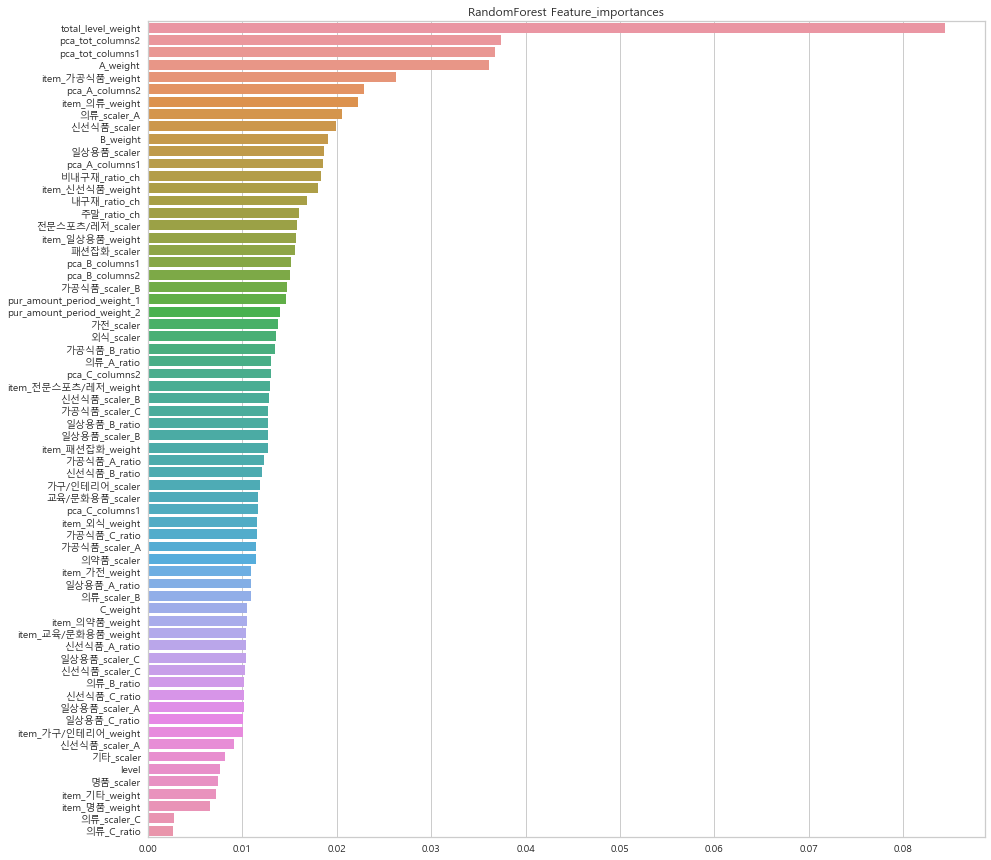

In [410]:
import seaborn as sns
import matplotlib.pyplot as plt

li2 = []
for i in zip(rf.feature_importances_, X_train1.columns):
    li2.append(i)
    
li2 = sorted(li2,reverse=True)

fi2 = [x[0] for x in li2]
na2 = [x[1] for x in li2]

plt.figure(figsize=(15,15))
plt.rc('font',family='Malgun Gothic')
plt.title('RandomForest Feature_importances')
sns.barplot(x=fi2,y=na2)

In [411]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train1,y_train1)
preds1=rf.predict(X_test1)

acc1 = accuracy_score(y_test1, preds1)
print (acc1)

0.7445444203123384


In [412]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train1, y_train1)
acc4= dt.predict(X_test1)

print (accuracy_score(y_test1, acc4))

0.7038473471920571


[Text(1674.0, 2989.7999999999997, 'total_level_weight <= -0.95\ngini = 0.487\nsamples = 19338\nvalue = [11207, 8131]'),
 Text(837.0, 2446.2, 'pca_tot_columns1 <= -0.25\ngini = 0.418\nsamples = 6812\nvalue = [2026, 4786]'),
 Text(418.5, 1902.6, 'B_weight <= -4.25\ngini = 0.476\nsamples = 2664\nvalue = [1040, 1624]'),
 Text(209.25, 1358.9999999999998, 'pca_B_columns1 <= 0.544\ngini = 0.357\nsamples = 412\nvalue = [96, 316]'),
 Text(104.625, 815.3999999999996, '신선식품_scaler_B <= -0.184\ngini = 0.444\nsamples = 15\nvalue = [10, 5]'),
 Text(52.3125, 271.7999999999997, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(156.9375, 271.7999999999997, 'gini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(313.875, 815.3999999999996, '신선식품_B_ratio <= -0.005\ngini = 0.339\nsamples = 397\nvalue = [86, 311]'),
 Text(261.5625, 271.7999999999997, 'gini = 0.429\nsamples = 157\nvalue = [49, 108]'),
 Text(366.1875, 271.7999999999997, 'gini = 0.261\nsamples = 240\nvalue = [37, 203]'),
 Text(627.75, 1358.9999

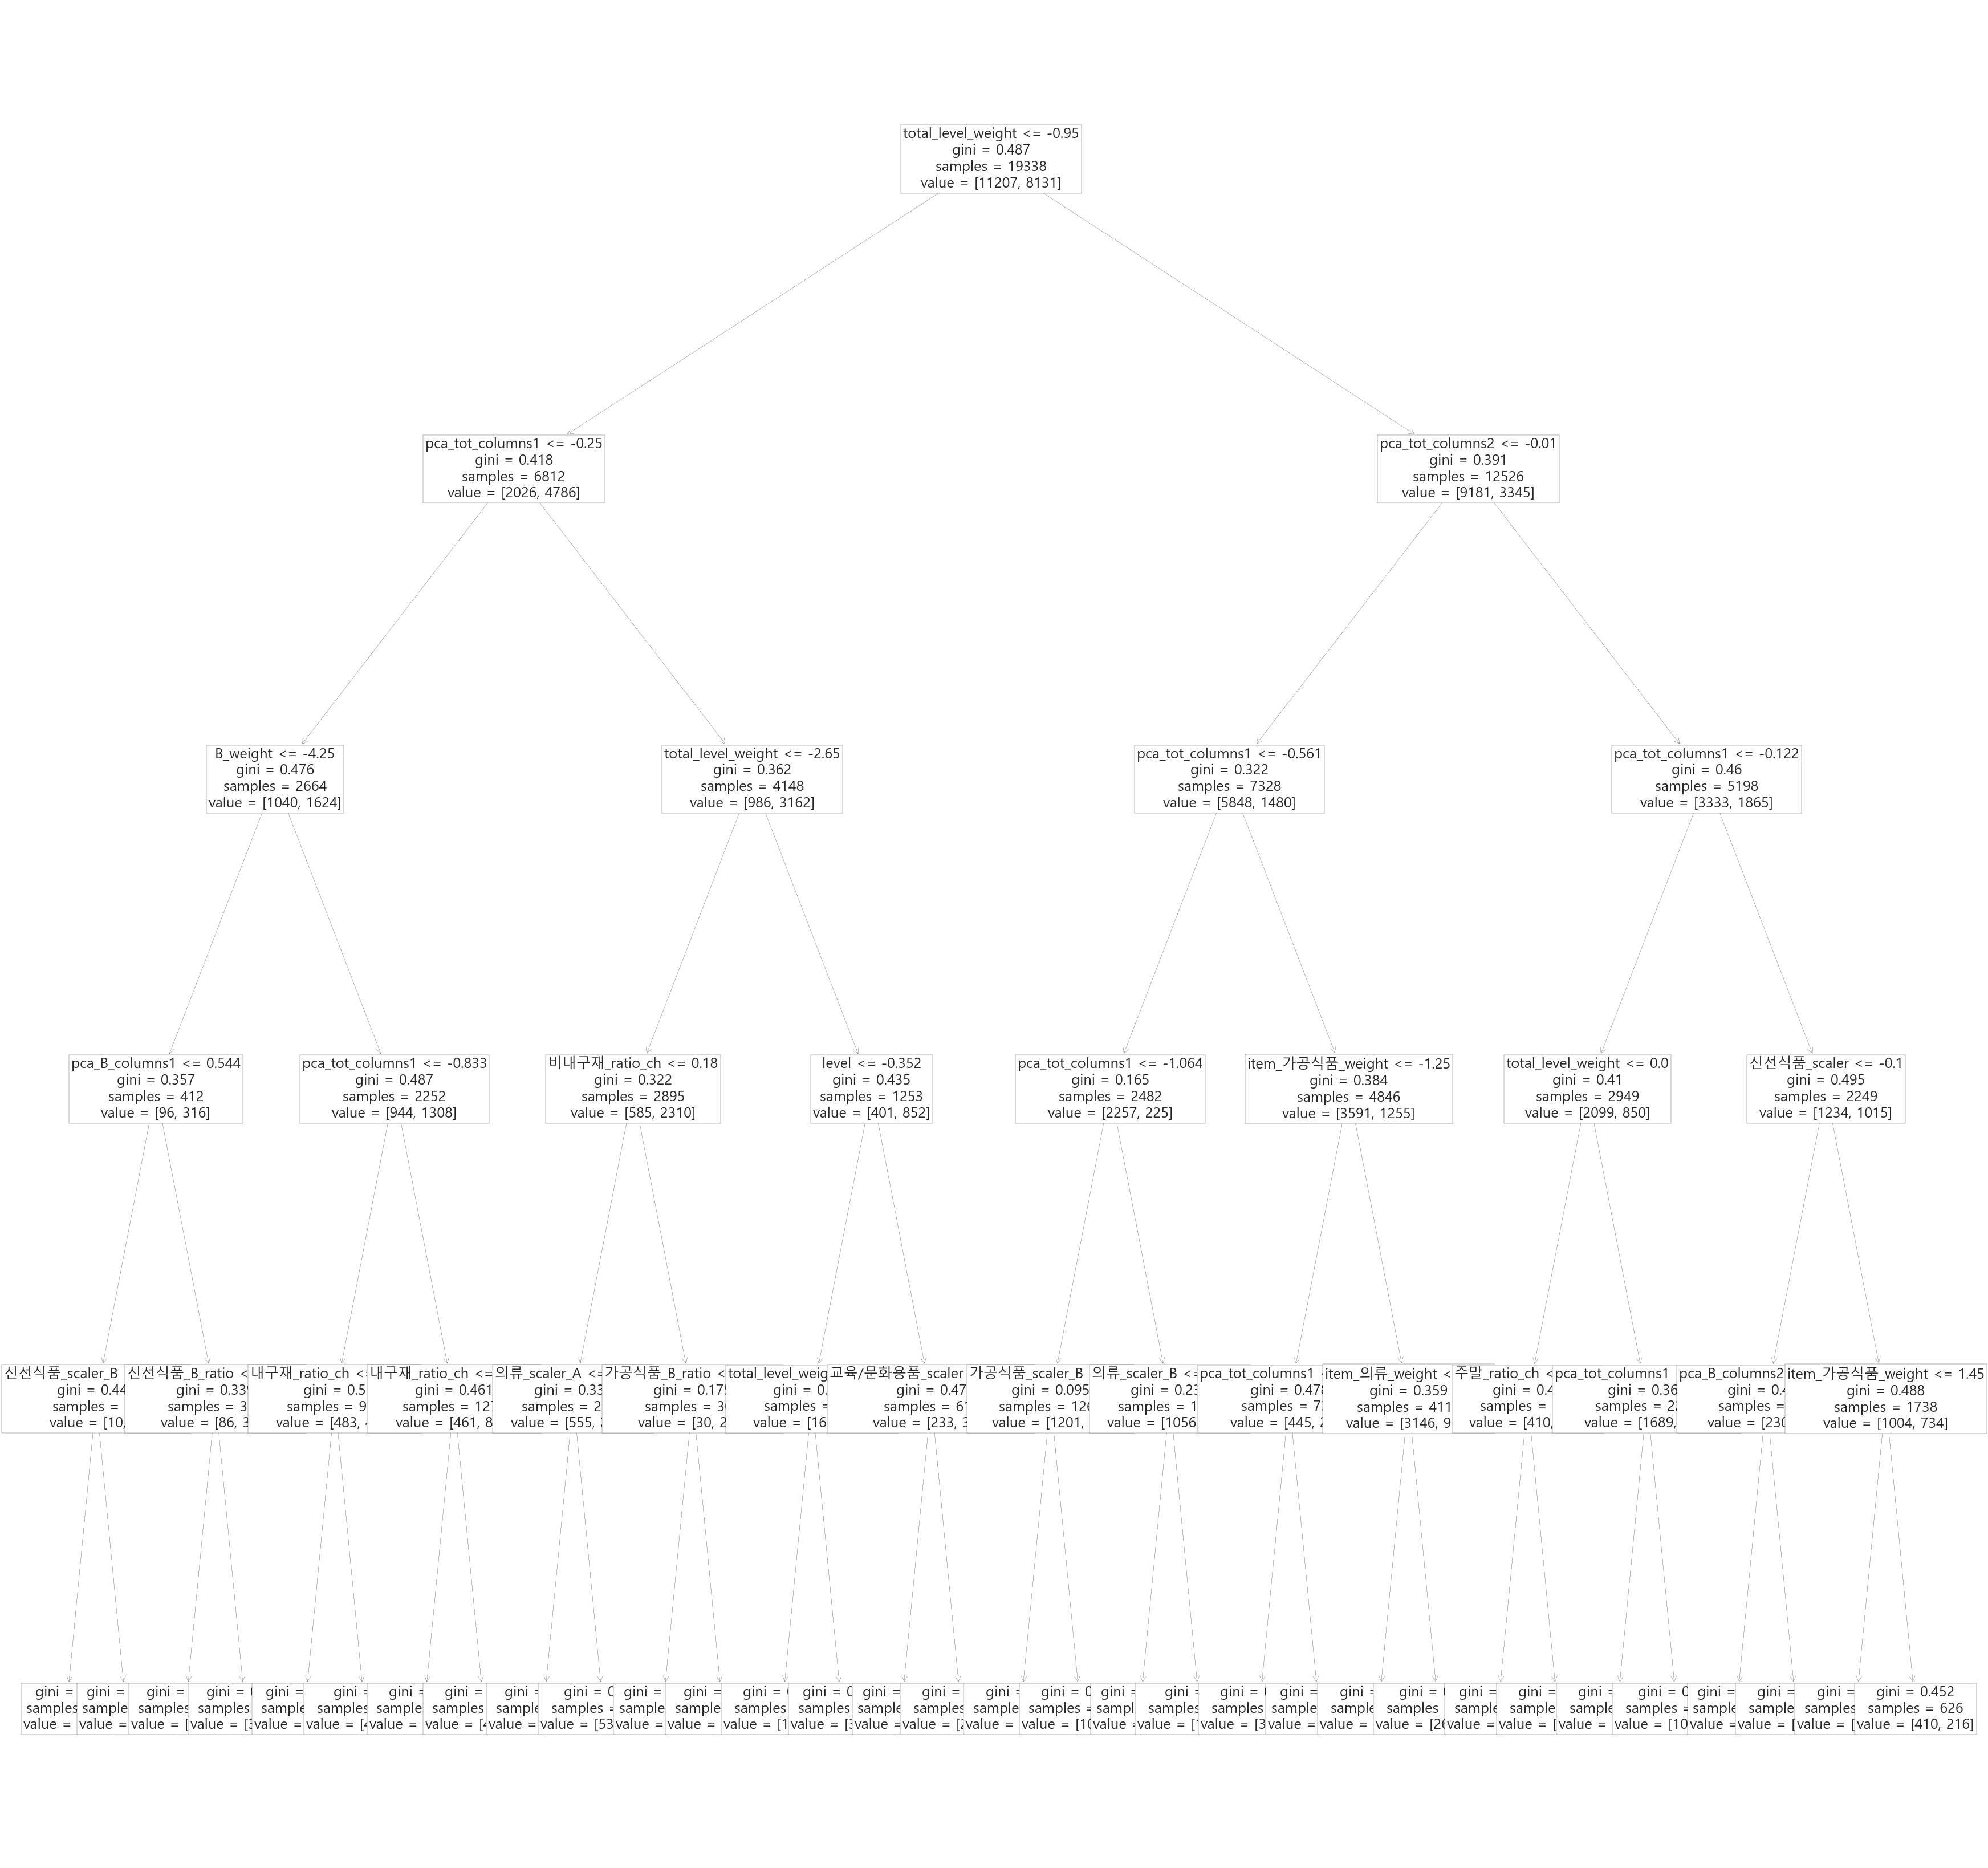

In [413]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(60,60))

plot_tree(dt, feature_names=X_train1.columns, fontsize=25)

In [414]:
xg = XGBClassifier(n_estimators = 500, learning_rate=0.1, n_jobs=-1)
xg.fit(X_train1, y_train1)
preds1 = xg.predict(X_test1)

print (accuracy_score(y_test1, preds1))

C:\Users\han71\anaconda3\envs\cakd3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:57:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7393215430758093


In [416]:

lg = LGBMClassifier(n_estimators = 500, learning_rate=0.1, n_jobs=-1)
lg.fit(X_train1, y_train1)
preds2= lg.predict(X_test1)

print (accuracy_score(y_test1, preds2))

0.7413382976522909


<AxesSubplot:title={'center':'XGBboost Feature_importances'}>

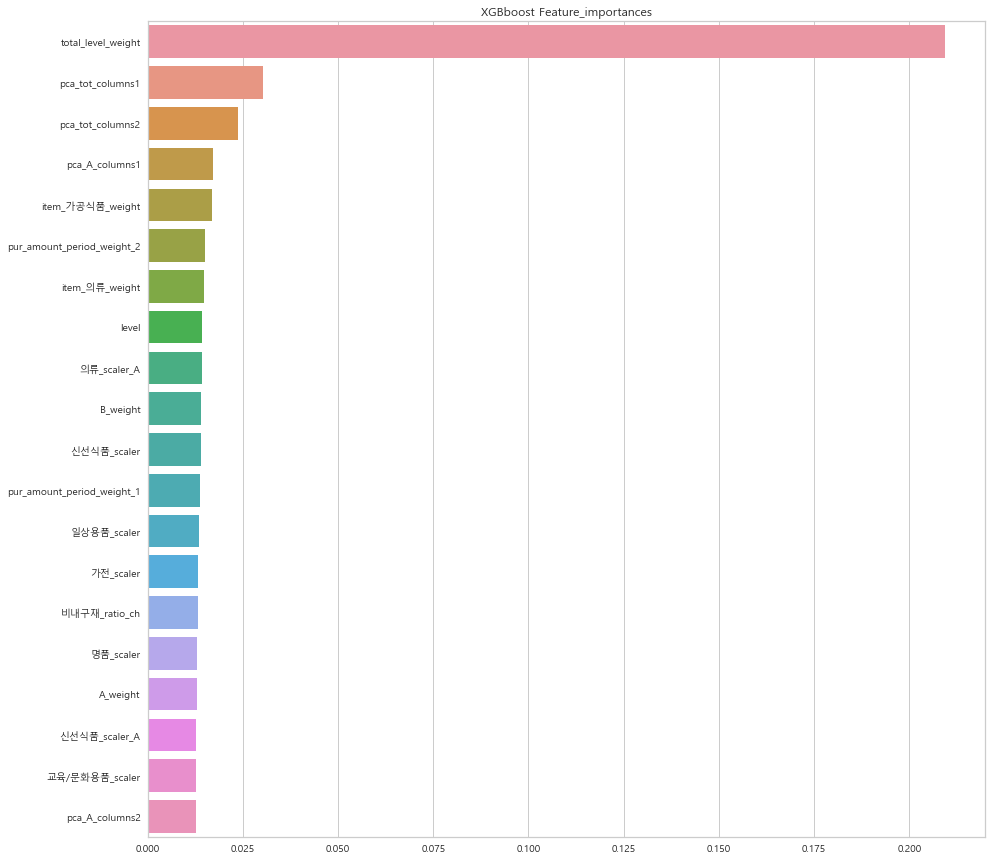

In [415]:
import seaborn as sns
import matplotlib.pyplot as plt

li1 = []
for i in zip(xg.feature_importances_, X_train1.columns):
    li1.append(i)
    
li1 = sorted(li1,reverse=True)

fi1 = [x[0] for x in li1]
na1 = [x[1] for x in li1]

plt.figure(figsize=(15,15))
plt.rc('font',family='Malgun Gothic')
plt.title('XGBboost Feature_importances')
sns.barplot(x=fi1[:20],y=na1[:20])

<AxesSubplot:title={'center':'LightGBM Feature_importances'}>

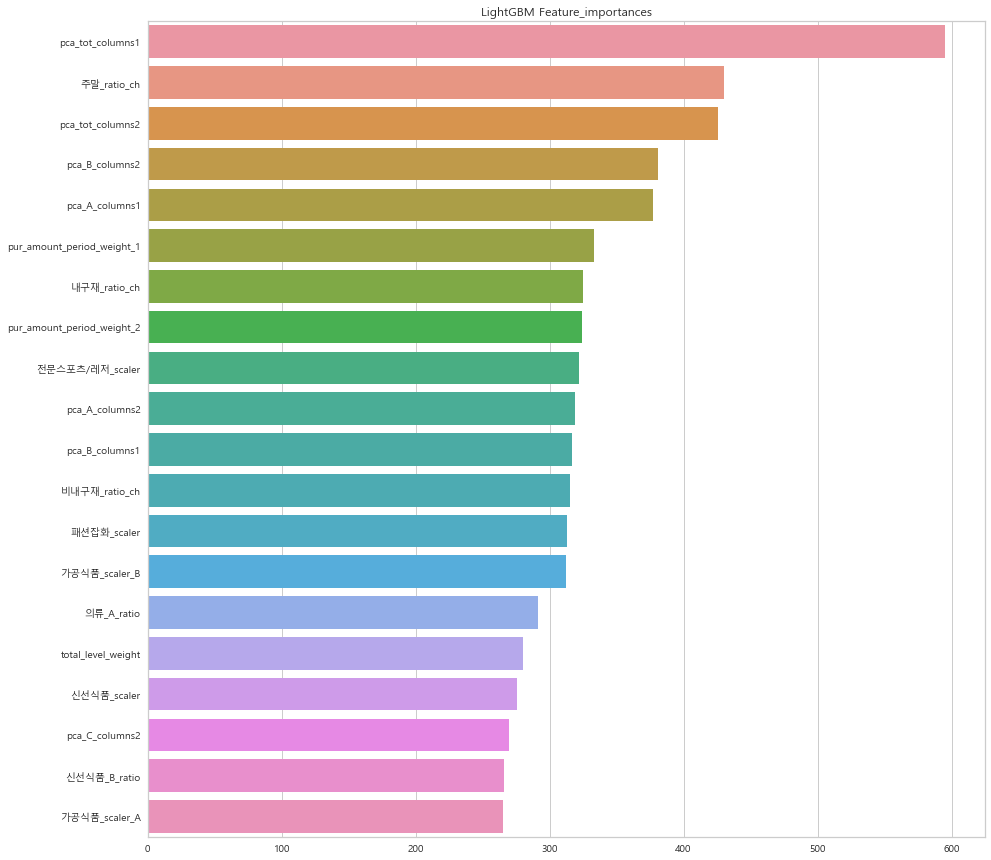

In [417]:
import seaborn as sns
import matplotlib.pyplot as plt

li = []
for i in zip(lg.feature_importances_, X_train1.columns):
    li.append(i)
    
li = sorted(li,reverse=True)

fi = [x[0] for x in li]
na = [x[1] for x in li]

plt.figure(figsize=(15,15))
plt.rc('font',family='Malgun Gothic')
plt.title('LightGBM Feature_importances')
sns.barplot(x=fi[:20],y=na[:20])

In [418]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train1, y_train1)
acc5= lr.predict(X_test1)

print (accuracy_score(y_test1, acc5))

0.710207880856345


C:\Users\han71\anaconda3\envs\cakd3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

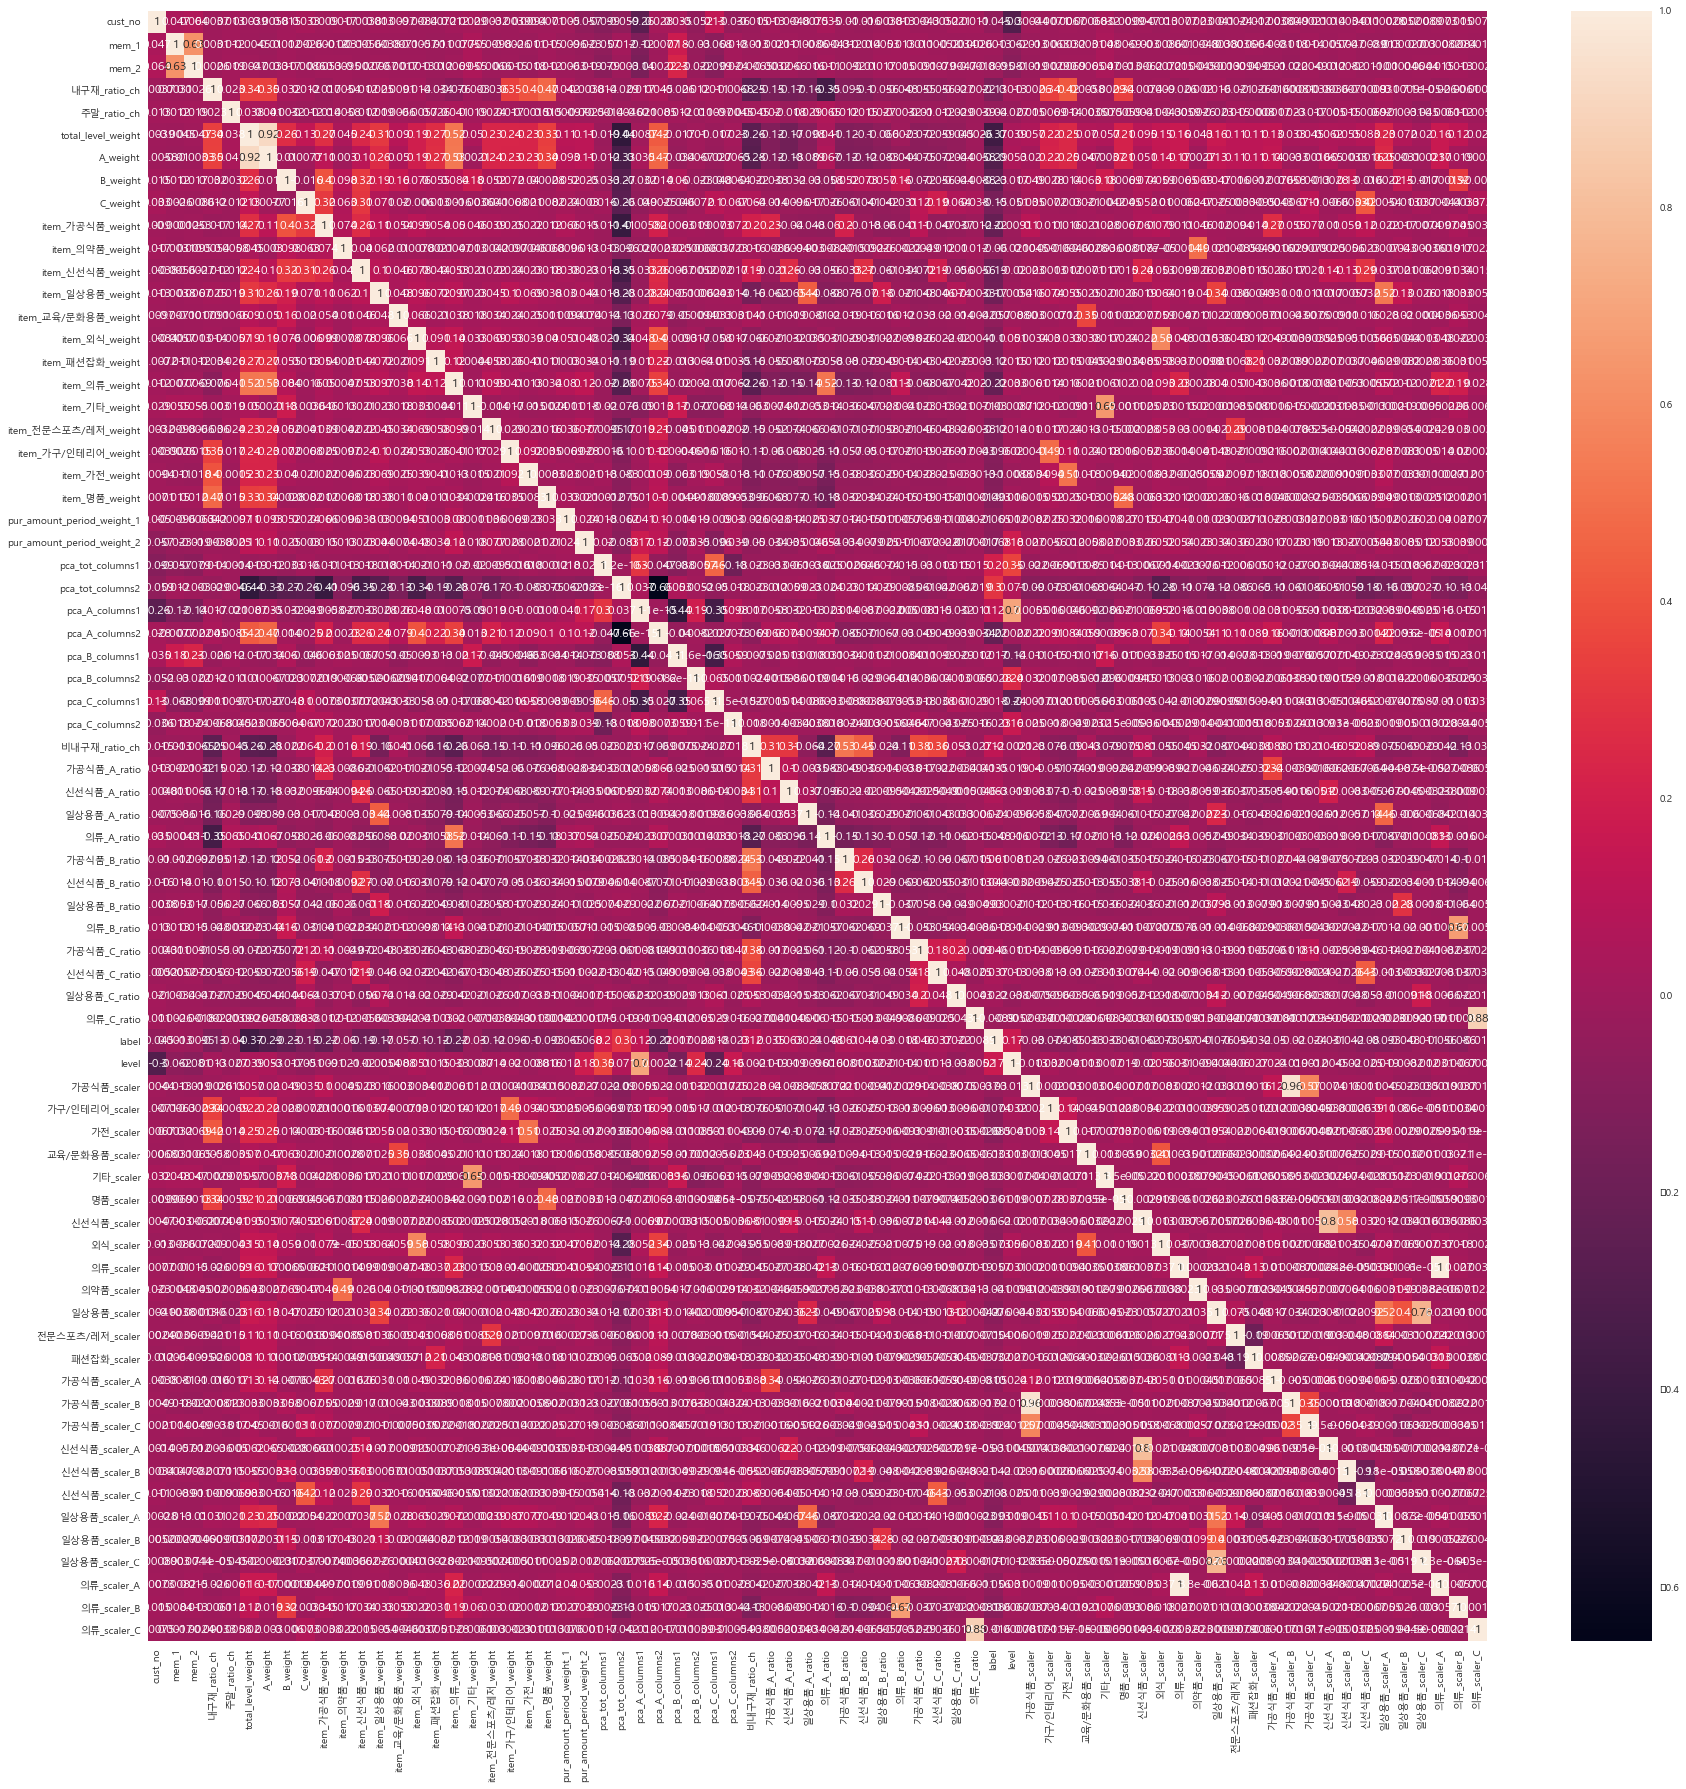

In [513]:
plt.figure(figsize=(30,30))
sns.heatmap(train_d.corr(),annot=True)

C:\Users\han71\anaconda3\envs\cakd3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\han71\anaconda3\envs\cakd3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

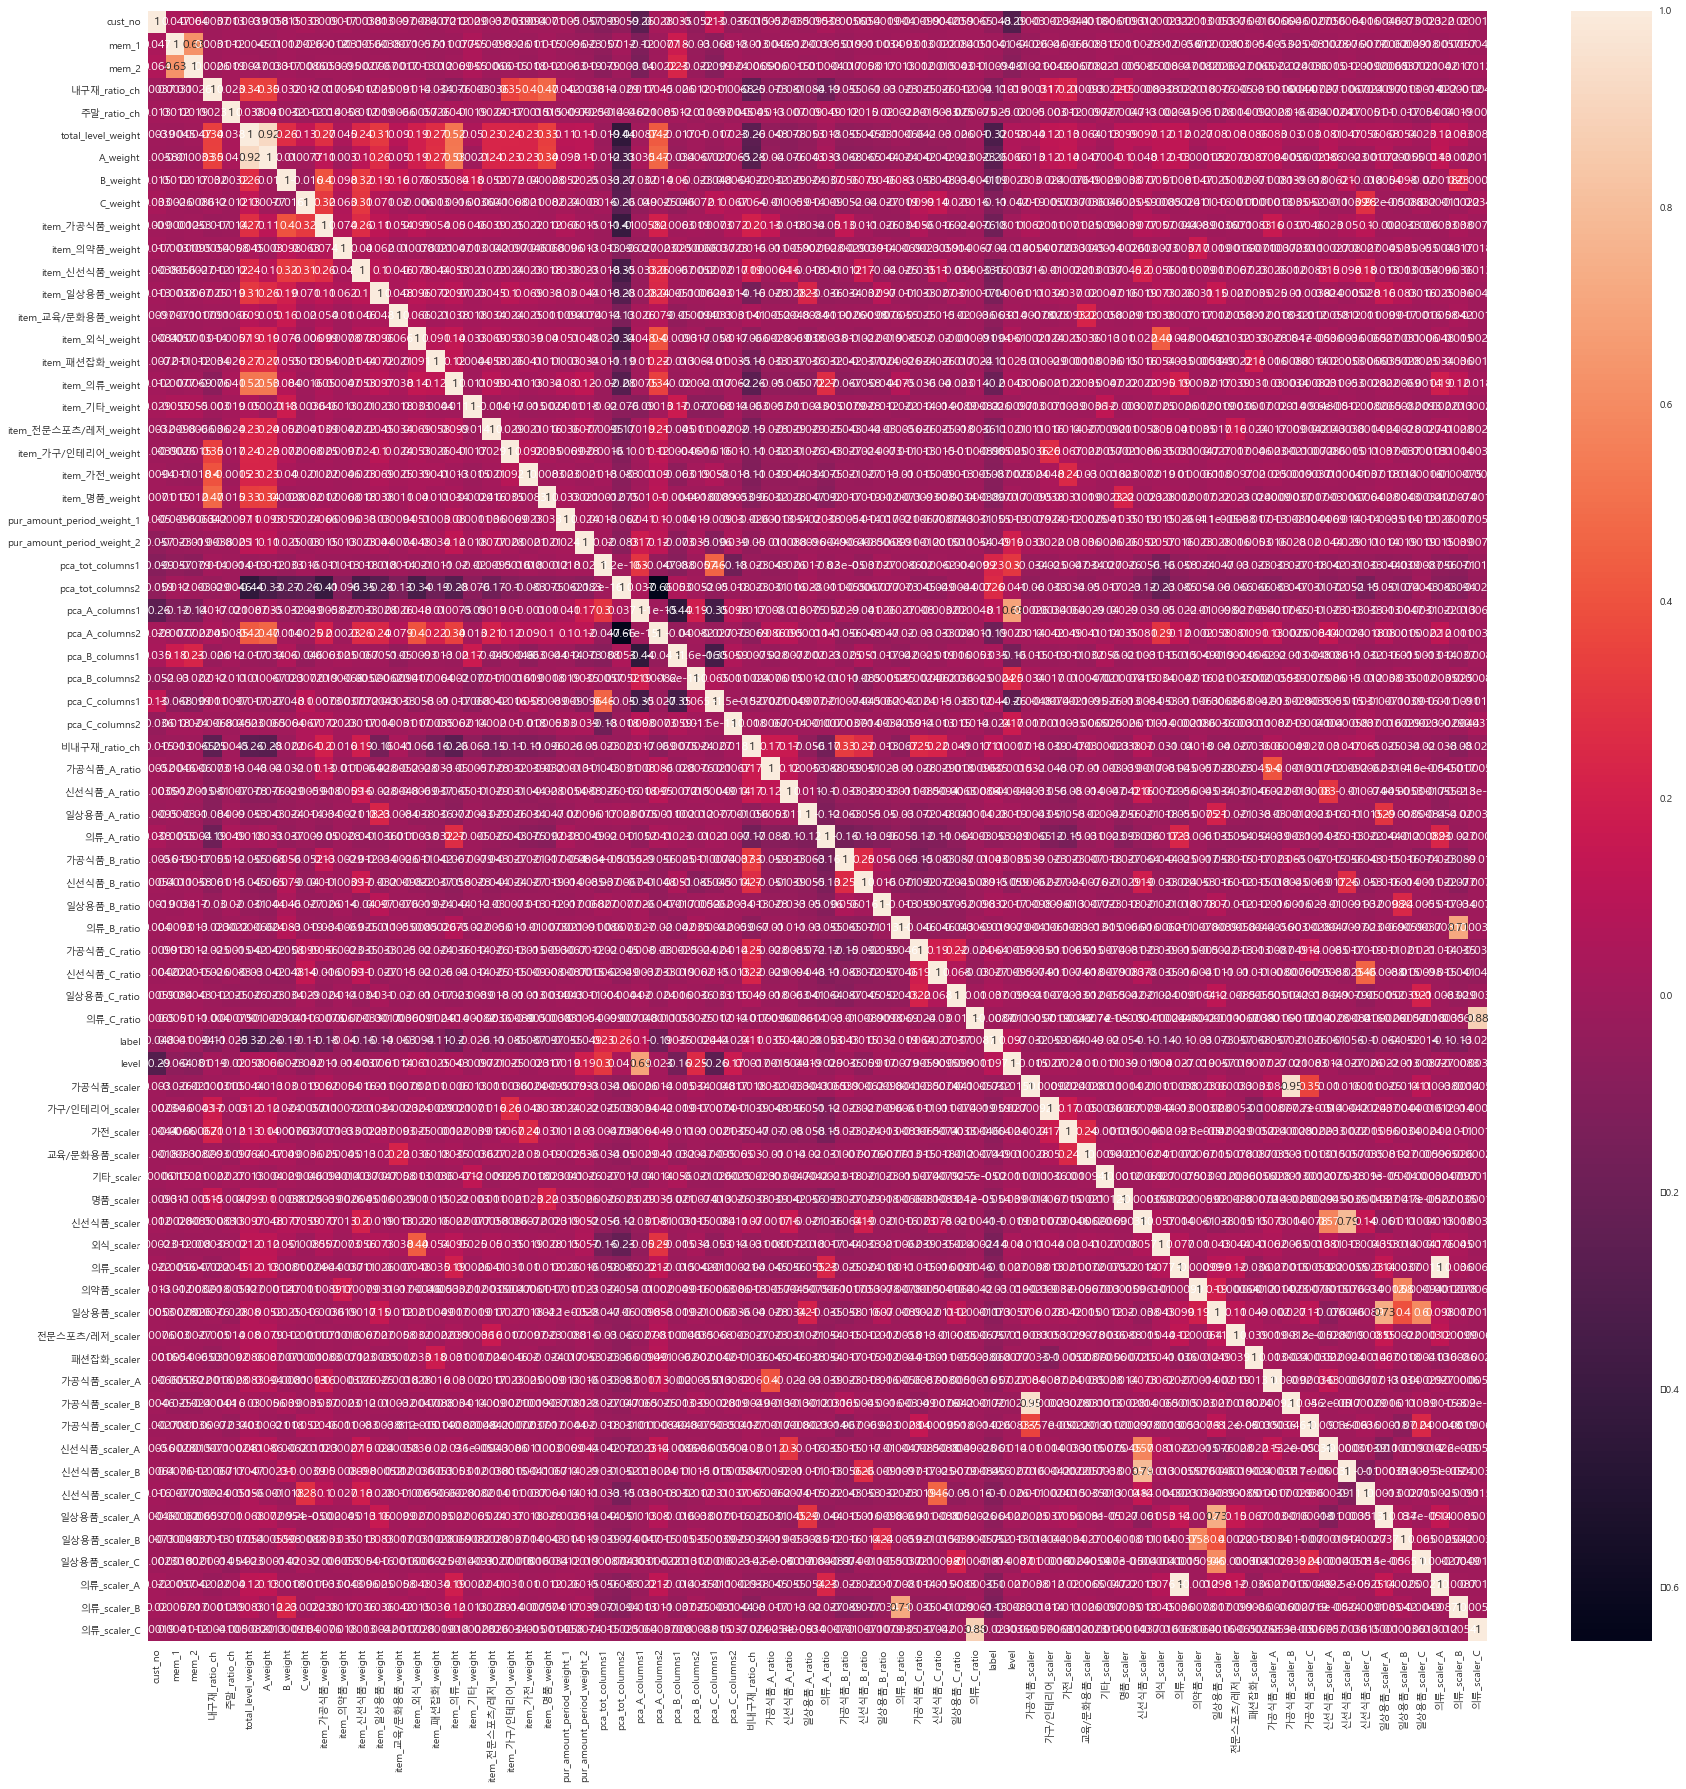

In [512]:
plt.figure(figsize=(30,30))
sns.heatmap(test_d.corr(),annot=True)

In [406]:
test_d.corr()['label'].sort_values()

total_level_weight   -0.319834
A_weight             -0.261697
item_의류_weight       -0.198566
B_weight             -0.189695
pca_A_columns2       -0.188815
                        ...   
pca_A_columns1        0.104371
비내구재_ratio_ch         0.107663
pca_tot_columns1      0.233971
pca_tot_columns2      0.256043
label                 1.000000
Name: label, Length: 72, dtype: float64

In [449]:
test_d.columns

Index(['cust_no', 'mem_1', 'mem_2', '내구재_ratio_ch', '주말_ratio_ch',
       'total_level_weight', 'A_weight', 'B_weight', 'C_weight',
       'item_가공식품_weight', 'item_의약품_weight', 'item_신선식품_weight',
       'item_일상용품_weight', 'item_교육/문화용품_weight', 'item_외식_weight',
       'item_패션잡화_weight', 'item_의류_weight', 'item_기타_weight',
       'item_전문스포츠/레저_weight', 'item_가구/인테리어_weight', 'item_가전_weight',
       'item_명품_weight', 'pur_amount_period_weight_1',
       'pur_amount_period_weight_2', 'pca_tot_columns1', 'pca_tot_columns2',
       'pca_A_columns1', 'pca_A_columns2', 'pca_B_columns1', 'pca_B_columns2',
       'pca_C_columns1', 'pca_C_columns2', '비내구재_ratio_ch', '가공식품_A_ratio',
       '신선식품_A_ratio', '일상용품_A_ratio', '의류_A_ratio', '가공식품_B_ratio',
       '신선식품_B_ratio', '일상용품_B_ratio', '의류_B_ratio', '가공식품_C_ratio',
       '신선식품_C_ratio', '일상용품_C_ratio', '의류_C_ratio', 'label', 'level',
       '가공식품_scaler', '가구/인테리어_scaler', '가전_scaler', '교육/문화용품_scaler',
       '기타_scaler', '명품_scaler',

In [315]:
train_d.to_csv('dataset/train_최종변수_3.csv',index=False)
test_d.to_csv('dataset/test_최종변수_3.csv',index=False)

In [30]:
import numpy as np
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [31]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*','+','8','*','o','s','+','^']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend,
                            alpha=0.5)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

In [401]:
X = test_d.query('label==1').drop(['cust_no','label','mem_1','mem_2'],axis=1)

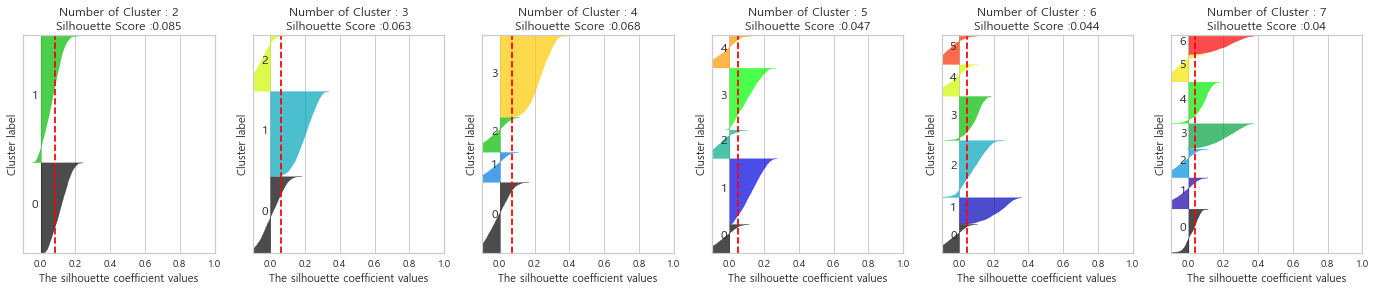

C:\Users\han71\anaconda3\envs\cakd3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\han71\anaconda3\envs\cakd3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


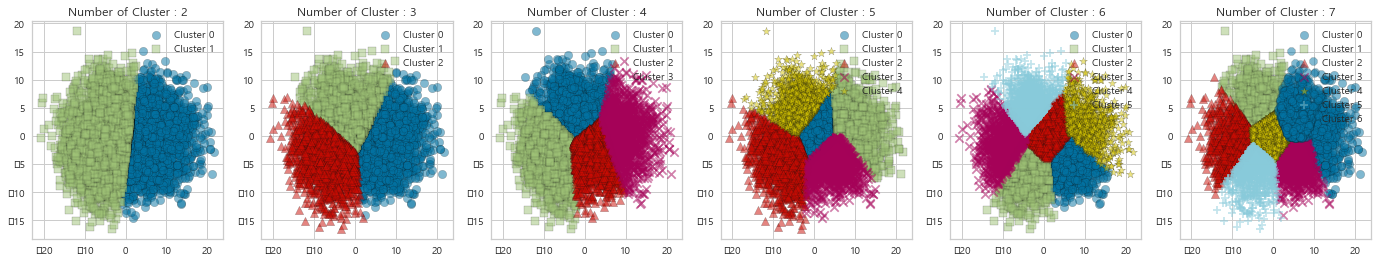

In [402]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
import matplotlib.pyplot as plt

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
# 4개의 군집일 때 가장 최적
visualize_silhouette([2,3, 4,5,6,7], X)
visualize_kmeans_plot_multi([2,3,4,5,6,7],X)

In [403]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

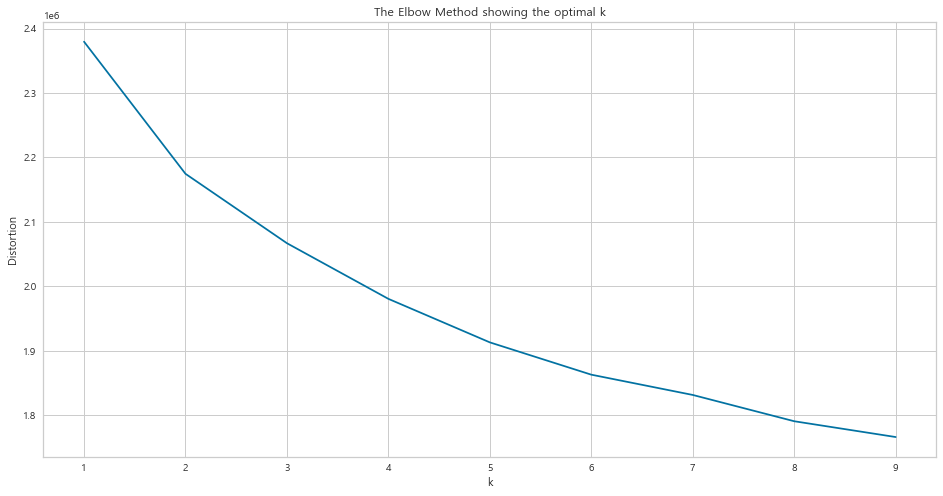

In [404]:

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [373]:
# train_set = pd.read_csv('dataset/train_최종변수.csv')
test_set = pd.read_csv('dataset/test_최종변수.csv')
test_set

cust_no  mem_1  mem_2  label  내구재_ratio_ch  주말_ratio_ch  \
0            1   -1.0   -1.0      1      0.033863     0.081778   
1            2   -1.0   -1.0      0      0.022889     0.004486   
2            3   -1.0   -1.0      1      0.000000    -0.001164   
3            4   -1.0   -1.0      1     -0.000516    -0.019855   
4            5   -1.0   -1.0      1     -0.009789     0.031285   
...        ...    ...    ...    ...           ...          ...   
19367    19283   -1.0   -1.0      0      0.000000     0.201923   
19368    19350   -1.0   -1.0      0      0.000000     0.081395   
19369    19381   -1.0    1.0      0      0.013943     0.122581   
19370    19382   -1.0   -1.0      0      0.001232     0.116438   
19371    19383   -1.0   -1.0      0      0.000000     0.166667   

       total_level_weight  A_weight  B_weight  C_weight  item_가공식품_weight  \
0                    0.50      0.50      -0.6       0.0             -5.10   
1                    1.20      1.20       1.1       0.0             -7.40   
2                   -0.15     -0.20       0.0      -0.9             -1.40   
3                   -3.75     -4.50       0.3      -1.5             -0.95   
4                   -1.35     -1.15      -0.1       0.0             -0.50   
...                   ...       ...       ...       ...               ...   
19367                3.00      3.00       0.0       0.0              3.50   
19368                0.80      0.00       0.2       0.1              0.80   
19369                1.60      0.80       3.0       0.0              2.50   
19370                0.80      0.60       2.5       0.0              2.00   
19371                0.10      0.00       0.0       0.0              0.10   

       item_의약품_weight  item_신선식품_weight  item_일상용품_weight  \
0                 2.25               0.0               1.0   
1                 3.00             -12.5               0.0   
2                 0.00               0.0               0.0   
3                -2.40               0.0               0.2   
4                 0.20              -4.2              -2.4   
...                ...               ...               ...   
19367             0.00               0.1               4.5   
19368             2.00               0.0               3.5   
19369             0.60               3.5               0.9   
19370             3.50               2.5               0.4   
19371             0.00               0.0               0.1   

       item_교육/문화용품_weight  item_외식_weight  item_패션잡화_weight  item_의류_weight  \
0                      0.0            1.40               1.0             1.2   
1                      0.0           -7.40              -5.8            11.0   
2                      0.0            0.00               0.0            -0.6   
3                      0.0            1.35              -4.2            -4.5   
4                      0.0           -6.80              -1.8             0.0   
...                    ...             ...               ...             ...   
19367                  0.0            1.60               2.4             0.3   
19368                  0.0            0.00               0.0             0.0   
19369                  0.1            0.60               0.8             1.2   
19370                  0.6            2.00               0.3             0.3   
19371                  0.0            0.00               0.0             0.0   

       item_기타_weight  item_전문스포츠/레저_weight  item_가구/인테리어_weight  \
0                 0.0                  -1.0                 -0.5   
1                 0.0                 -11.3                 -3.1   
2                 0.0                   0.0                  0.0   
3                 0.0                  -0.1                  0.4   
4                 0.0                   0.1                  0.0   
...               ...                   ...                  ...   
19367             0.0                   0.0                  0.0   
19368             0.0                  

In [681]:
len(test_d.columns), test_d.columns

(63,
 Index(['cust_no', '내구재_ratio_ch', '주말_ratio_ch', 'total_level_weight',
        'A_weight', 'B_weight', 'C_weight', 'item_가공식품_weight',
        'item_의약품_weight', 'item_신선식품_weight', 'item_일상용품_weight',
        'item_교육/문화용품_weight', 'item_외식_weight', 'item_패션잡화_weight',
        'item_의류_weight', 'item_기타_weight', 'item_전문스포츠/레저_weight',
        'item_가구/인테리어_weight', 'item_가전_weight', 'item_명품_weight',
        'pur_amount_period_weight_1', 'pur_amount_period_weight_2',
        'pca_tot_columns1', 'pca_tot_columns2', 'pca_A_columns1',
        'pca_A_columns2', 'pca_B_columns1', 'pca_B_columns2', 'pca_C_columns1',
        'pca_C_columns2', '비내구재_ratio_ch', '가공식품_A_ratio', '신선식품_A_ratio',
        '일상용품_A_ratio', '의류_A_ratio', '가공식품_B_ratio', '신선식품_B_ratio',
        '일상용품_B_ratio', '가공식품_C_ratio', '신선식품_C_ratio', '일상용품_C_ratio', 'label',
        'level', '가공식품_scaler', '가구/인테리어_scaler', '가전_scaler', '교육/문화용품_scaler',
        '기타_scaler', '명품_scaler', '신선식품_scaler', '외식_scaler', '의류_s

In [374]:
test_set = pd.merge(test_set, ttdf2, on='cust_no', how='left')

In [365]:
test_set

cust_no  mem_1  mem_2  label  내구재_ratio_ch  주말_ratio_ch  \
0            1   -1.0   -1.0      1      0.033863     0.081778   
1            2   -1.0   -1.0      0      0.022889     0.004486   
2            3   -1.0   -1.0      1      0.000000    -0.001164   
3            4   -1.0   -1.0      1     -0.000516    -0.019855   
4            5   -1.0   -1.0      1     -0.009789     0.031285   
...        ...    ...    ...    ...           ...          ...   
19367    19283   -1.0   -1.0      0      0.000000     0.201923   
19368    19350   -1.0   -1.0      0      0.000000     0.081395   
19369    19381   -1.0    1.0      0      0.013943     0.122581   
19370    19382   -1.0   -1.0      0      0.001232     0.116438   
19371    19383   -1.0   -1.0      0      0.000000     0.166667   

       total_level_weight  A_weight  B_weight  C_weight  item_가공식품_weight  \
0                    0.50      0.50      -0.6       0.0             -5.10   
1                    1.20      1.20       1.1       0.0             -7.40   
2                   -0.15     -0.20       0.0      -0.9             -1.40   
3                   -3.75     -4.50       0.3      -1.5             -0.95   
4                   -1.35     -1.15      -0.1       0.0             -0.50   
...                   ...       ...       ...       ...               ...   
19367                3.00      3.00       0.0       0.0              3.50   
19368                0.80      0.00       0.2       0.1              0.80   
19369                1.60      0.80       3.0       0.0              2.50   
19370                0.80      0.60       2.5       0.0              2.00   
19371                0.10      0.00       0.0       0.0              0.10   

       item_의약품_weight  item_신선식품_weight  item_일상용품_weight  \
0                 2.25               0.0               1.0   
1                 3.00             -12.5               0.0   
2                 0.00               0.0               0.0   
3                -2.40               0.0               0.2   
4                 0.20              -4.2              -2.4   
...                ...               ...               ...   
19367             0.00               0.1               4.5   
19368             2.00               0.0               3.5   
19369             0.60               3.5               0.9   
19370             3.50               2.5               0.4   
19371             0.00               0.0               0.1   

       item_교육/문화용품_weight  item_외식_weight  item_패션잡화_weight  item_의류_weight  \
0                      0.0            1.40               1.0             1.2   
1                      0.0           -7.40              -5.8            11.0   
2                      0.0            0.00               0.0            -0.6   
3                      0.0            1.35              -4.2            -4.5   
4                      0.0           -6.80              -1.8             0.0   
...                    ...             ...               ...             ...   
19367                  0.0            1.60               2.4             0.3   
19368                  0.0            0.00               0.0             0.0   
19369                  0.1            0.60               0.8             1.2   
19370                  0.6            2.00               0.3             0.3   
19371                  0.0            0.00               0.0             0.0   

       item_기타_weight  item_전문스포츠/레저_weight  item_가구/인테리어_weight  \
0                 0.0                  -1.0                 -0.5   
1                 0.0                 -11.3                 -3.1   
2                 0.0                   0.0                  0.0   
3                 0.0                  -0.1                  0.4   
4                 0.0                   0.1                  0.0   
...               ...                   ...                  ...   
19367             0.0                   0.0                  0.0   
19368             0.0                  

In [377]:
np.setxor1d(train_d.columns, test_set.columns)

array(['level', '가공식품_ratio', '가구/인테리어_scaler_A', '가구/인테리어_scaler_B',
       '가구/인테리어_scaler_C', '가전_scaler_A', '가전_scaler_B', '가전_scaler_C',
       '교육/문화용품_scaler_A', '교육/문화용품_scaler_B', '교육/문화용품_scaler_C',
       '기타_scaler_A', '기타_scaler_B', '명품_scaler_A', '명품_scaler_B',
       '신선식품_ratio', '외식_scaler_A', '외식_scaler_B', '의류_ratio',
       '일상용품_ratio', '전문스포츠/레저_scaler_A', '전문스포츠/레저_scaler_B',
       '전문스포츠/레저_scaler_C', '패션잡화_scaler_A', '패션잡화_scaler_B',
       '패션잡화_scaler_C'], dtype=object)

In [375]:
scale = pd.read_csv('dataset/amount_di_test_scaler_2-3.csv', index_col=0)
sca = pd.read_csv('dataset/test_channel_di_2-3.csv', index_col=0)
scale

cust_no  가공식품_scaler  가구/인테리어_scaler  가전_scaler  교육/문화용품_scaler  \
0            1     0.013862       -2.841970  -3.418760        0.016043   
1            2    -0.024078        0.034478   0.456606        0.016043   
2            3    -0.040002        0.007890  -0.017854        0.016043   
3            4     0.040370       -0.278864  -0.007391        0.016043   
4            5     0.095385       -0.136405  -0.007391        0.016043   
...        ...          ...             ...        ...             ...   
19351    19283     0.267659        0.007890  -0.007391        0.016043   
19352    19350     0.054816        0.007890  -0.007391        0.016043   
19353    19381     0.130270        0.060904  -0.007391        0.021862   
19354    19382     0.125829        0.010948  -0.007391        0.039242   
19355    19383     0.004304        0.007890  -0.007391        0.016043   

       기타_scaler  명품_scaler  신선식품_scaler  외식_scaler  의류_scaler  의약품_scaler  \
0      -0.027039   0.081146    -0.209715  -0.285500  -0.106332    0.183621   
1      -0.027039   0.202304    -0.342187  -1.031952   0.278649    0.442605   
2      -0.027039  -0.019476    -0.106111   0.002778   0.012492   -0.005478   
3      -0.027039  -0.019476     0.299472   1.044245   0.010783   -0.139766   
4      -0.027039  -0.019476    -0.039848  -0.078143   0.042625    0.033575   
...          ...        ...          ...        ...        ...         ...   
19351  -0.027039  -0.019476    -0.023917   0.348647   0.018897   -0.005478   
19352  -0.027039  -0.019476    -0.039365   0.002778   0.012492    0.293929   
19353  -0.027039  -0.019476     0.863739   0.123545   0.056187    0.071258   
19354  -0.027039  -0.019476     0.391002   0.399583   0.019700    0.661851   
19355  -0.027039  -0.019476    -0.039365   0.002778   0.012492   -0.005478   

       일상용품_scaler  전문스포츠/레저_scaler  패션잡화_scaler  
0        -1.437720         0.424272     0.173358  
1         0.810938        -0.127795    -0.000398  
2        -0.030708         0.049273     0.017033  
3        -0.196011        -0.295332    -0.000315  
4         0.070687         0.004771     0.000126  
...            ...              ...          ...  
19351     1.497185         0.049273     0.160031  
19352     0.467172         0.049273     0.017033  
19353     0.059556         0.061398     0.027079  
19354     0.037656         0.119712     0.020684  
19355     0.000567         0.049273     0.017033  

[19356 rows x 14 columns]

In [376]:
test_set = pd.merge(test_set, scale, on='cust_no', how='left')
test_set = pd.merge(test_set, sca, on='cust_no', how='left')
test_set

cust_no  mem_1  mem_2  label  내구재_ratio_ch  주말_ratio_ch  \
0            1   -1.0   -1.0      1      0.033863     0.081778   
1            2   -1.0   -1.0      0      0.022889     0.004486   
2            3   -1.0   -1.0      1      0.000000    -0.001164   
3            4   -1.0   -1.0      1     -0.000516    -0.019855   
4            5   -1.0   -1.0      1     -0.009789     0.031285   
...        ...    ...    ...    ...           ...          ...   
19367    19283   -1.0   -1.0      0      0.000000     0.201923   
19368    19350   -1.0   -1.0      0      0.000000     0.081395   
19369    19381   -1.0    1.0      0      0.013943     0.122581   
19370    19382   -1.0   -1.0      0      0.001232     0.116438   
19371    19383   -1.0   -1.0      0      0.000000     0.166667   

       total_level_weight  A_weight  B_weight  C_weight  item_가공식품_weight  \
0                    0.50      0.50      -0.6       0.0             -5.10   
1                    1.20      1.20       1.1       0.0             -7.40   
2                   -0.15     -0.20       0.0      -0.9             -1.40   
3                   -3.75     -4.50       0.3      -1.5             -0.95   
4                   -1.35     -1.15      -0.1       0.0             -0.50   
...                   ...       ...       ...       ...               ...   
19367                3.00      3.00       0.0       0.0              3.50   
19368                0.80      0.00       0.2       0.1              0.80   
19369                1.60      0.80       3.0       0.0              2.50   
19370                0.80      0.60       2.5       0.0              2.00   
19371                0.10      0.00       0.0       0.0              0.10   

       item_의약품_weight  item_신선식품_weight  item_일상용품_weight  \
0                 2.25               0.0               1.0   
1                 3.00             -12.5               0.0   
2                 0.00               0.0               0.0   
3                -2.40               0.0               0.2   
4                 0.20              -4.2              -2.4   
...                ...               ...               ...   
19367             0.00               0.1               4.5   
19368             2.00               0.0               3.5   
19369             0.60               3.5               0.9   
19370             3.50               2.5               0.4   
19371             0.00               0.0               0.1   

       item_교육/문화용품_weight  item_외식_weight  item_패션잡화_weight  item_의류_weight  \
0                      0.0            1.40               1.0             1.2   
1                      0.0           -7.40              -5.8            11.0   
2                      0.0            0.00               0.0            -0.6   
3                      0.0            1.35              -4.2            -4.5   
4                      0.0           -6.80              -1.8             0.0   
...                    ...             ...               ...             ...   
19367                  0.0            1.60               2.4             0.3   
19368                  0.0            0.00               0.0             0.0   
19369                  0.1            0.60               0.8             1.2   
19370                  0.6            2.00               0.3             0.3   
19371                  0.0            0.00               0.0             0.0   

       item_기타_weight  item_전문스포츠/레저_weight  item_가구/인테리어_weight  \
0                 0.0                  -1.0                 -0.5   
1                 0.0                 -11.3                 -3.1   
2                 0.0                   0.0                  0.0   
3                 0.0                  -0.1                  0.4   
4                 0.0                   0.1                  0.0   
...               ...                   ...                  ...   
19367             0.0                   0.0                  0.0   
19368             0.0                  

In [378]:
np.setxor1d(train_d.columns, test_d.columns)

array([], dtype=object)

In [379]:
train_d.columns

Index(['cust_no', 'mem_1', 'mem_2', '내구재_ratio_ch', '주말_ratio_ch',
       'total_level_weight', 'A_weight', 'B_weight', 'C_weight',
       'item_가공식품_weight', 'item_의약품_weight', 'item_신선식품_weight',
       'item_일상용품_weight', 'item_교육/문화용품_weight', 'item_외식_weight',
       'item_패션잡화_weight', 'item_의류_weight', 'item_기타_weight',
       'item_전문스포츠/레저_weight', 'item_가구/인테리어_weight', 'item_가전_weight',
       'item_명품_weight', 'pur_amount_period_weight_1',
       'pur_amount_period_weight_2', 'pca_tot_columns1', 'pca_tot_columns2',
       'pca_A_columns1', 'pca_A_columns2', 'pca_B_columns1', 'pca_B_columns2',
       'pca_C_columns1', 'pca_C_columns2', '비내구재_ratio_ch', '가공식품_A_ratio',
       '신선식품_A_ratio', '일상용품_A_ratio', '의류_A_ratio', '가공식품_B_ratio',
       '신선식품_B_ratio', '일상용품_B_ratio', '의류_B_ratio', '가공식품_C_ratio',
       '신선식품_C_ratio', '일상용품_C_ratio', '의류_C_ratio', 'label', 'level',
       '가공식품_scaler', '가구/인테리어_scaler', '가전_scaler', '교육/문화용품_scaler',
       '기타_scaler', '명품_scaler',

In [380]:
train_d.to_csv('dataset/train_최종변수_4.csv',index=False)
test_d.to_csv('dataset/test_최종변수_4.csv',index=False)

In [524]:
X_train1 = train_d.drop(['label','cust_no',
                         'mem_1','mem_2',
#                          '의류_scaler','가공식품_scaler',
                         '일상용품_scaler',
#                          '신선식품_scaler',
#                          '신선식품_scaler_A',
                         '신선식품_scaler_B','가공식품_scaler_B',
                         '의류_scaler_A',
#                          '일상용품_scaler_A',
                         '의류_scaler_C','의류_C_ratio',
                         '의류_B_ratio',

#                          '외식_scaler',
#                          'pca_A_columns1', 'pca_A_columns2',
#                          'A_weight',
#                          '전문스포츠/레저_scaler', 
#                          'level',
#                          'item_의약품_weight',
#                          'item_의류_weight',
#          'item_교육/문화용품_weight',
#        'item_외식_weight', 
#                      'item_패션잡화_weight', 
#        'item_기타_weight', 'item_전문스포츠/레저_weight', 'item_가구/인테리어_weight',
#        'item_가전_weight', 
#                          'item_명품_weight',
#         'pur_amount_period_weight_1', 'pur_amount_period_weight_2',
#                          '주말_ratio_ch'
                        ],axis=1).fillna(0)
y_train1 = train_d['label']

X_test1 = test_d[X_train1.columns].fillna(0)
y_test1 = test_d['label']

In [525]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train1,y_train1)
preds1=rf.predict(X_test1)

acc1 = accuracy_score(y_test1, preds1)*100
print (acc1)

74.61991932981694


In [522]:
X_train1 = train_d.drop(['label','cust_no',
                         'mem_1','mem_2',
#                          '의류_scaler','가공식품_scaler',
                         '일상용품_scaler',
#                          '신선식품_scaler',
                         '신선식품_scaler_A',
                         '신선식품_scaler_B',
                         '가공식품_scaler_B',
                         '의류_scaler_A',
#                          '일상용품_scaler_A',
                         '의류_scaler_C','의류_C_ratio',
                         '의류_B_ratio',

#                          '외식_scaler',
#                          'pca_A_columns1', 'pca_A_columns2',
#                          'A_weight',
#                          '전문스포츠/레저_scaler', 
#                          'level',
#                          'item_의약품_weight',
#                          'item_의류_weight',
#          'item_교육/문화용품_weight',
#        'item_외식_weight', 
#                      'item_패션잡화_weight', 
#        'item_기타_weight', 'item_전문스포츠/레저_weight', 'item_가구/인테리어_weight',
#        'item_가전_weight', 
#                          'item_명품_weight',
#         'pur_amount_period_weight_1', 'pur_amount_period_weight_2',
#                          '주말_ratio_ch'
                        ],axis=1).fillna(0)
y_train1 = train_d['label']

X_test1 = test_d[X_train1.columns].fillna(0)
y_test1 = test_d['label']

In [523]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train1,y_train1)
preds1=rf.predict(X_test1)

acc1 = accuracy_score(y_test1, preds1)*100
print (acc1)

74.57337883959045


In [577]:
X_train1 = pd.merge(train_d,cust[['cust_no','age_cat']],on='cust_no',how='left').drop(['label','cust_no',
                         'mem_1','mem_2',
#                          '의류_scaler','가공식품_scaler',
                         '일상용품_scaler',
#                          '신선식품_scaler',
#                          '신선식품_scaler_A',
#                          '신선식품_scaler_B',
                         '가공식품_scaler_B',
                         '의류_scaler_A',
#                          '일상용품_scaler_A',
                         '의류_scaler_C','의류_C_ratio',
                         '의류_B_ratio',

#                          '외식_scaler',
#                          'pca_A_columns1', 'pca_A_columns2',
#                          'A_weight',
#                          '전문스포츠/레저_scaler', 
#                          'level',
#                          'item_의약품_weight',
#                          'item_의류_weight',
#          'item_교육/문화용품_weight',
#        'item_외식_weight', 
#                      'item_패션잡화_weight', 
#        'item_기타_weight', 'item_전문스포츠/레저_weight', 'item_가구/인테리어_weight',
#        'item_가전_weight', 
#                          'item_명품_weight',
#         'pur_amount_period_weight_1', 'pur_amount_period_weight_2',
#                          '주말_ratio_ch'
                        ],axis=1).fillna(0)
y_train1 = train_d['label']

X_test1 = pd.merge(test_d,cust[['cust_no','age_cat']],on='cust_no',how='left')[X_train1.columns].fillna(0)
y_test1 = test_d['label']

In [578]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train1,y_train1)
preds1=rf.predict(X_test1)

acc1 = accuracy_score(y_test1, preds1)*100
print (acc1)

74.64577515772055


In [582]:
cust.head(1)

encoder = LabelEncoder()
cust['region_plus'] = encoder.fit_transform(cust[['region_plus']])

In [586]:
X_train1 = pd.merge(train_d,cust[['cust_no','gender']],on='cust_no',how='left').drop(['label','cust_no',
                         'mem_1','mem_2',
#                          '의류_scaler','가공식품_scaler',
                         '일상용품_scaler',
#                          '신선식품_scaler',
#                          '신선식품_scaler_A',
#                          '신선식품_scaler_B',
                         '가공식품_scaler_B',
                         '의류_scaler_A',
#                          '일상용품_scaler_A',
                         '의류_scaler_C','의류_C_ratio',
                         '의류_B_ratio',

#                          '외식_scaler',
#                          'pca_A_columns1', 'pca_A_columns2',
#                          'A_weight',
#                          '전문스포츠/레저_scaler', 
#                          'level',
#                          'item_의약품_weight',
#                          'item_의류_weight',
#          'item_교육/문화용품_weight',
#        'item_외식_weight', 
#                      'item_패션잡화_weight', 
#        'item_기타_weight', 'item_전문스포츠/레저_weight', 'item_가구/인테리어_weight',
#        'item_가전_weight', 
#                          'item_명품_weight',
#         'pur_amount_period_weight_1', 'pur_amount_period_weight_2',
#                          '주말_ratio_ch'
                        ],axis=1).fillna(0)
y_train1 = train_d['label']

X_test1 = pd.merge(test_d,cust[['cust_no','gender']],on='cust_no',how='left')[X_train1.columns].fillna(0)
y_test1 = test_d['label']

In [587]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train1,y_train1)
preds1=rf.predict(X_test1)

acc1 = accuracy_score(y_test1, preds1)*100
print (acc1)

74.50098252146033


In [588]:
X_train1 = pd.merge(train_d,cust[['cust_no','region_plus']],on='cust_no',how='left').drop(['label','cust_no',
                         'mem_1','mem_2',
#                          '의류_scaler','가공식품_scaler',
                         '일상용품_scaler',
#                          '신선식품_scaler',
#                          '신선식품_scaler_A',
#                          '신선식품_scaler_B',
                         '가공식품_scaler_B',
                         '의류_scaler_A',
#                          '일상용품_scaler_A',
                         '의류_scaler_C','의류_C_ratio',
                         '의류_B_ratio',

#                          '외식_scaler',
#                          'pca_A_columns1', 'pca_A_columns2',
#                          'A_weight',
#                          '전문스포츠/레저_scaler', 
#                          'level',
#                          'item_의약품_weight',
#                          'item_의류_weight',
#          'item_교육/문화용품_weight',
#        'item_외식_weight', 
#                      'item_패션잡화_weight', 
#        'item_기타_weight', 'item_전문스포츠/레저_weight', 'item_가구/인테리어_weight',
#        'item_가전_weight', 
#                          'item_명품_weight',
#         'pur_amount_period_weight_1', 'pur_amount_period_weight_2',
#                          '주말_ratio_ch'
                        ],axis=1).fillna(0)
y_train1 = train_d['label']

X_test1 = pd.merge(test_d,cust[['cust_no','region_plus']],on='cust_no',how='left')[X_train1.columns].fillna(0)
y_test1 = test_d['label']

In [589]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train1,y_train1)
preds1=rf.predict(X_test1)

acc1 = accuracy_score(y_test1, preds1)*100
print (acc1)

74.63543282655911


<AxesSubplot:title={'center':'RandomForest Feature_importances'}>

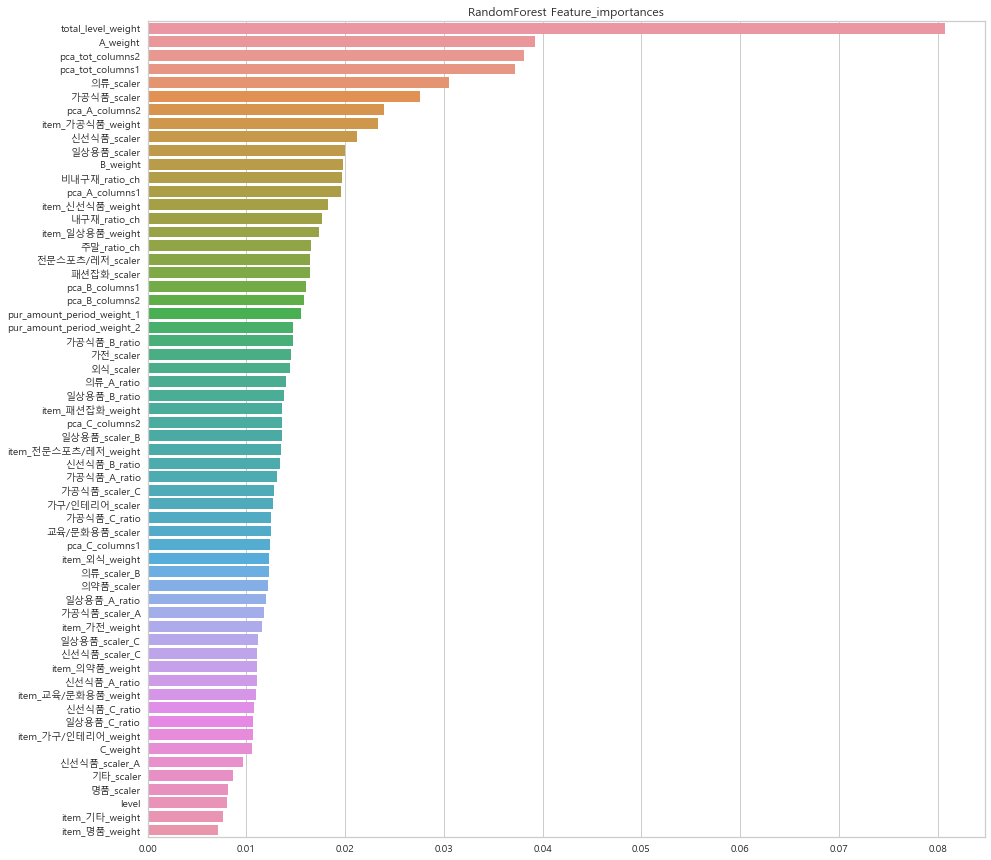

In [489]:
import seaborn as sns
import matplotlib.pyplot as plt

li2 = []
for i in zip(rf.feature_importances_, X_train1.columns):
    li2.append(i)
    
li2 = sorted(li2,reverse=True)

fi2 = [x[0] for x in li2]
na2 = [x[1] for x in li2]

plt.figure(figsize=(15,15))
plt.rc('font',family='Malgun Gothic')
plt.title('RandomForest Feature_importances')
sns.barplot(x=fi2,y=na2)

In [ ]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train1,y_train1)
preds1=rf.predict(X_test1)

acc1 = accuracy_score(y_test1, preds1)
print (acc1)

In [479]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train1, y_train1)
acc4= dt.predict(X_test1)

print (accuracy_score(y_test1, acc4))

0.704054193815286


[Text(1674.0, 2989.7999999999997, 'total_level_weight <= -0.95\ngini = 0.487\nsamples = 19338\nvalue = [11207, 8131]'),
 Text(837.0, 2446.2, 'pca_tot_columns1 <= -0.25\ngini = 0.418\nsamples = 6812\nvalue = [2026, 4786]'),
 Text(418.5, 1902.6, 'B_weight <= -4.25\ngini = 0.476\nsamples = 2664\nvalue = [1040, 1624]'),
 Text(209.25, 1358.9999999999998, 'pca_B_columns1 <= 0.544\ngini = 0.357\nsamples = 412\nvalue = [96, 316]'),
 Text(104.625, 815.3999999999996, '신선식품_scaler <= -0.119\ngini = 0.444\nsamples = 15\nvalue = [10, 5]'),
 Text(52.3125, 271.7999999999997, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(156.9375, 271.7999999999997, 'gini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(313.875, 815.3999999999996, '신선식품_B_ratio <= -0.005\ngini = 0.339\nsamples = 397\nvalue = [86, 311]'),
 Text(261.5625, 271.7999999999997, 'gini = 0.429\nsamples = 157\nvalue = [49, 108]'),
 Text(366.1875, 271.7999999999997, 'gini = 0.261\nsamples = 240\nvalue = [37, 203]'),
 Text(627.75, 1358.999999

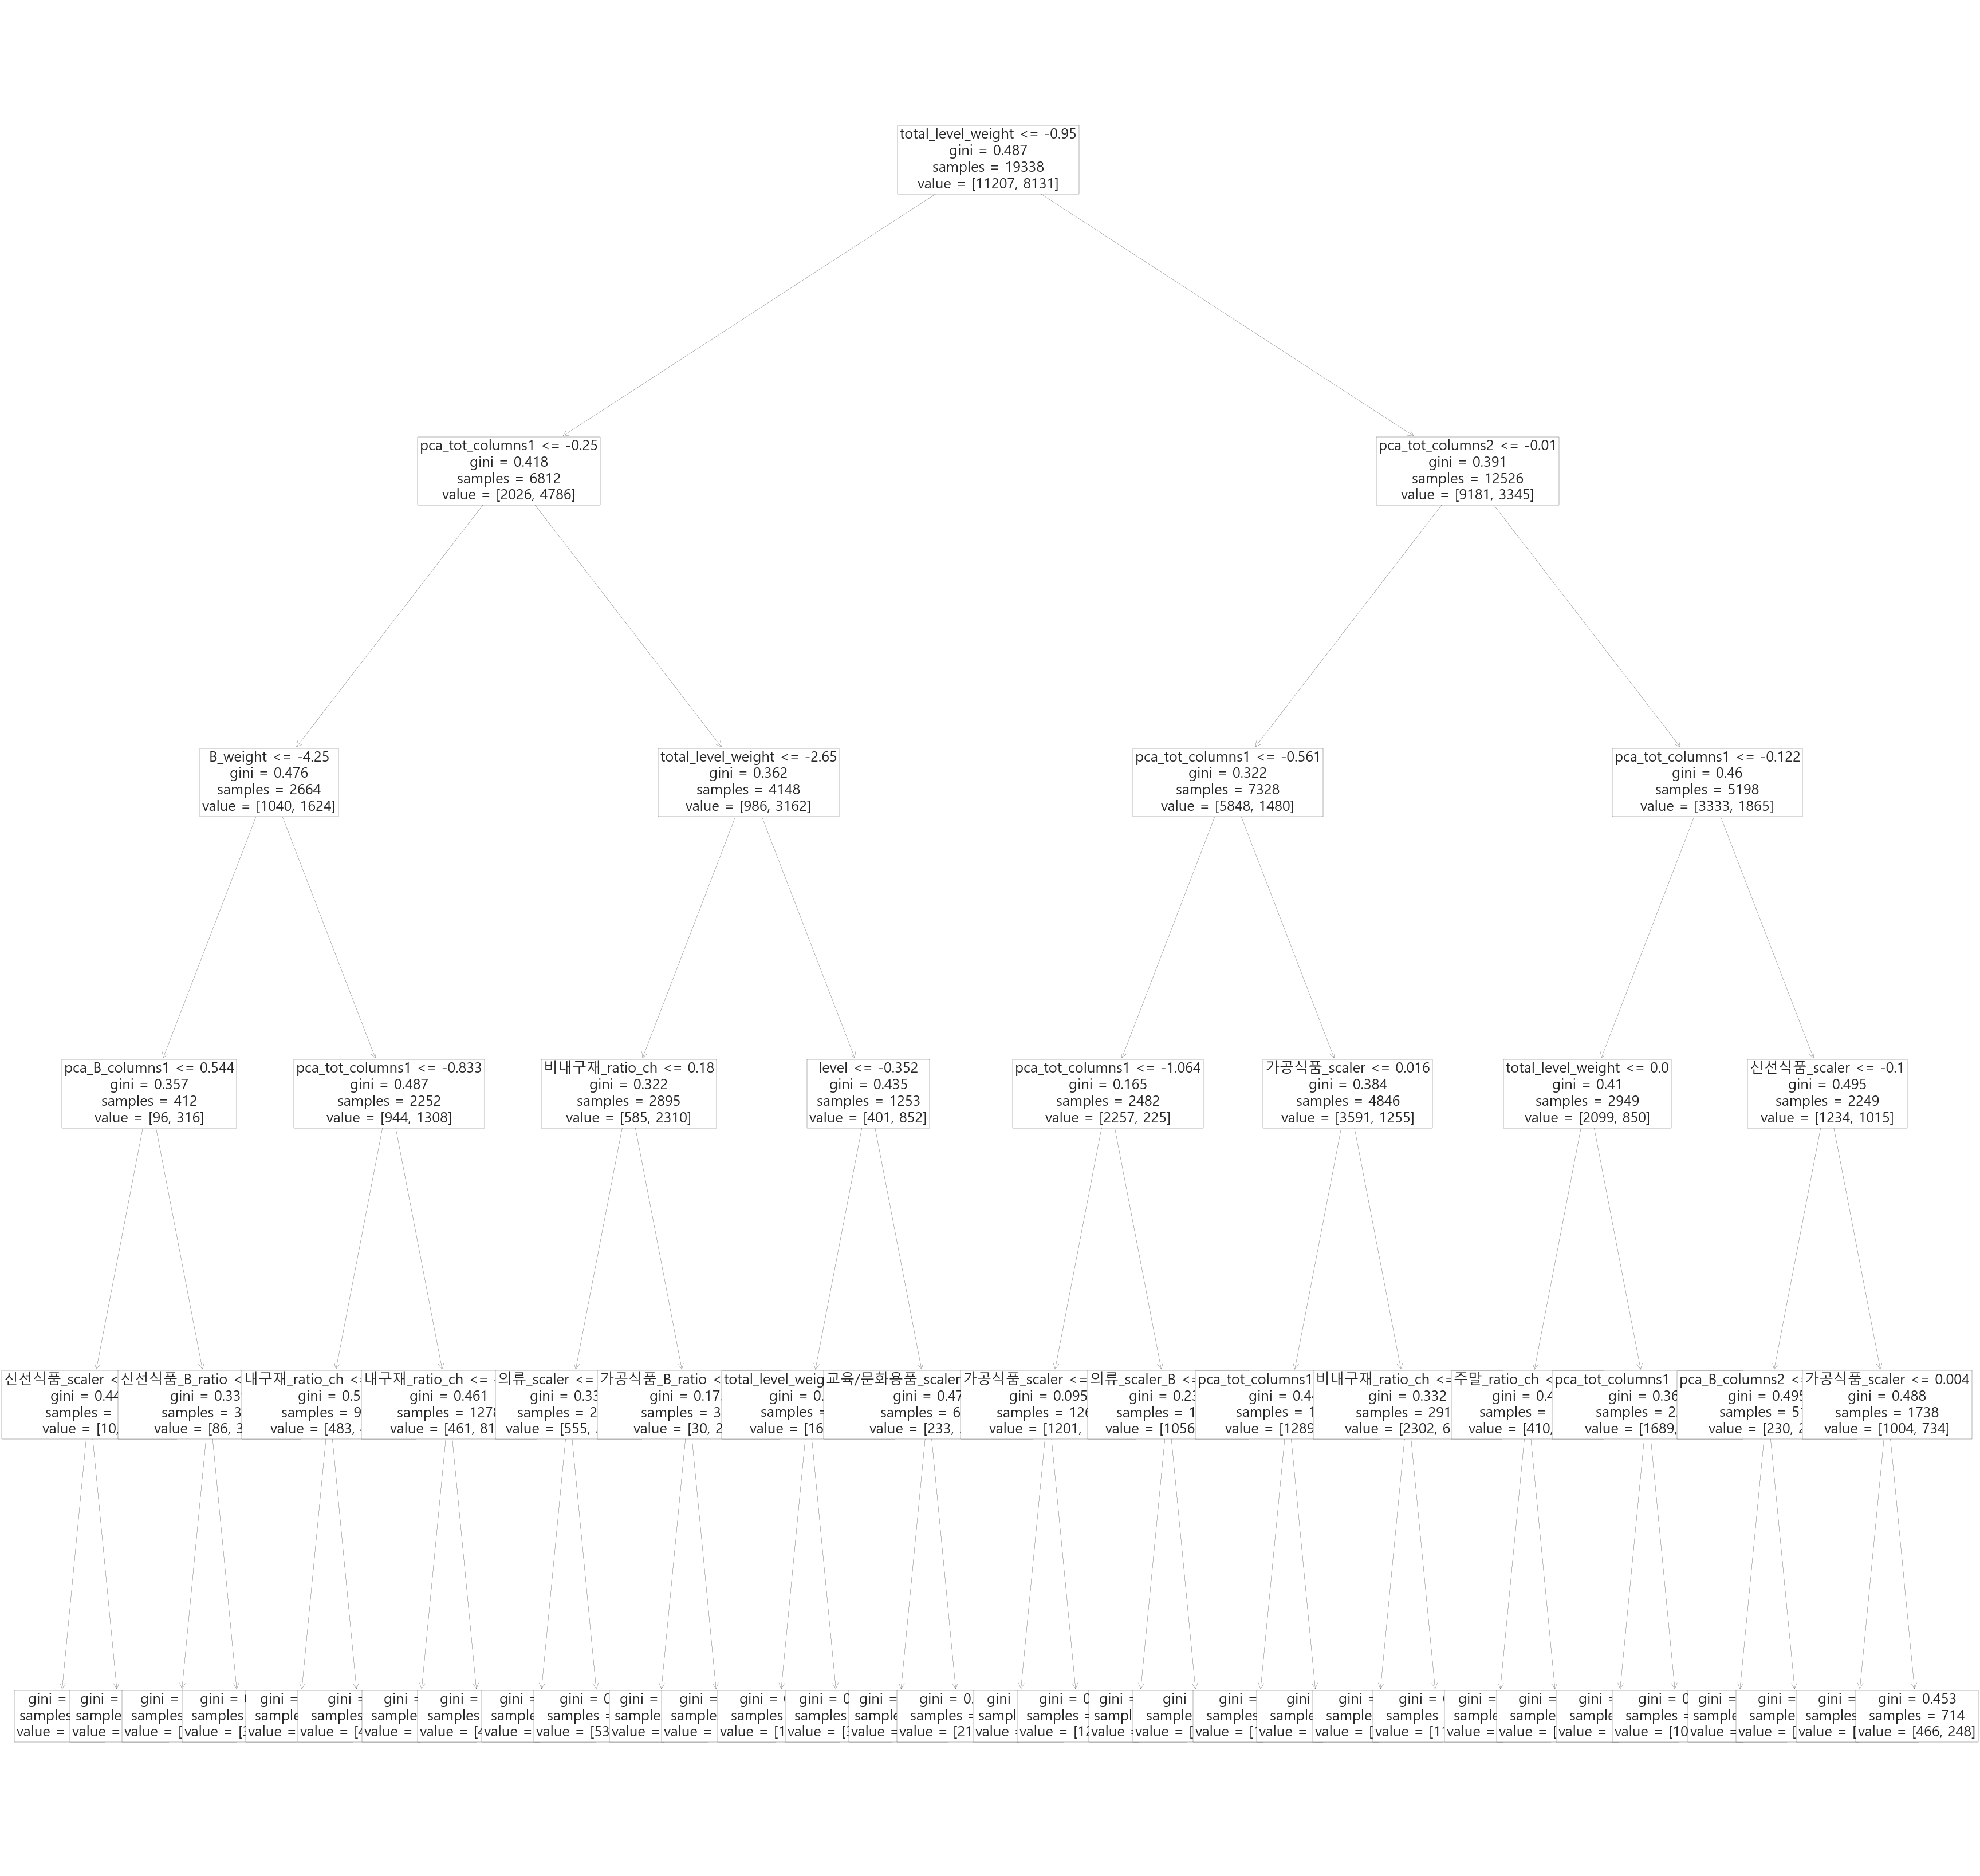

In [480]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(60,60))

plot_tree(dt, feature_names=X_train1.columns, fontsize=25)

In [ ]:
xg = XGBClassifier(n_estimators = 500, learning_rate=0.1, n_jobs=-1)
xg.fit(X_train1, y_train1)
preds1 = xg.predict(X_test1)

print (accuracy_score(y_test1, preds1))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

li1 = []
for i in zip(xg.feature_importances_, X_train1.columns):
    li1.append(i)
    
li1 = sorted(li1,reverse=True)

fi1 = [x[0] for x in li1]
na1 = [x[1] for x in li1]

plt.figure(figsize=(15,15))
plt.rc('font',family='Malgun Gothic')
plt.title('XGBboost Feature_importances')
sns.barplot(x=fi1[:20],y=na1[:20])

In [ ]:

lg = LGBMClassifier(n_estimators = 500, learning_rate=0.1, n_jobs=-1)
lg.fit(X_train1, y_train1)
preds2= lg.predict(X_test1)

print (accuracy_score(y_test1, preds2))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

li = []
for i in zip(lg.feature_importances_, X_train1.columns):
    li.append(i)
    
li = sorted(li,reverse=True)

fi = [x[0] for x in li]
na = [x[1] for x in li]

plt.figure(figsize=(15,15))
plt.rc('font',family='Malgun Gothic')
plt.title('LightGBM Feature_importances')
sns.barplot(x=fi[:20],y=na[:20])

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train1, y_train1)
acc5= lr.predict(X_test1)

print (accuracy_score(y_test1, acc5))

In [531]:
cust.head(1)

cust_no  region_code region region_plus  gender  age_cat  online_B  \
0        1         60.0  서울특별시         동남권       0        5       0.0   

   online_C  mobile_A  mobile_B  mobile_C  mobile_D  하이마트  다둥이  롭스  더영  
0       0.0       0.0       0.0       0.0       0.0     0    0   0   0

In [597]:
X =freq23.query('label==1').drop(
['label','cust_no',
                         'mem_1','mem_2',
                         '일상용품_scaler',
                         '신선식품_scaler_B','가공식품_scaler_B',
                         '의류_scaler_A',
                         '의류_scaler_C','의류_C_ratio',
                         '의류_B_ratio',
                        ],axis=1).fillna(0)

# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# X['region_plus'] = encoder.fit_transform(X[['region_plus']])

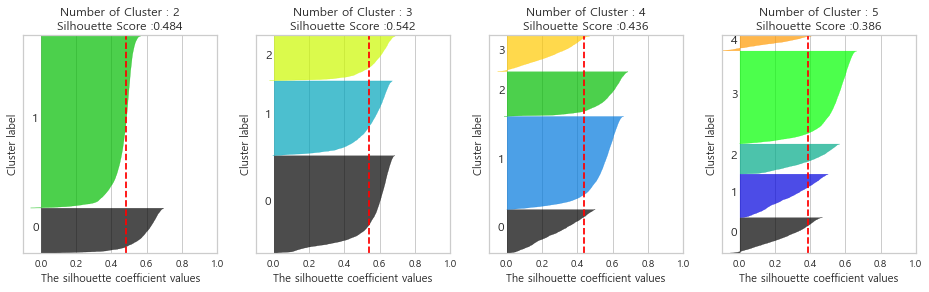

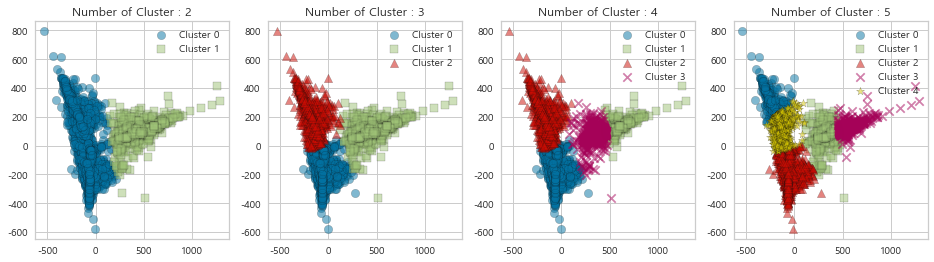

In [598]:
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

visualize_silhouette([2,3,4,5], X)
visualize_kmeans_plot_multi([2,3,4,5],X)

In [599]:
import warnings
warnings.filterwarnings('ignore')

In [600]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

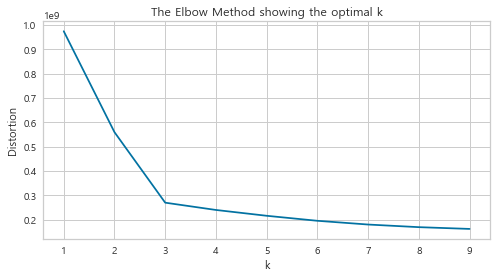

In [659]:

plt.figure(figsize=(8,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [545]:
freq_ori_23 = pd.read_csv('dataframe/23기origin.csv')[['cust_no','total_freq_2', 'freq_A_2',
       'freq_A_1_2', 'freq_A_2_2', 'freq_B_2', 'freq_B_1_2', 'freq_B_2_2',
       'freq_C_2', 'freq_C_1_2', 'freq_C_2_2', 'total_freq_3', 'freq_A_3',
       'freq_A_1_3', 'freq_A_2_3', 'freq_B_3', 'freq_B_1_3', 'freq_B_2_3',
       'freq_C_3', 'freq_C_1_3', 'freq_C_2_3',]]
freq_ori_12 = pd.read_csv('dataframe/origin_df_1014.csv')[['cust_no','total_freq_1', 'total_freq_2', 'freq_A_1', 'freq_A_2', 'freq_B_1',
       'freq_B_2', 'freq_C_1', 'freq_C_2', 'freq_A_1_1', 'freq_A_2_1',
       'freq_B_1_1', 'freq_B_2_1', 'freq_C_1_1', 'freq_C_2_1', 'freq_A_1_2',
       'freq_A_2_2', 'freq_B_1_2', 'freq_B_2_2', 'freq_C_1_2', 'freq_C_2_2',]]
freq_ori_23

cust_no  total_freq_2  freq_A_2  freq_A_1_2  freq_A_2_2  freq_B_2  \
0            1         219.0     206.0        95.0       111.0       4.0   
1            2         167.0     166.0        95.0        71.0       1.0   
2            3         168.0       NaN         NaN         NaN       1.0   
3            4         105.0      84.0        47.0        37.0      12.0   
4            5          75.0      75.0        59.0        16.0       NaN   
...        ...           ...       ...         ...         ...       ...   
19351    19283           NaN       NaN         NaN         NaN       NaN   
19352    19350           NaN       NaN         NaN         NaN       NaN   
19353    19381           NaN       NaN         NaN         NaN       NaN   
19354    19382           NaN       NaN         NaN         NaN       NaN   
19355    19383           NaN       NaN         NaN         NaN       NaN   

       freq_B_1_2  freq_B_2_2  freq_C_2  freq_C_1_2  freq_C_2_2  total_freq_3  \
0             1.0         3.0       9.0         4.0         5.0         185.0   
1             NaN         1.0       NaN         NaN         NaN         166.0   
2             1.0         NaN     167.0        93.0        74.0          94.0   
3             6.0         6.0       9.0         3.0         6.0         134.0   
4             NaN         NaN       NaN         NaN         NaN          81.0   
...           ...         ...       ...         ...         ...           ...   
19351         NaN         NaN       NaN         NaN         NaN          52.0   
19352         NaN         NaN       NaN         NaN         NaN          86.0   
19353         NaN         NaN       NaN         NaN         NaN         155.0   
19354         NaN         NaN       NaN         NaN         NaN         146.0   
19355         NaN         NaN       NaN         NaN         NaN           3.0   

       freq_A_3  freq_A_1_3  freq_A_2_3  freq_B_3  freq_B_1_3  freq_B_2_3  \
0         173.0       105.0        68.0       4.0         3.0         1.0   
1         157.0        93.0        64.0       3.0         2.0         1.0   
2           NaN         NaN         NaN       NaN         NaN         NaN   
3         112.0        58.0        54.0       8.0         2.0         6.0   
4          78.0        59.0        19.0       NaN         NaN         NaN   
...         ...         ...         ...       ...         ...         ...   
19351      52.0         NaN        52.0       NaN         NaN         NaN   
19352       NaN         NaN         NaN       5.0         1.0         4.0   
19353       2.0         2.0         NaN     153.0        58.0        95.0   
19354       4.0         1.0         3.0     142.0        53.0        89.0   
19355       NaN         NaN         NaN       NaN         NaN         NaN   

       freq_C_3  freq_C_1_3  freq_C_2_3  
0           8.0         3.0         5.0  
1           NaN         NaN         NaN  
2          94.0        37.0        57.0  
3          14.0         6.0         8.0  
4           NaN         NaN         NaN  
...         ...         ...         ...  
19351       NaN         NaN         NaN  
19352       1.0         NaN         1.0  
19353       NaN         NaN         NaN  
19354       NaN         NaN         NaN  
19355       NaN         NaN         NaN  

[19356 rows x 21 columns]

In [618]:
X_train1.columns

Index(['내구재_ratio_ch', '주말_ratio_ch', 'total_level_weight', 'A_weight',
       'B_weight', 'C_weight', 'item_가공식품_weight', 'item_의약품_weight',
       'item_신선식품_weight', 'item_일상용품_weight', 'item_교육/문화용품_weight',
       'item_외식_weight', 'item_패션잡화_weight', 'item_의류_weight',
       'item_기타_weight', 'item_전문스포츠/레저_weight', 'item_가구/인테리어_weight',
       'item_가전_weight', 'item_명품_weight', 'pur_amount_period_weight_1',
       'pur_amount_period_weight_2', 'pca_tot_columns1', 'pca_tot_columns2',
       'pca_A_columns1', 'pca_A_columns2', 'pca_B_columns1', 'pca_B_columns2',
       'pca_C_columns1', 'pca_C_columns2', '비내구재_ratio_ch', '가공식품_A_ratio',
       '신선식품_A_ratio', '일상용품_A_ratio', '의류_A_ratio', '가공식품_B_ratio',
       '신선식품_B_ratio', '일상용품_B_ratio', '가공식품_C_ratio', '신선식품_C_ratio',
       '일상용품_C_ratio', 'level', '가공식품_scaler', '가구/인테리어_scaler', '가전_scaler',
       '교육/문화용품_scaler', '기타_scaler', '명품_scaler', '신선식품_scaler', '외식_scaler',
       '의류_scaler', '의약품_scaler', '전문스포츠/레저_scaler'

In [619]:
train_d.columns

Index(['cust_no', 'mem_1', 'mem_2', '내구재_ratio_ch', '주말_ratio_ch',
       'total_level_weight', 'A_weight', 'B_weight', 'C_weight',
       'item_가공식품_weight', 'item_의약품_weight', 'item_신선식품_weight',
       'item_일상용품_weight', 'item_교육/문화용품_weight', 'item_외식_weight',
       'item_패션잡화_weight', 'item_의류_weight', 'item_기타_weight',
       'item_전문스포츠/레저_weight', 'item_가구/인테리어_weight', 'item_가전_weight',
       'item_명품_weight', 'pur_amount_period_weight_1',
       'pur_amount_period_weight_2', 'pca_tot_columns1', 'pca_tot_columns2',
       'pca_A_columns1', 'pca_A_columns2', 'pca_B_columns1', 'pca_B_columns2',
       'pca_C_columns1', 'pca_C_columns2', '비내구재_ratio_ch', '가공식품_A_ratio',
       '신선식품_A_ratio', '일상용품_A_ratio', '의류_A_ratio', '가공식품_B_ratio',
       '신선식품_B_ratio', '일상용품_B_ratio', '의류_B_ratio', '가공식품_C_ratio',
       '신선식품_C_ratio', '일상용품_C_ratio', '의류_C_ratio', 'label', 'level',
       '가공식품_scaler', '가구/인테리어_scaler', '가전_scaler', '교육/문화용품_scaler',
       '기타_scaler', '명품_scaler',

In [546]:
freq_ori_23.columns

Index(['cust_no', 'total_freq_2', 'freq_A_2', 'freq_A_1_2', 'freq_A_2_2',
       'freq_B_2', 'freq_B_1_2', 'freq_B_2_2', 'freq_C_2', 'freq_C_1_2',
       'freq_C_2_2', 'total_freq_3', 'freq_A_3', 'freq_A_1_3', 'freq_A_2_3',
       'freq_B_3', 'freq_B_1_3', 'freq_B_2_3', 'freq_C_3', 'freq_C_1_3',
       'freq_C_2_3'],
      dtype='object')

In [547]:
freq_ori_12

cust_no  total_freq_1  total_freq_2  freq_A_1  freq_A_2  freq_B_1  \
0            1         159.0         219.0     154.0     206.0       1.0   
1            2         188.0         167.0     187.0     166.0       1.0   
2            3         128.0         168.0       1.0       0.0       0.0   
3            4         137.0         105.0     118.0      84.0       3.0   
4            5         220.0          75.0     219.0      75.0       1.0   
...        ...           ...           ...       ...       ...       ...   
19333    19376           0.0          23.0       0.0       0.0       0.0   
19334    19377           0.0          10.0       0.0       3.0       0.0   
19335    19378           0.0          19.0       0.0      17.0       0.0   
19336    19379           0.0          56.0       0.0       6.0       0.0   
19337    19380           0.0           8.0       0.0       0.0       0.0   

       freq_B_2  freq_C_1  freq_C_2  freq_A_1_1  freq_A_2_1  freq_B_1_1  \
0           4.0       4.0       9.0       120.0       129.0         1.0   
1           1.0       0.0       0.0       183.0       139.0         1.0   
2           1.0     127.0     167.0         0.0         0.0         0.0   
3          12.0      16.0       9.0        81.0        59.0         0.0   
4           0.0       0.0       0.0       183.0       110.0         1.0   
...         ...       ...       ...         ...         ...         ...   
19333      23.0       0.0       0.0         0.0         0.0         0.0   
19334       1.0       0.0       0.0         0.0         0.0         0.0   
19335       2.0       0.0       0.0         0.0         0.0         0.0   
19336       0.0       0.0       0.0         0.0         0.0         0.0   
19337       0.0       0.0       0.0         0.0         0.0         0.0   

       freq_B_2_1  freq_C_1_1  freq_C_2_1  freq_A_1_2  freq_A_2_2  freq_B_1_2  \
0             3.0         0.0        10.0       110.0       145.0         0.0   
1             0.0         0.0         0.0       155.0       125.0         0.0   
2             2.0       139.0       244.0         1.0         0.0         0.0   
3            21.0        12.0         5.0       120.0        46.0        15.0   
4             0.0         0.0         0.0       193.0        20.0         0.0   
...           ...         ...         ...         ...         ...         ...   
19333         0.0         0.0         0.0         0.0         0.0         0.0   
19334         0.0         0.0         0.0         0.0         3.0         0.0   
19335         0.0         0.0         0.0         0.0        17.0         0.0   
19336         0.0         0.0         0.0         0.0         6.0         0.0   
19337         0.0         0.0         0.0         0.0         0.0         0.0   

       freq_B_2_2  freq_C_1_2  freq_C_2_2  
0            38.0         7.0        31.0  
1             7.0         0.0         0.0  
2             0.0       208.0       145.0  
3            21.0        42.0        20.0  
4             0.0         0.0         0.0  
...           ...         ...         ...  
19333        67.0         0.0         0.0  
19334         2.0         0.0         0.0  
19335         3.0         0.0         0.0  
19336         0.0         0.0         0.0  
19337         0.0         0.0         0.0  

[19338 rows x 21 columns]

In [548]:
freq23 = pd.merge(test_d, freq_ori_23, on='cust_no',how='left')
freq12 = pd.merge(train_d, freq_ori_12, on='cust_no',how='left')

In [551]:
freq23.drop(['pca_tot_columns1', 'pca_tot_columns2',
       'pca_A_columns1', 'pca_A_columns2', 'pca_B_columns1', 'pca_B_columns2',
       'pca_C_columns1', 'pca_C_columns2',],axis=1, inplace=True)

freq12.drop(['pca_tot_columns1', 'pca_tot_columns2',
       'pca_A_columns1', 'pca_A_columns2', 'pca_B_columns1', 'pca_B_columns2',
       'pca_C_columns1', 'pca_C_columns2',],axis=1, inplace=True)

In [555]:
freq12

cust_no  mem_1  mem_2  내구재_ratio_ch  주말_ratio_ch  total_level_weight  \
0            1   -1.0   -1.0      0.396531     0.073318                 8.5   
1            2   -1.0   -1.0     -0.027302    -0.053000                -6.4   
2            3   -1.0   -1.0      0.025802     0.049851                 0.2   
3            4   -1.0   -1.0      0.098064    -0.064373                -3.0   
4            5   -1.0   -1.0      0.075806    -0.042121                -3.6   
...        ...    ...    ...           ...          ...                 ...   
19333    19376   -1.0   -1.0      0.000000     0.347826                 0.1   
19334    19377   -1.0    2.0      0.000000     0.600000                 0.1   
19335    19378   -1.0   -1.0      0.000000     0.263158                 0.2   
19336    19379   -1.0    1.0      0.000000     0.142857                 0.3   
19337    19380   -1.0    1.0      0.018940     0.000000                 0.2   

       A_weight  B_weight  C_weight  item_가공식품_weight  item_의약품_weight  \
0           5.0       0.9       2.4              -7.5              0.6   
1          -4.0       0.2       0.0              -6.5              0.0   
2          -0.1       0.1       3.2               0.8              0.0   
3          -1.8       0.9      -2.4              -3.2             -2.4   
4          -2.8      -0.1       0.0              -6.5              0.0   
...         ...       ...       ...               ...              ...   
19333       0.0       0.6       0.0               0.2              0.0   
19334       0.1       0.1       0.0               0.1              0.0   
19335       0.4       0.1       0.0               0.1              0.0   
19336       0.4       0.0       0.0               0.2              0.6   
19337       0.0       0.0       0.0               0.1              0.0   

       item_신선식품_weight  item_일상용품_weight  item_교육/문화용품_weight  \
0                   5.2               8.5                  0.0   
1                  -8.5              -9.0                  0.0   
2                   1.0               0.6                  0.0   
3                  -4.0               4.5                  0.0   
4                  -4.5              -5.5                  0.0   
...                 ...               ...                  ...   
19333               0.4               0.1                  0.0   
19334               0.0               0.9                  0.0   
19335               0.4               0.9                  0.0   
19336               0.0               2.5                  0.0   
19337               0.0               2.0                  0.2   

       item_외식_weight  item_패션잡화_weight  item_의류_weight  item_기타_weight  \
0                 7.0              -5.2             8.0             0.0   
1                -4.2              -5.2             7.0             0.0   
2                 0.0               0.0            -0.6             0.0   
3                -4.4              -4.0            -4.8             0.0   
4                -6.5              -1.8            -2.4             0.0   
...               ...               ...             ...             ...   
19333             0.0               0.0             0.0             0.0   
19334             0.2               0.0             0.1             0.0   
19335             0.2               0.0             0.6             0.0   
19336             0.6               2.4             0.0             0.0   
19337             0.0               0.0             0.0             0.0   

       item_전문스포츠/레저_weight  item_가구/인테리어_weight  item_가전_weight  \
0                      -4.0                  7.5             4.5   
1                      -8.5                 -5.5            -7.5   
2                       0.0                  0.0             0.8   
3                       3.6                  2.8             0.0   
4                       0.7                  2.4            -1.5   
...                     ...                  ...             ...   

In [593]:
freq1 = freq_ori_12[['cust_no','total_freq_1','freq_A_1','freq_B_1','freq_C_1','freq_A_1_1','freq_A_2_1','freq_B_1_1','freq_B_2_1','freq_C_1_1','freq_C_2_1']]

In [594]:
freq23 = pd.merge(freq23, freq1, on='cust_no',how='left')

In [595]:
freq23

cust_no  mem_1  mem_2  내구재_ratio_ch  주말_ratio_ch  total_level_weight  \
0            1   -1.0   -1.0      0.396531     0.073318                 8.5   
1            2   -1.0   -1.0     -0.027302    -0.053000                -6.4   
2            3   -1.0   -1.0      0.025802     0.049851                 0.2   
3            4   -1.0   -1.0      0.098064    -0.064373                -3.0   
4            5   -1.0   -1.0      0.075806    -0.042121                -3.6   
...        ...    ...    ...           ...          ...                 ...   
19333    19376   -1.0   -1.0      0.000000     0.347826                 0.1   
19334    19377   -1.0    2.0      0.000000     0.600000                 0.1   
19335    19378   -1.0   -1.0      0.000000     0.263158                 0.2   
19336    19379   -1.0    1.0      0.000000     0.142857                 0.3   
19337    19380   -1.0    1.0      0.018940     0.000000                 0.2   

       A_weight  B_weight  C_weight  item_가공식품_weight  item_의약품_weight  \
0           5.0       0.9       2.4              -7.5              0.6   
1          -4.0       0.2       0.0              -6.5              0.0   
2          -0.1       0.1       3.2               0.8              0.0   
3          -1.8       0.9      -2.4              -3.2             -2.4   
4          -2.8      -0.1       0.0              -6.5              0.0   
...         ...       ...       ...               ...              ...   
19333       0.0       0.6       0.0               0.2              0.0   
19334       0.1       0.1       0.0               0.1              0.0   
19335       0.4       0.1       0.0               0.1              0.0   
19336       0.4       0.0       0.0               0.2              0.6   
19337       0.0       0.0       0.0               0.1              0.0   

       item_신선식품_weight  item_일상용품_weight  item_교육/문화용품_weight  \
0                   5.2               8.5                  0.0   
1                  -8.5              -9.0                  0.0   
2                   1.0               0.6                  0.0   
3                  -4.0               4.5                  0.0   
4                  -4.5              -5.5                  0.0   
...                 ...               ...                  ...   
19333               0.4               0.1                  0.0   
19334               0.0               0.9                  0.0   
19335               0.4               0.9                  0.0   
19336               0.0               2.5                  0.0   
19337               0.0               2.0                  0.2   

       item_외식_weight  item_패션잡화_weight  item_의류_weight  item_기타_weight  \
0                 7.0              -5.2             8.0             0.0   
1                -4.2              -5.2             7.0             0.0   
2                 0.0               0.0            -0.6             0.0   
3                -4.4              -4.0            -4.8             0.0   
4                -6.5              -1.8            -2.4             0.0   
...               ...               ...             ...             ...   
19333             0.0               0.0             0.0             0.0   
19334             0.2               0.0             0.1             0.0   
19335             0.2               0.0             0.6             0.0   
19336             0.6               2.4             0.0             0.0   
19337             0.0               0.0             0.0             0.0   

       item_전문스포츠/레저_weight  item_가구/인테리어_weight  item_가전_weight  \
0                      -4.0                  7.5             4.5   
1                      -8.5                 -5.5            -7.5   
2                       0.0                  0.0             0.8   
3                       3.6                  2.8             0.0   
4                       0.7                  2.4            -1.5   
...                     ...                  ...             ...   

In [596]:
freq12.to_csv('dataset/군집용_dataset_train.csv',index=False)
freq23.to_csv('dataset/군집용_dataset_test.csv',index=False)

In [602]:
freq12.columns

Index(['cust_no', 'mem_1', 'mem_2', '내구재_ratio_ch', '주말_ratio_ch',
       'total_level_weight', 'A_weight', 'B_weight', 'C_weight',
       'item_가공식품_weight', 'item_의약품_weight', 'item_신선식품_weight',
       'item_일상용품_weight', 'item_교육/문화용품_weight', 'item_외식_weight',
       'item_패션잡화_weight', 'item_의류_weight', 'item_기타_weight',
       'item_전문스포츠/레저_weight', 'item_가구/인테리어_weight', 'item_가전_weight',
       'item_명품_weight', 'pur_amount_period_weight_1',
       'pur_amount_period_weight_2', '비내구재_ratio_ch', '가공식품_A_ratio',
       '신선식품_A_ratio', '일상용품_A_ratio', '의류_A_ratio', '가공식품_B_ratio',
       '신선식품_B_ratio', '일상용품_B_ratio', '의류_B_ratio', '가공식품_C_ratio',
       '신선식품_C_ratio', '일상용품_C_ratio', '의류_C_ratio', 'label', 'level',
       '가공식품_scaler', '가구/인테리어_scaler', '가전_scaler', '교육/문화용품_scaler',
       '기타_scaler', '명품_scaler', '신선식품_scaler', '외식_scaler', '의류_scaler',
       '의약품_scaler', '일상용품_scaler', '전문스포츠/레저_scaler', '패션잡화_scaler',
       '가공식품_scaler_A', '가공식품_scaler_B', '가공식품_sca

In [621]:
freq12= pd.read_csv('dataset/군집용_dataset_train.csv')
freq23= pd.read_csv('dataset/군집용_dataset_test.csv')

In [624]:
# train_d = train_d.drop([
# #     'label','cust_no',
#                          'mem_1','mem_2',
#                          '일상용품_scaler',
#                         '신선식품_scaler_B','가공식품_scaler_B',
#                          '의류_scaler_A',
#                          '의류_scaler_C','의류_C_ratio',
#                          '의류_B_ratio'],axis=1)
# test_d = test_d.drop([
# #     'label','cust_no',
#                          'mem_1','mem_2',
#                          '일상용품_scaler',
#                         '신선식품_scaler_B','가공식품_scaler_B',
#                          '의류_scaler_A',
#                          '의류_scaler_C','의류_C_ratio',
#                          '의류_B_ratio'],axis=1)

# freq12 = freq12.drop([
# #     'label','cust_no',
#                          'mem_1','mem_2',
#                          '일상용품_scaler',
#                         '신선식품_scaler_B','가공식품_scaler_B',
#                          '의류_scaler_A',
#                          '의류_scaler_C','의류_C_ratio',
#                          '의류_B_ratio'],axis=1)
freq23 = freq23.drop([
#     'label','cust_no',
                         'mem_1','mem_2',
                         '일상용품_scaler',
                        '신선식품_scaler_B','가공식품_scaler_B',
                         '의류_scaler_A',
                         '의류_scaler_C','의류_C_ratio',
                         '의류_B_ratio'],axis=1)

In [684]:
X_train1.columns

Index(['내구재_ratio_ch', '주말_ratio_ch', 'total_level_weight', 'A_weight',
       'B_weight', 'C_weight', 'item_가공식품_weight', 'item_의약품_weight',
       'item_신선식품_weight', 'item_일상용품_weight', 'item_교육/문화용품_weight',
       'item_외식_weight', 'item_패션잡화_weight', 'item_의류_weight',
       'item_기타_weight', 'item_전문스포츠/레저_weight', 'item_가구/인테리어_weight',
       'item_가전_weight', 'item_명품_weight', 'pur_amount_period_weight_1',
       'pur_amount_period_weight_2', 'pca_tot_columns1', 'pca_tot_columns2',
       'pca_A_columns1', 'pca_A_columns2', 'pca_B_columns1', 'pca_B_columns2',
       'pca_C_columns1', 'pca_C_columns2', '비내구재_ratio_ch', '가공식품_A_ratio',
       '신선식품_A_ratio', '일상용품_A_ratio', '의류_A_ratio', '가공식품_B_ratio',
       '신선식품_B_ratio', '일상용품_B_ratio', '가공식품_C_ratio', '신선식품_C_ratio',
       '일상용품_C_ratio', 'level', '가공식품_scaler', '가구/인테리어_scaler', '가전_scaler',
       '교육/문화용품_scaler', '기타_scaler', '명품_scaler', '신선식품_scaler', '외식_scaler',
       '의류_scaler', '의약품_scaler', '전문스포츠/레저_scaler'

In [625]:
train_d.to_csv('dataset/최종dataset_train.csv',index=False)
test_d.to_csv('dataset/최종dataset_test.csv',index=False)
freq12.to_csv('dataset/군집용_dataset_train.csv',index=False)
freq23.to_csv('dataset/군집용_dataset_test.csv',index=False)

In [626]:
train_d

cust_no  내구재_ratio_ch  주말_ratio_ch  total_level_weight  A_weight  \
0            1      0.396531     0.073318                 8.5       5.0   
1            2     -0.027302    -0.053000                -6.4      -4.0   
2            3      0.025802     0.049851                 0.2      -0.1   
3            4      0.098064    -0.064373                -3.0      -1.8   
4            5      0.075806    -0.042121                -3.6      -2.8   
...        ...           ...          ...                 ...       ...   
19333    19376      0.000000     0.347826                 0.1       0.0   
19334    19377      0.000000     0.600000                 0.1       0.1   
19335    19378      0.000000     0.263158                 0.2       0.4   
19336    19379      0.000000     0.142857                 0.3       0.4   
19337    19380      0.018940     0.000000                 0.2       0.0   

       B_weight  C_weight  item_가공식품_weight  item_의약품_weight  \
0           0.9       2.4              -7.5              0.6   
1           0.2       0.0              -6.5              0.0   
2           0.1       3.2               0.8              0.0   
3           0.9      -2.4              -3.2             -2.4   
4          -0.1       0.0              -6.5              0.0   
...         ...       ...               ...              ...   
19333       0.6       0.0               0.2              0.0   
19334       0.1       0.0               0.1              0.0   
19335       0.1       0.0               0.1              0.0   
19336       0.0       0.0               0.2              0.6   
19337       0.0       0.0               0.1              0.0   

       item_신선식품_weight  item_일상용품_weight  item_교육/문화용품_weight  \
0                   5.2               8.5                  0.0   
1                  -8.5              -9.0                  0.0   
2                   1.0               0.6                  0.0   
3                  -4.0               4.5                  0.0   
4                  -4.5              -5.5                  0.0   
...                 ...               ...                  ...   
19333               0.4               0.1                  0.0   
19334               0.0               0.9                  0.0   
19335               0.4               0.9                  0.0   
19336               0.0               2.5                  0.0   
19337               0.0               2.0                  0.2   

       item_외식_weight  item_패션잡화_weight  item_의류_weight  item_기타_weight  \
0                 7.0              -5.2             8.0             0.0   
1                -4.2              -5.2             7.0             0.0   
2                 0.0               0.0            -0.6             0.0   
3                -4.4              -4.0            -4.8             0.0   
4                -6.5              -1.8            -2.4             0.0   
...               ...               ...             ...             ...   
19333             0.0               0.0             0.0             0.0   
19334             0.2               0.0             0.1             0.0   
19335             0.2               0.0             0.6             0.0   
19336             0.6               2.4             0.0             0.0   
19337             0.0               0.0             0.0             0.0   

       item_전문스포츠/레저_weight  item_가구/인테리어_weight  item_가전_weight  \
0                      -4.0                  7.5             4.5   
1                      -8.5                 -5.5            -7.5   
2                       0.0                  0.0             0.8   
3                       3.6                  2.8             0.0   
4                       0.7                  2.4            -1.5   
...                     ...                  ...             ...   
19333                   0.0                  0.0             0.0   
19334                   0.0                  0.0             0.0   
19335                   0.0    

In [658]:
test_d.columns

Index(['cust_no', '내구재_ratio_ch', '주말_ratio_ch', 'total_level_weight',
       'A_weight', 'B_weight', 'C_weight', 'item_가공식품_weight',
       'item_의약품_weight', 'item_신선식품_weight', 'item_일상용품_weight',
       'item_교육/문화용품_weight', 'item_외식_weight', 'item_패션잡화_weight',
       'item_의류_weight', 'item_기타_weight', 'item_전문스포츠/레저_weight',
       'item_가구/인테리어_weight', 'item_가전_weight', 'item_명품_weight',
       'pur_amount_period_weight_1', 'pur_amount_period_weight_2',
       'pca_tot_columns1', 'pca_tot_columns2', 'pca_A_columns1',
       'pca_A_columns2', 'pca_B_columns1', 'pca_B_columns2', 'pca_C_columns1',
       'pca_C_columns2', '비내구재_ratio_ch', '가공식품_A_ratio', '신선식품_A_ratio',
       '일상용품_A_ratio', '의류_A_ratio', '가공식품_B_ratio', '신선식품_B_ratio',
       '일상용품_B_ratio', '가공식품_C_ratio', '신선식품_C_ratio', '일상용품_C_ratio', 'label',
       'level', '가공식품_scaler', '가구/인테리어_scaler', '가전_scaler', '교육/문화용품_scaler',
       '기타_scaler', '명품_scaler', '신선식품_scaler', '외식_scaler', '의류_scaler',
       '의약품

In [628]:
freq12


cust_no  내구재_ratio_ch  주말_ratio_ch  total_level_weight  A_weight  \
0            1      0.396531     0.073318                 8.5       5.0   
1            2     -0.027302    -0.053000                -6.4      -4.0   
2            3      0.025802     0.049851                 0.2      -0.1   
3            4      0.098064    -0.064373                -3.0      -1.8   
4            5      0.075806    -0.042121                -3.6      -2.8   
...        ...           ...          ...                 ...       ...   
19333    19376      0.000000     0.347826                 0.1       0.0   
19334    19377      0.000000     0.600000                 0.1       0.1   
19335    19378      0.000000     0.263158                 0.2       0.4   
19336    19379      0.000000     0.142857                 0.3       0.4   
19337    19380      0.018940     0.000000                 0.2       0.0   

       B_weight  C_weight  item_가공식품_weight  item_의약품_weight  \
0           0.9       2.4              -7.5              0.6   
1           0.2       0.0              -6.5              0.0   
2           0.1       3.2               0.8              0.0   
3           0.9      -2.4              -3.2             -2.4   
4          -0.1       0.0              -6.5              0.0   
...         ...       ...               ...              ...   
19333       0.6       0.0               0.2              0.0   
19334       0.1       0.0               0.1              0.0   
19335       0.1       0.0               0.1              0.0   
19336       0.0       0.0               0.2              0.6   
19337       0.0       0.0               0.1              0.0   

       item_신선식품_weight  item_일상용품_weight  item_교육/문화용품_weight  \
0                   5.2               8.5                  0.0   
1                  -8.5              -9.0                  0.0   
2                   1.0               0.6                  0.0   
3                  -4.0               4.5                  0.0   
4                  -4.5              -5.5                  0.0   
...                 ...               ...                  ...   
19333               0.4               0.1                  0.0   
19334               0.0               0.9                  0.0   
19335               0.4               0.9                  0.0   
19336               0.0               2.5                  0.0   
19337               0.0               2.0                  0.2   

       item_외식_weight  item_패션잡화_weight  item_의류_weight  item_기타_weight  \
0                 7.0              -5.2             8.0             0.0   
1                -4.2              -5.2             7.0             0.0   
2                 0.0               0.0            -0.6             0.0   
3                -4.4              -4.0            -4.8             0.0   
4                -6.5              -1.8            -2.4             0.0   
...               ...               ...             ...             ...   
19333             0.0               0.0             0.0             0.0   
19334             0.2               0.0             0.1             0.0   
19335             0.2               0.0             0.6             0.0   
19336             0.6               2.4             0.0             0.0   
19337             0.0               0.0             0.0             0.0   

       item_전문스포츠/레저_weight  item_가구/인테리어_weight  item_가전_weight  \
0                      -4.0                  7.5             4.5   
1                      -8.5                 -5.5            -7.5   
2                       0.0                  0.0             0.8   
3                       3.6                  2.8             0.0   
4                       0.7                  2.4            -1.5   
...                     ...                  ...             ...   
19333                   0.0                  0.0             0.0   
19334                   0.0                  0.0             0.0   
19335                   0.0    

In [633]:
X_train1 = train_d.drop(['label','cust_no'],axis=1).fillna(0)
y_train1 = train_d['label']

X_test1 = test_d.drop(['label','cust_no'],axis=1).fillna(0)
y_test1 = test_d['label']


In [635]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train1,y_train1)
preds1=rf.predict(X_test1)

acc1 = accuracy_score(y_test1, preds1)*100
print (acc1.round(2))

74.63


In [642]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [646]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train1,y_train1)
preds1=rf.predict(X_test1)
preds_prob1 = rf.predict_proba(X_test1)[:,1]


acc1 = accuracy_score(y_test1, preds1)
pre1 = precision_score(y_test1, preds1)
recall1 = recall_score(y_test1, preds1)
f11 = f1_score(y_test1, preds1)
auc1 = roc_auc_score(y_test1, preds_prob1)

print ('Accuracy Score :',acc1.round(2))
print ('Precision Score :',pre1.round(2))
print ('Recall Score : ',recall1.round(2))
print ('F1 Score :',f11.round(2))
print ('ROC AUC :',auc1.round(2))

Accuracy Score : 0.75
Precision Score : 0.71
Recall Score :  0.68
F1 Score : 0.7
ROC AUC : 0.82


In [647]:
xg = XGBClassifier(n_estimators = 500, learning_rate=0.1, n_jobs=-1)
xg.fit(X_train1, y_train1)
preds2 = xg.predict(X_test1)
preds_prob2 = xg.predict_proba(X_test1)[:,1]


acc2 = accuracy_score(y_test1, preds2)
pre2 = precision_score(y_test1, preds2)
recall2 = recall_score(y_test1, preds2)
f12 = f1_score(y_test1, preds2)
auc2 = roc_auc_score(y_test1, preds_prob2)

print ('Accuracy Score :',acc2.round(2))
print ('Precision Score :',pre2.round(2))
print ('Recall Score : ',recall2.round(2))
print ('F1 Score :',f12.round(2))
print ('ROC AUC :',auc2.round(2))

[19:04:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score : 0.74
Precision Score : 0.7
Recall Score :  0.67
F1 Score : 0.68
ROC AUC : 0.81


In [648]:

lg = LGBMClassifier(n_estimators = 500, learning_rate=0.1, n_jobs=-1)
lg.fit(X_train1, y_train1)
preds3= lg.predict(X_test1)
preds_prob3 = lg.predict_proba(X_test1)[:,1]

acc3 = accuracy_score(y_test1, preds3)
pre3 = precision_score(y_test1, preds3)
recall3 = recall_score(y_test1, preds3)
f13 = f1_score(y_test1, preds3)
auc3 = roc_auc_score(y_test1, preds_prob3)

print ('Accuracy Score :',acc3.round(2))
print ('Precision Score :',pre3.round(2))
print ('Recall Score : ',recall3.round(2))
print ('F1 Score :',f13.round(2))
print ('ROC AUC :',auc3.round(2))

Accuracy Score : 0.74
Precision Score : 0.71
Recall Score :  0.69
F1 Score : 0.7
ROC AUC : 0.81


In [649]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train1, y_train1)
preds4= lr.predict(X_test1)
preds_prob4 = lr.predict_proba(X_test1)[:,1]


acc4 = accuracy_score(y_test1, preds4)
pre4 = precision_score(y_test1, preds4)
recall4 = recall_score(y_test1, preds4)
f14 = f1_score(y_test1, preds4)
auc4 = roc_auc_score(y_test1, preds_prob4)

print ('Accuracy Score :',acc4.round(2))
print ('Precision Score :',pre4.round(2))
print ('Recall Score : ',recall4.round(2))
print ('F1 Score :',f14.round(2))
print ('ROC AUC :',auc4.round(2))

Accuracy Score : 0.71
Precision Score : 0.69
Recall Score :  0.58
F1 Score : 0.63
ROC AUC : 0.77


<AxesSubplot:title={'center':'RandomForest Feature_importances'}>

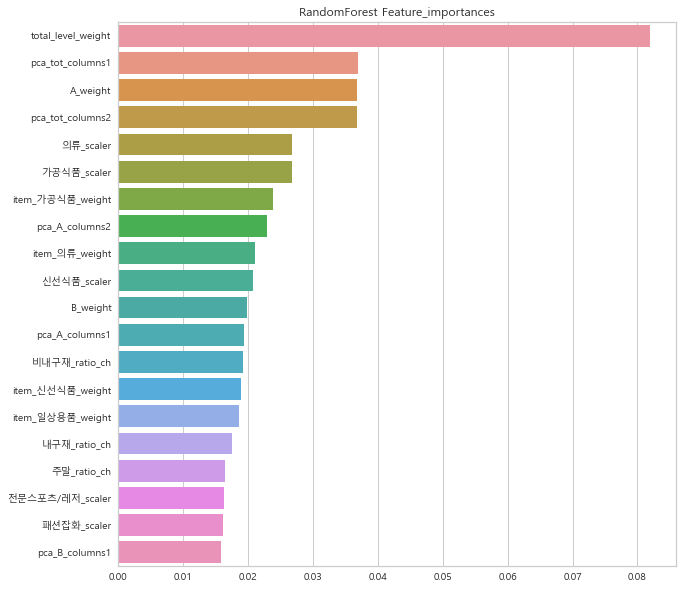

In [657]:
import seaborn as sns
import matplotlib.pyplot as plt

li1 = []
for i in zip(rf.feature_importances_, X_train1.columns):
    li1.append(i)
    
li1 = sorted(li1,reverse=True)

fi1 = [x[0] for x in li1]
na1 = [x[1] for x in li1]

plt.figure(figsize=(10,10))
plt.rc('font',family='Malgun Gothic')
plt.title('RandomForest Feature_importances')
sns.barplot(x=fi1[:20],y=na1[:20])

In [660]:
fi1[:5], na1[:5]

([0.08189911394765391,
  0.036913834319126426,
  0.03683989667712666,
  0.03676947240933052,
  0.026825156479514764],
 ['total_level_weight',
  'pca_tot_columns1',
  'A_weight',
  'pca_tot_columns2',
  '의류_scaler'])

<AxesSubplot:title={'center':'XGBboost Feature_importances'}>

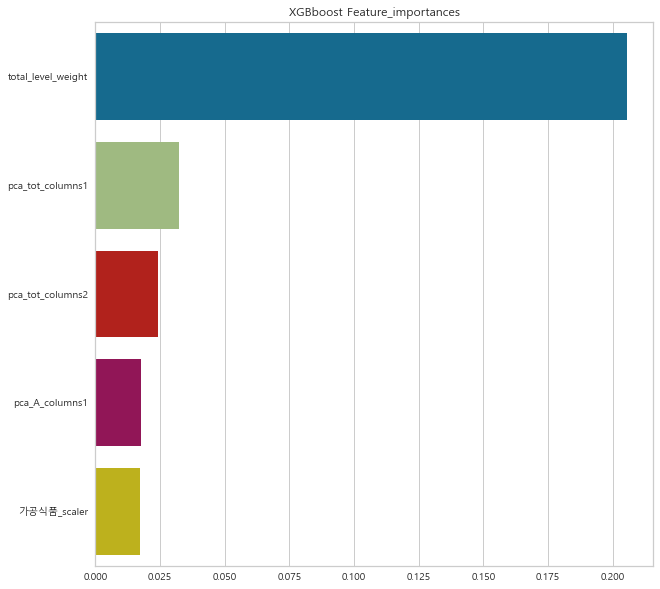

In [662]:
import seaborn as sns
import matplotlib.pyplot as plt

li1 = []
for i in zip(xg.feature_importances_, X_train1.columns):
    li1.append(i)
    
li1 = sorted(li1,reverse=True)

fi1 = [x[0] for x in li1]
na1 = [x[1] for x in li1]

plt.figure(figsize=(10,10))
plt.rc('font',family='Malgun Gothic')
plt.title('XGBboost Feature_importances')
sns.barplot(x=fi1[:5],y=na1[:5])

In [668]:
fi1[:5]
na[:5]


['pca_tot_columns1',
 '주말_ratio_ch',
 'pca_tot_columns2',
 '내구재_ratio_ch',
 'pca_A_columns1']

<AxesSubplot:title={'center':'LightGBM Feature_importances'}>

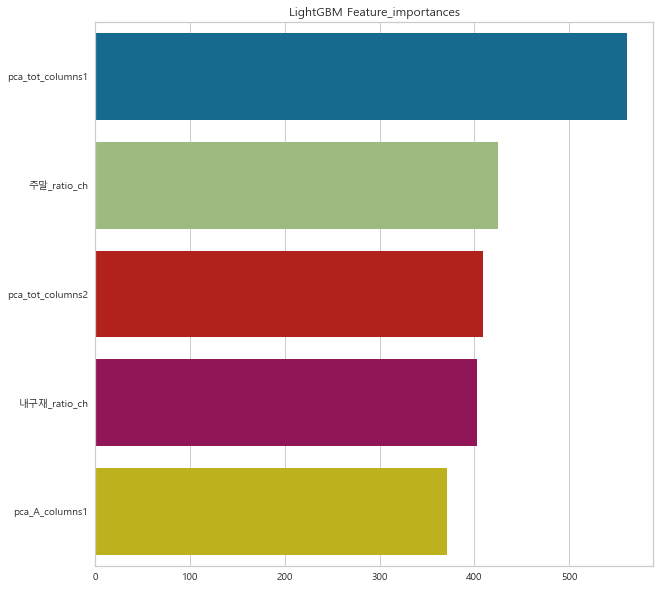

In [656]:
import seaborn as sns
import matplotlib.pyplot as plt

li = []
for i in zip(lg.feature_importances_, X_train1.columns):
    li.append(i)
    
li = sorted(li,reverse=True)

fi = [x[0] for x in li]
na = [x[1] for x in li]

plt.figure(figsize=(10,10))
plt.rc('font',family='Malgun Gothic')
plt.title('LightGBM Feature_importances')
sns.barplot(x=fi[:5],y=na[:5])

In [669]:
fi2[:5], na1[:5]

([0.0807346210082896,
  0.039189750038388815,
  0.03807105760863281,
  0.037168888195682016,
  0.03056219867816642],
 ['total_level_weight',
  'pca_tot_columns1',
  'pca_tot_columns2',
  'pca_A_columns1',
  '가공식품_scaler'])

In [672]:
lr.coef_

array([[-1.77517603e+00, -8.53036790e-01, -6.77426052e-02,
        -3.22801654e-03, -9.33604469e-02, -5.76579725e-02,
        -4.57399659e-02, -1.59829208e-02, -1.43144573e-02,
        -1.71943146e-02, -1.41820519e-03, -4.98915369e-03,
        -2.65213324e-02, -2.95891234e-02,  1.41467369e-02,
        -2.32585326e-02, -1.99771032e-03, -1.14606372e-02,
         5.51895225e-03, -1.35951218e-02, -3.31603289e-02,
         2.95042993e-01,  5.18745290e-01,  6.01550880e-02,
         1.09704220e-01,  8.04569145e-02, -1.81685119e-01,
         3.42397588e-02, -5.99342451e-02,  1.09357260e+00,
        -1.97113556e-01,  4.75743128e-02, -3.59521205e-01,
        -9.13694930e-01, -7.06595926e-02, -1.22171617e-01,
         8.73374849e-02,  4.76814277e-01,  5.00525321e-01,
         6.16008939e-02,  2.92588294e-01, -2.97560086e-01,
        -1.61784243e-02, -4.88502082e-03, -3.81794183e-02,
        -2.89023412e-02, -2.77818829e-02, -7.82766840e-01,
         1.18855924e-02, -9.26582244e-02, -1.30344478e-0

In [676]:
lr.coef_

array([[-1.77517603e+00, -8.53036790e-01, -6.77426052e-02,
        -3.22801654e-03, -9.33604469e-02, -5.76579725e-02,
        -4.57399659e-02, -1.59829208e-02, -1.43144573e-02,
        -1.71943146e-02, -1.41820519e-03, -4.98915369e-03,
        -2.65213324e-02, -2.95891234e-02,  1.41467369e-02,
        -2.32585326e-02, -1.99771032e-03, -1.14606372e-02,
         5.51895225e-03, -1.35951218e-02, -3.31603289e-02,
         2.95042993e-01,  5.18745290e-01,  6.01550880e-02,
         1.09704220e-01,  8.04569145e-02, -1.81685119e-01,
         3.42397588e-02, -5.99342451e-02,  1.09357260e+00,
        -1.97113556e-01,  4.75743128e-02, -3.59521205e-01,
        -9.13694930e-01, -7.06595926e-02, -1.22171617e-01,
         8.73374849e-02,  4.76814277e-01,  5.00525321e-01,
         6.16008939e-02,  2.92588294e-01, -2.97560086e-01,
        -1.61784243e-02, -4.88502082e-03, -3.81794183e-02,
        -2.89023412e-02, -2.77818829e-02, -7.82766840e-01,
         1.18855924e-02, -9.26582244e-02, -1.30344478e-0

<AxesSubplot:title={'center':'LightGBM Feature_importances'}>

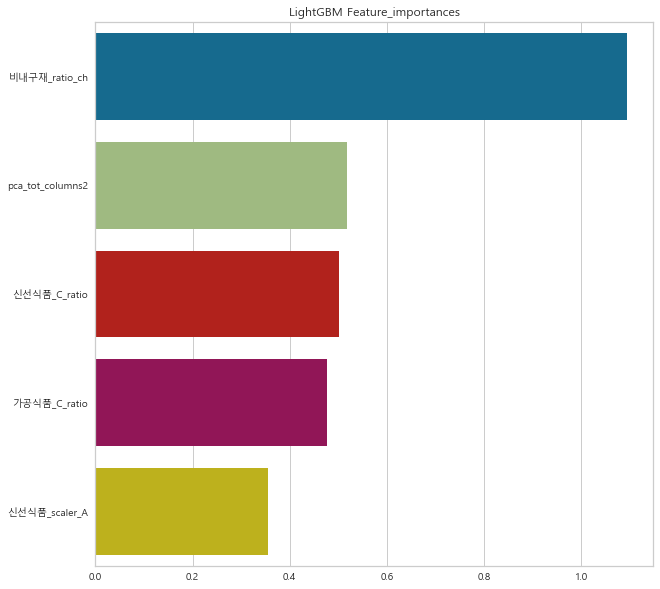

In [677]:
import seaborn as sns
import matplotlib.pyplot as plt

li = []
for i in zip(lr.coef_[0], X_train1.columns):
    li.append(i)
    
li = sorted(li,reverse=True)

fi = [x[0] for x in li]
na = [x[1] for x in li]

plt.figure(figsize=(10,10))
plt.rc('font',family='Malgun Gothic')
plt.title('LightGBM Feature_importances')
sns.barplot(x=fi[:5],y=na[:5])

In [678]:
fi[:5], na[:5]

([1.0935725981789843,
  0.5187452895699866,
  0.5005253207503175,
  0.47681427703791285,
  0.35477222354605],
 ['비내구재_ratio_ch',
  'pca_tot_columns2',
  '신선식품_C_ratio',
  '가공식품_C_ratio',
  '신선식품_scaler_A'])

In [640]:
X_train, X_test, y_train, y_test = train_test_split(train_d.drop(['label','cust_no'],axis=1), train_d['label'],
                                                   test_size= 0.2, random_state= 7)

In [ ]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train1,y_train1)
preds1=rf.predict(X_test1)
preds_prob1 = rf.predict_proba(X_test1)[:,1]


acc1 = accuracy_score(y_test1, preds1)
pre1 = precision_score(y_test1, preds1)
recall1 = recall_score(y_test1, preds1)
f11 = f1_score(y_test1, preds1)
auc1 = roc_auc_score(y_test1, preds_prob1)

print ('Accuracy Score :',acc1.round(2))
print ('Precision Score :',pre1.round(2))
print ('Recall Score : ',recall1.round(2))
print ('F1 Score :',f11.round(2))
print ('ROC AUC :',auc1.round(2))

In [ ]:
xg = XGBClassifier(n_estimators = 500, learning_rate=0.1, n_jobs=-1)
xg.fit(X_train1, y_train1)
preds2 = xg.predict(X_test1)
preds_prob2 = xg.predict_proba(X_test1)[:,1]


acc2 = accuracy_score(y_test1, preds2)
pre2 = precision_score(y_test1, preds2)
recall2 = recall_score(y_test1, preds2)
f12 = f1_score(y_test1, preds2)
auc2 = roc_auc_score(y_test1, preds_prob2)

print ('Accuracy Score :',acc2.round(2))
print ('Precision Score :',pre2.round(2))
print ('Recall Score : ',recall2.round(2))
print ('F1 Score :',f12.round(2))
print ('ROC AUC :',auc2.round(2))

In [ ]:

lg = LGBMClassifier(n_estimators = 500, learning_rate=0.1, n_jobs=-1)
lg.fit(X_train1, y_train1)
preds3= lg.predict(X_test1)
preds_prob3 = lg.predict_proba(X_test1)[:,1]

acc3 = accuracy_score(y_test1, preds3)
pre3 = precision_score(y_test1, preds3)
recall3 = recall_score(y_test1, preds3)
f13 = f1_score(y_test1, preds3)
auc3 = roc_auc_score(y_test1, preds_prob3)

print ('Accuracy Score :',acc3.round(2))
print ('Precision Score :',pre3.round(2))
print ('Recall Score : ',recall3.round(2))
print ('F1 Score :',f13.round(2))
print ('ROC AUC :',auc3.round(2))

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train1, y_train1)
preds4= lr.predict(X_test1)
preds_prob4 = lr.predict_proba(X_test1)[:,1]


acc4 = accuracy_score(y_test1, preds4)
pre4 = precision_score(y_test1, preds4)
recall4 = recall_score(y_test1, preds4)
f14 = f1_score(y_test1, preds4)
auc4 = roc_auc_score(y_test1, preds_prob4)

print ('Accuracy Score :',acc4.round(2))
print ('Precision Score :',pre4.round(2))
print ('Recall Score : ',recall4.round(2))
print ('F1 Score :',f14.round(2))
print ('ROC AUC :',auc4.round(2))

<AxesSubplot:>

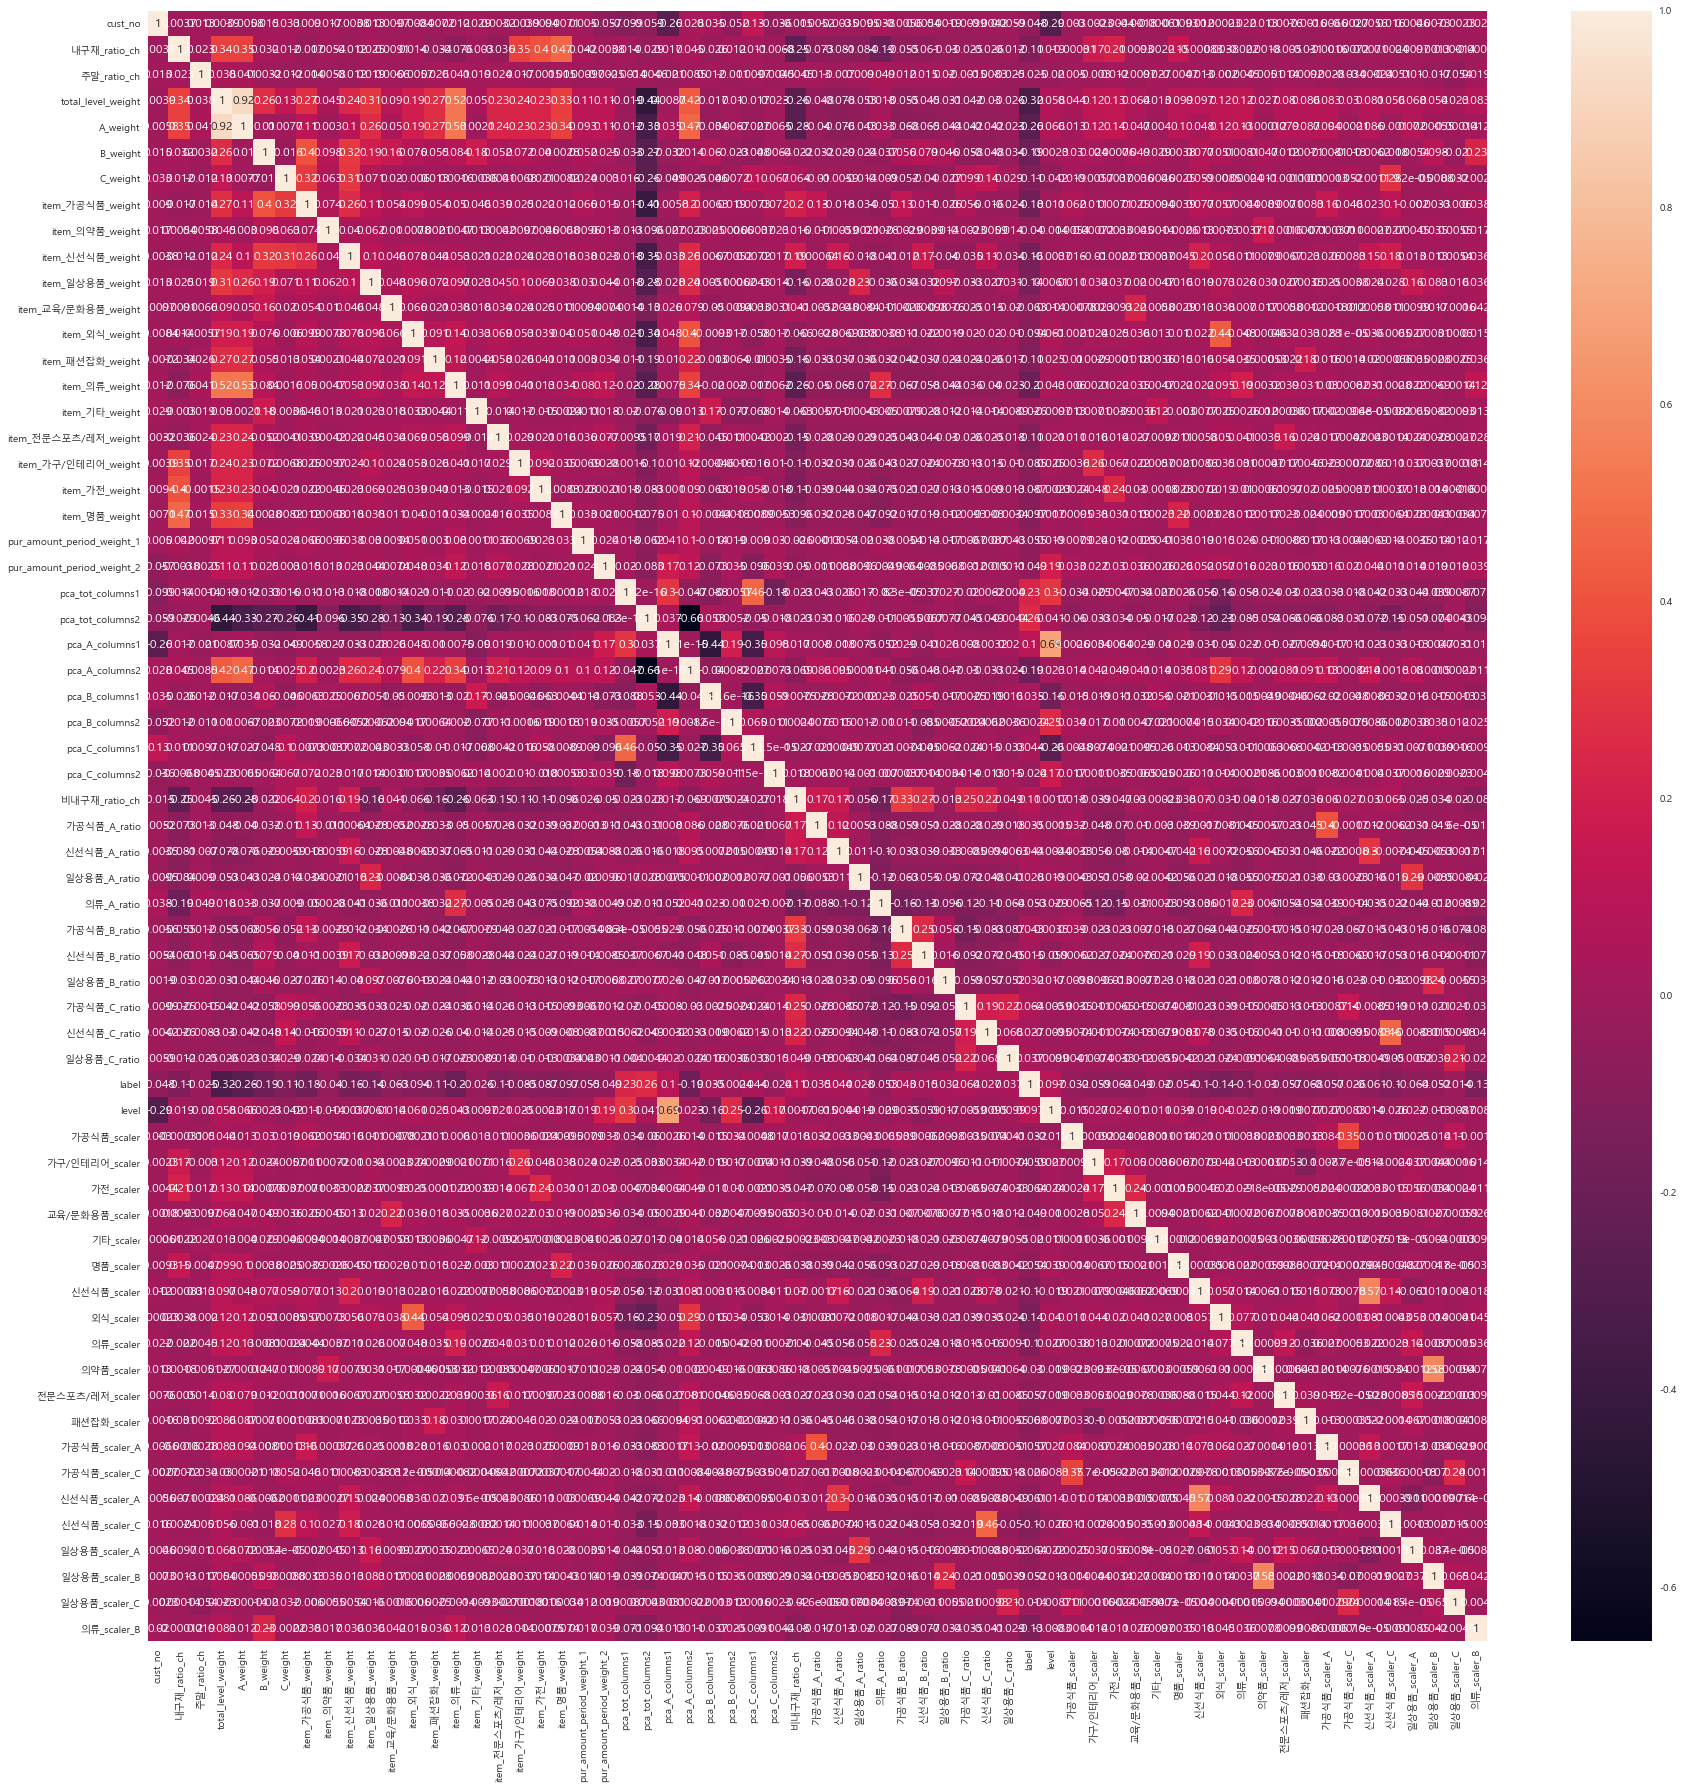

In [687]:
plt.figure(figsize=(30,30))
sns.heatmap(test_d.corr(),annot=True)